In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib, os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df)
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

ROC AUC PriA-SSB AS               ROC AUC PriA-SSB FP                 ROC AUC RMI-FANCM1             BEDROC AUC PriA-SSB AS            BEDROC AUC PriA-SSB FP              BEDROC AUC RMI-FANCM1       PR auc.integral PriA-SSB AS       PR auc.integral PriA-SSB FP        PR auc.integral RMI-FANCM1              NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP              NEF_0.1 % RMI-FANCM1             NEF_0.15 % PriA-SSB AS            NEF_0.15 % PriA-SSB FP              NEF_0.15 % RMI-FANCM1              NEF_0.5 % PriA-SSB AS             NEF_0.5 % PriA-SSB FP               NEF_0.5 % RMI-FANCM1                NEF_1 % PriA-SSB AS               NEF_1 % PriA-SSB FP                 NEF_1 % RMI-FANCM1                NEF_2 % PriA-SSB AS               NEF_2 % PriA-SSB FP                 NEF_2 % RMI-FANCM1                NEF_5 % PriA-SSB AS               NEF_5 % PriA-SSB FP                 NEF_5 % RMI-FANCM1               NEF_10 % PriA-SSB AS  \
0                 RandomForest_d, 1.0           SingleRegression_a, 1.0                RandomForest_a, 1.0            SingleRegression_b, 1.0           SingleRegression_b, 1.0                         IRV_d, 1.0       SingleClassification_b, 1.0           SingleRegression_b, 1.0       SingleClassification_b, 1.0        SingleClassification_b, 1.0           SingleRegression_b, 1.0                        IRV_a, 1.0                         IRV_e, 1.0           SingleRegression_b, 1.0                         IRV_a, 1.0        SingleClassification_a, 1.0           SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_h, 1.0           SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0           SingleRegression_a, 1.0        SingleClassification_a, 1.0            SingleRegression_b, 1.0           SingleRegression_a, 1.0                RandomForest_c, 1.0            SingleRegression_b, 1.0   
1                 RandomForest_h, 2.0           SingleRegression_b, 2.0                RandomForest_h, 1.0                RandomForest_c, 1.0           SingleRegression_a, 2.0                RandomForest_e, 1.0       SingleClassification_a, 1.0               Docking_hybrid, 2.0       SingleClassification_a, 1.0        SingleClassification_a, 2.0               Docking_hybrid, 1.0           SingleRegression_b, 2.0        SingleClassification_b, 1.0               Docking_hybrid, 1.0            SingleRegression_b, 2.0                RandomForest_h, 2.0               Docking_hybrid, 2.0        SingleClassification_a, 1.0        SingleClassification_a, 2.0           SingleRegression_a, 1.0                RandomForest_f, 1.0        SingleClassification_a, 2.0                        IRV_e, 2.0                         IRV_d, 2.0                RandomForest_b, 1.0           SingleRegression_b, 2.0                RandomForest_b, 1.0                RandomForest_c, 1.0   
2                 RandomForest_e, 2.0                        IRV_e, 3.0                RandomForest_g, 1.0                         IRV_b, 1.0                        IRV_e, 3.0         MultiClassification_b, 1.0        MultiClassification_a, 1.0                        IRV_a, 2.0        MultiClassification_b, 3.0         MultiClassification_b, 3.0                        IRV_a, 1.0       SingleClassification_b, 3.0        SingleClassification_a, 1.0                        IRV_a, 1.0        SingleClassification_b, 2.0            SingleRegression_b, 3.0                        IRV_a, 2.0                         IRV_a, 1.0            SingleRegression_b, 3.0         ConsensusDocking_max, 3.0                RandomForest_e, 1.0            SingleRegression_b, 3.0           SingleRegression_b, 3.0        SingleClassification_b, 2.0                         IRV_b, 1.0         ConsensusDocking_max, 3.0                RandomForest_h, 1.0            SingleRegression_a, 1.0   
3             SingleRegression_b, 4.0               RandomForest_h, 3.0                RandomForest_e, 1.0            Sing

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

n_hits_100 PriA-SSB AS                             n_hits_100 PriA-SSB FP   n_hits_100 RMI-FANCM1                             n_hits_250 PriA-SSB AS                             n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM1                            n_hits_500 PriA-SSB AS                             n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM1                            n_hits_1000 PriA-SSB AS                            n_hits_1000 PriA-SSB FP      n_hits_1000 RMI-FANCM1                 n_hits_2500 PriA-SSB AS                            n_hits_2500 PriA-SSB FP n_hits_2500 RMI-FANCM1                 n_hits_5000 PriA-SSB AS                            n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM1 n_hits_10000 PriA-SSB AS                           n_hits_10000 PriA-SSB FP                            n_hits_10000 RMI-FANCM1
0                                  NEF_0.5 %, NEF_1 %  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....         PR auc.integral  BEDROC AUC, NEF_0.15 %, NEF_1 %, NEF_2 %, NEF_...  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...       PR auc.integral                                           NEF_1 %  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...       PR auc.integral  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....  NEF_5 %, NEF_10 %, NEF AUC  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_5...               NEF_20 %  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....               NEF_20 %                  NEF_5 %  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...
1   BEDROC AUC, NEF_0.15 %, NEF_2 %, NEF_5 %, NEF AUC                                   ROC AUC, NEF_5 %               NEF_0.1 %                                          NEF_0.5 %  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10...   BEDROC AUC, NEF_2 %  BEDROC AUC, NEF_0.5 %, NEF_2 %, NEF_5 %, NEF AUC                                            NEF_2 %   BEDROC AUC, NEF_5 %                              NEF_0.15 %, NEF_0.5 %                                   ROC AUC, NEF_5 %                  BEDROC AUC                                NEF_20 %  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_2 ...                NEF AUC                                NEF_20 %                      BEDROC AUC, NEF_5 %, NEF_20 %                NEF AUC      BEDROC AUC, NEF AUC   BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10 %                                                   
2                                            NEF_10 %                                            NEF_2 %                 NEF_1 %                                    PR auc.integral                                                                  NEF_1 %                                          NEF_10 %                                                                  NEF_2 %                                                                                               NEF_2 %                     ROC AUC                        NEF_1 %, NEF_2 %                                                         ROC AUC, NEF_10 %                        NEF_1 %, NEF_2 %                                   ROC AUC, NEF_2 %               NEF_10 %       NEF_0.5 %, NEF_1 %                                                                                                      
3                                     PR auc.integral                                                                  NEF_0.5 %                                           NEF_20 %                                                                NEF_0.1 %                                   PR auc.integral                                                                NEF_0.1 %                                                                                                                           NEF_1 %              PR auc.integral, NEF_0.5 %                                          

---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

overlap_perc
RandomForest_h                     0.5326
SingleClassification_a             0.2717
SingleRegression_b                 0.2609
RandomForest_e                     0.2609
SingleClassification_b             0.2283
RandomForest_d                     0.2283
IRV_e                              0.2065
RandomForest_g                     0.2065
SingleRegression_a                 0.2065
MultiClassification_b              0.1739
RandomForest_a                     0.1739
RandomForest_c                     0.1630
RandomForest_b                     0.1630
RandomForest_f                     0.1522
MultiClassification_a              0.1087
IRV_d                              0.1087
IRV_b                              0.0870
IRV_a                              0.0761
IRV_c                              0.0761
Docking_rdockint                   0.0326
Docking_surflex                    0.0326
Docking_dock6                      0.0326
Docking_fred                       0.0326
ConsensusDocking_efr1_opt          0.0326
ConsensusDocking_mean              0.0326
ConsensusDocking_max               0.0326
Docking_ad4                        0.0326
Docking_smina                      0.0326
ConsensusDocking_median            0.0326
LSTM_b                             0.0326
Docking_hybrid                     0.0326
LSTM_a                             0.0326
Docking_plants                     0.0326
Docking_rdocktot                   0.0326
ConsensusDocking_rocauc_opt        0.0326

In [6]:
get_overlap(agg_comp_dict, N=5)

overlap_perc
RandomForest_h                     0.8478
RandomForest_d                     0.8261
RandomForest_e                     0.8043
RandomForest_g                     0.7826
RandomForest_a                     0.7500
RandomForest_b                     0.7283
RandomForest_c                     0.7283
SingleClassification_a             0.6304
MultiClassification_b              0.6304
IRV_e                              0.6196
SingleClassification_b             0.5652
SingleRegression_b                 0.5217
RandomForest_f                     0.5217
IRV_d                              0.4783
MultiClassification_a              0.4348
SingleRegression_a                 0.4239
IRV_b                              0.4022
IRV_c                              0.3913
IRV_a                              0.3696
Docking_fred                       0.2391
Docking_ad4                        0.2391
ConsensusDocking_rocauc_opt        0.2391
LSTM_b                             0.2391
Docking_rdocktot                   0.2391
ConsensusDocking_max               0.2391
ConsensusDocking_mean              0.2391
Docking_plants                     0.2391
LSTM_a                             0.2391
Docking_hybrid                     0.2391
ConsensusDocking_median            0.2391
Docking_smina                      0.2391
ConsensusDocking_efr1_opt          0.2391
Docking_dock6                      0.2391
Docking_surflex                    0.2391
Docking_rdockint                   0.2391

## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

In [8]:
ordered_spearman_df

n_hits_100 PriA-SSB AS n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM1 n_hits_250 PriA-SSB AS n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM1 n_hits_500 PriA-SSB AS n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM1 n_hits_1000 PriA-SSB AS n_hits_1000 PriA-SSB FP n_hits_1000 RMI-FANCM1 n_hits_2500 PriA-SSB AS n_hits_2500 PriA-SSB FP n_hits_2500 RMI-FANCM1 n_hits_5000 PriA-SSB AS n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM1 n_hits_10000 PriA-SSB AS n_hits_10000 PriA-SSB FP n_hits_10000 RMI-FANCM1
0               NEF_0.5 %              NEF_0.5 %             NEF_0.5 %                NEF_1 %                NEF_2 %               NEF_2 %              NEF_0.5 %                NEF AUC               NEF_2 %                 NEF_5 %                NEF_10 %                NEF AUC                NEF_20 %                 NEF_5 %               NEF_10 %                NEF_20 %                NEF_10 %               NEF_20 %                NEF_0.5 %                  NEF_5 %                 ROC AUC
1                 NEF_1 %        PR auc.integral               NEF_1 %                NEF_2 %             BEDROC AUC               NEF_1 %                NEF_2 %                NEF_1 %               NEF_5 %                 NEF_2 %                 NEF AUC                NEF_5 %                NEF_10 %                 NEF AUC               NEF_20 %                 ROC AUC                 NEF AUC               NEF_10 %                  NEF_5 %                  NEF AUC              BEDROC AUC
2                 NEF_2 %               NEF_10 %               NEF_2 %              NEF_0.5 %                ROC AUC            BEDROC AUC                NEF AUC               NEF_10 %            BEDROC AUC                 NEF AUC                 NEF_1 %             BEDROC AUC                 NEF AUC                 NEF_1 %                NEF AUC                NEF_10 %                 NEF_1 %                NEF AUC                  NEF AUC                  NEF_1 %         PR auc.integral
3                 NEF_5 %                NEF AUC            BEDROC AUC                NEF_5 %                NEF_5 %               NEF_5 %             BEDROC AUC                NEF_5 %               NEF_1 %              BEDROC AUC                 NEF_5 %               NEF_10 %              BEDROC AUC                NEF_10 %             BEDROC AUC                 NEF AUC                 NEF_5 %                ROC AUC               BEDROC AUC                 NEF_10 %               NEF_0.1 %
4              NEF_0.15 %                NEF_1 %               NEF_5 %                NEF AUC                NEF AUC               NEF AUC                NEF_5 %               NEF_20 %              NEF_10 %                NEF_10 %              BEDROC AUC                ROC AUC                 ROC AUC                NEF_20 %                ROC AUC              BEDROC AUC              BEDROC AUC                NEF_1 %               NEF_0.15 %                  NEF_2 %              NEF_0.15 %
5                 NEF AUC                NEF_5 %               NEF AUC             BEDROC AUC                NEF_1 %             NEF_0.5 %                NEF_1 %             BEDROC AUC               NEF AUC                 NEF_1 %                NEF_20 %                NEF_2 %                 NEF_5 %              BEDROC AUC                NEF_5 %                 NEF_5 %                NEF_20 %             BEDROC AUC                  NEF_1 %                 NEF_20 %               NEF_0.5 %
6              BEDROC AUC             BEDROC AUC              NEF_10 %             NEF_0.15 %               NEF_10 %              NEF_10 %               NEF_10 %                NEF_2 %               ROC AUC               NEF_0.5 %                 NEF_2 %                NEF_1 %                 NEF_2 %                 NEF_2 %                NEF_1 %                 NEF_2 %                 NEF_2 %                NEF_5 %                  ROC AUC               BEDROC AUC                 NEF_1 %
7                NEF_10 %               NEF_20 %   

In [9]:
spearman_df

n_hits_100 PriA-SSB AS  n_hits_100 PriA-SSB FP  n_hits_100 RMI-FANCM1  n_hits_250 PriA-SSB AS  n_hits_250 PriA-SSB FP  n_hits_250 RMI-FANCM1  n_hits_500 PriA-SSB AS  n_hits_500 PriA-SSB FP  n_hits_500 RMI-FANCM1  n_hits_1000 PriA-SSB AS  n_hits_1000 PriA-SSB FP  n_hits_1000 RMI-FANCM1  n_hits_2500 PriA-SSB AS  n_hits_2500 PriA-SSB FP  n_hits_2500 RMI-FANCM1  n_hits_5000 PriA-SSB AS  n_hits_5000 PriA-SSB FP  n_hits_5000 RMI-FANCM1  n_hits_10000 PriA-SSB AS  n_hits_10000 PriA-SSB FP  n_hits_10000 RMI-FANCM1
ROC AUC                          0.8809                  0.4918                 0.7391                  0.8827                  0.8700                 0.8150                  0.9340                  0.7281                 0.8313                   0.9164                   0.7271                  0.9208                   0.9288                   0.7284                  0.8917                   0.9150                   0.4993                  0.7973                    0.7885                    0.5226                      NaN
BEDROC AUC                       0.9251                  0.5944                 0.8275                  0.9395                  0.9979                 0.9036                  0.9613                  0.8282                 0.9011                   0.9744                   0.8285                  0.9672                   0.9414                   0.8271                  0.8966                   0.8584                   0.5862                  0.7632                    0.8116                    0.5594                      NaN
PR auc.integral                  0.4550                  1.0000                 0.4326                  0.4352                  0.5421                 0.4359                  0.4440                  0.6966                 0.4302                   0.4346                   0.7174                  0.2172                   0.4363                   0.6752                  0.2204                   0.4570                   0.5226                  0.1487                    0.3013                   -0.0294                      NaN
NEF_0.1 %                        0.7636                     NaN                 0.4394                  0.7750                     NaN                 0.3307                  0.7446                     NaN                 0.2823                   0.7991                      NaN                  0.1149                   0.6759                      NaN                  0.0003                   0.5680                      NaN                 -0.0401                    0.6037                       NaN                      NaN
NEF_0.15 %                       0.9323                     NaN                 0.7028                  0.9346                     NaN                 0.6509                  0.9058                     NaN                 0.6538                   0.9122                      NaN                  0.4840                   0.7454                      NaN                  0.4046                   0.6441                      NaN                  0.2853                    0.8062                       NaN                      NaN
NEF_0.5 %                        0.9999                  1.0000                 0.9489                  0.9878                  0.5421                 0.8657                  0.9667                  0.6966                 0.8297                   0.9460                   0.7174                  0.7407                   0.8480                   0.6752                  0.6576                   0.7720                   0.5226                  0.6404                    0.8343                   -0.0294                      NaN
NEF_1 %                          0.9881                  0.6966                 0.9373                  1.0000                  0.8159                 0.9415                  0.9563                  1.0000                 0.9005                   0.9590                   0.9996                  0.8796                   

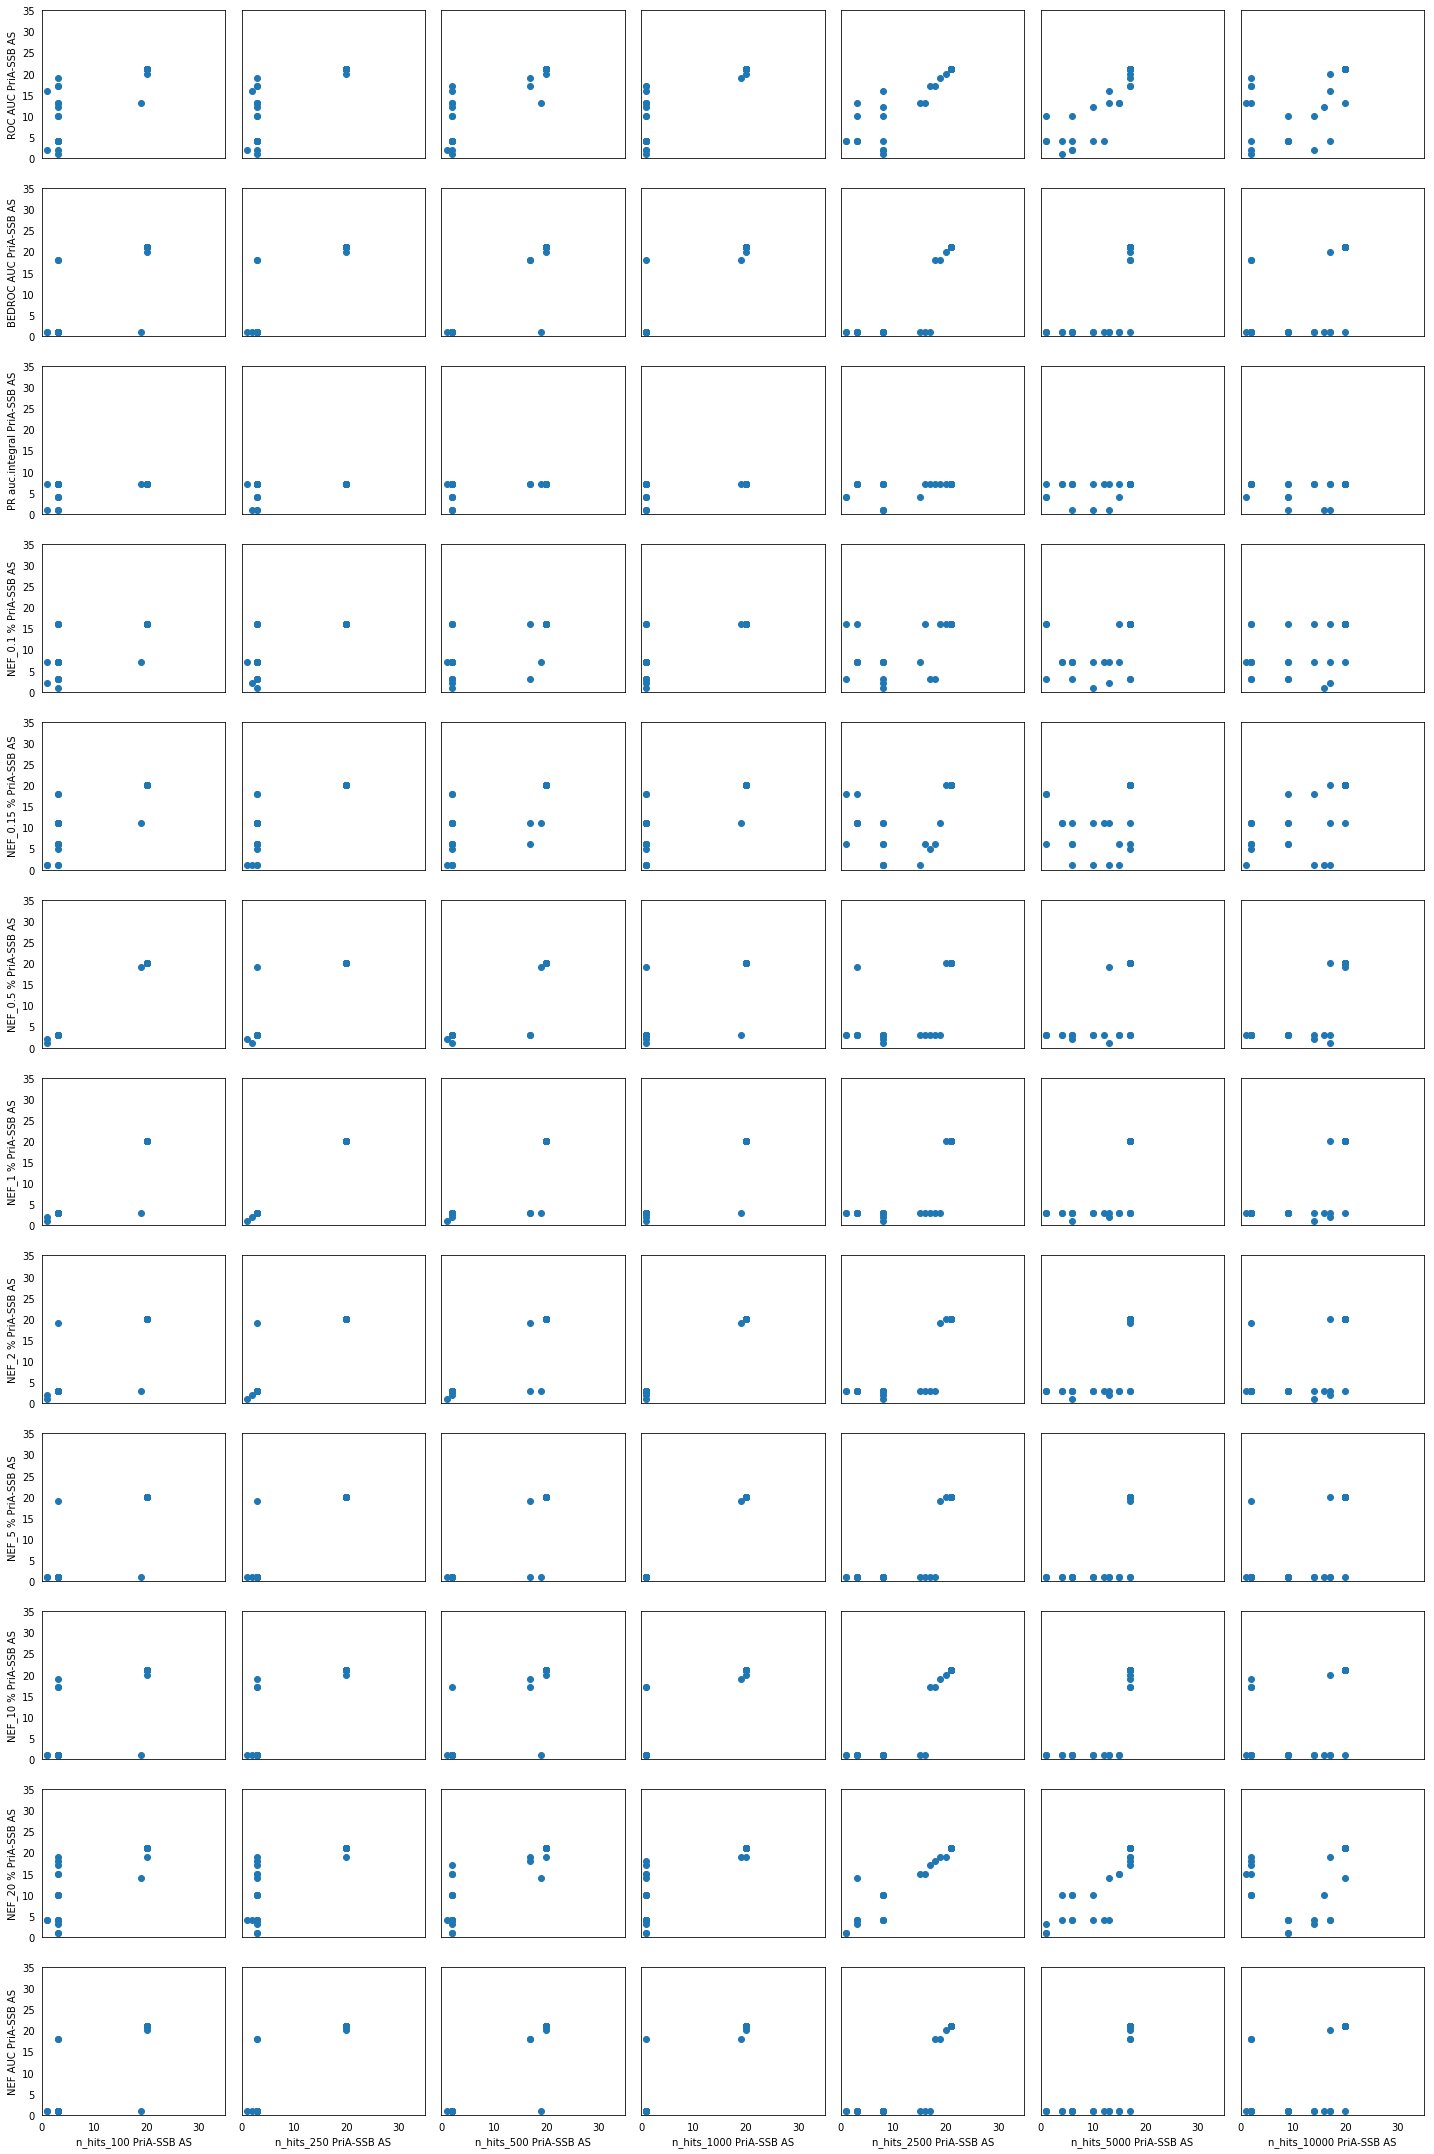

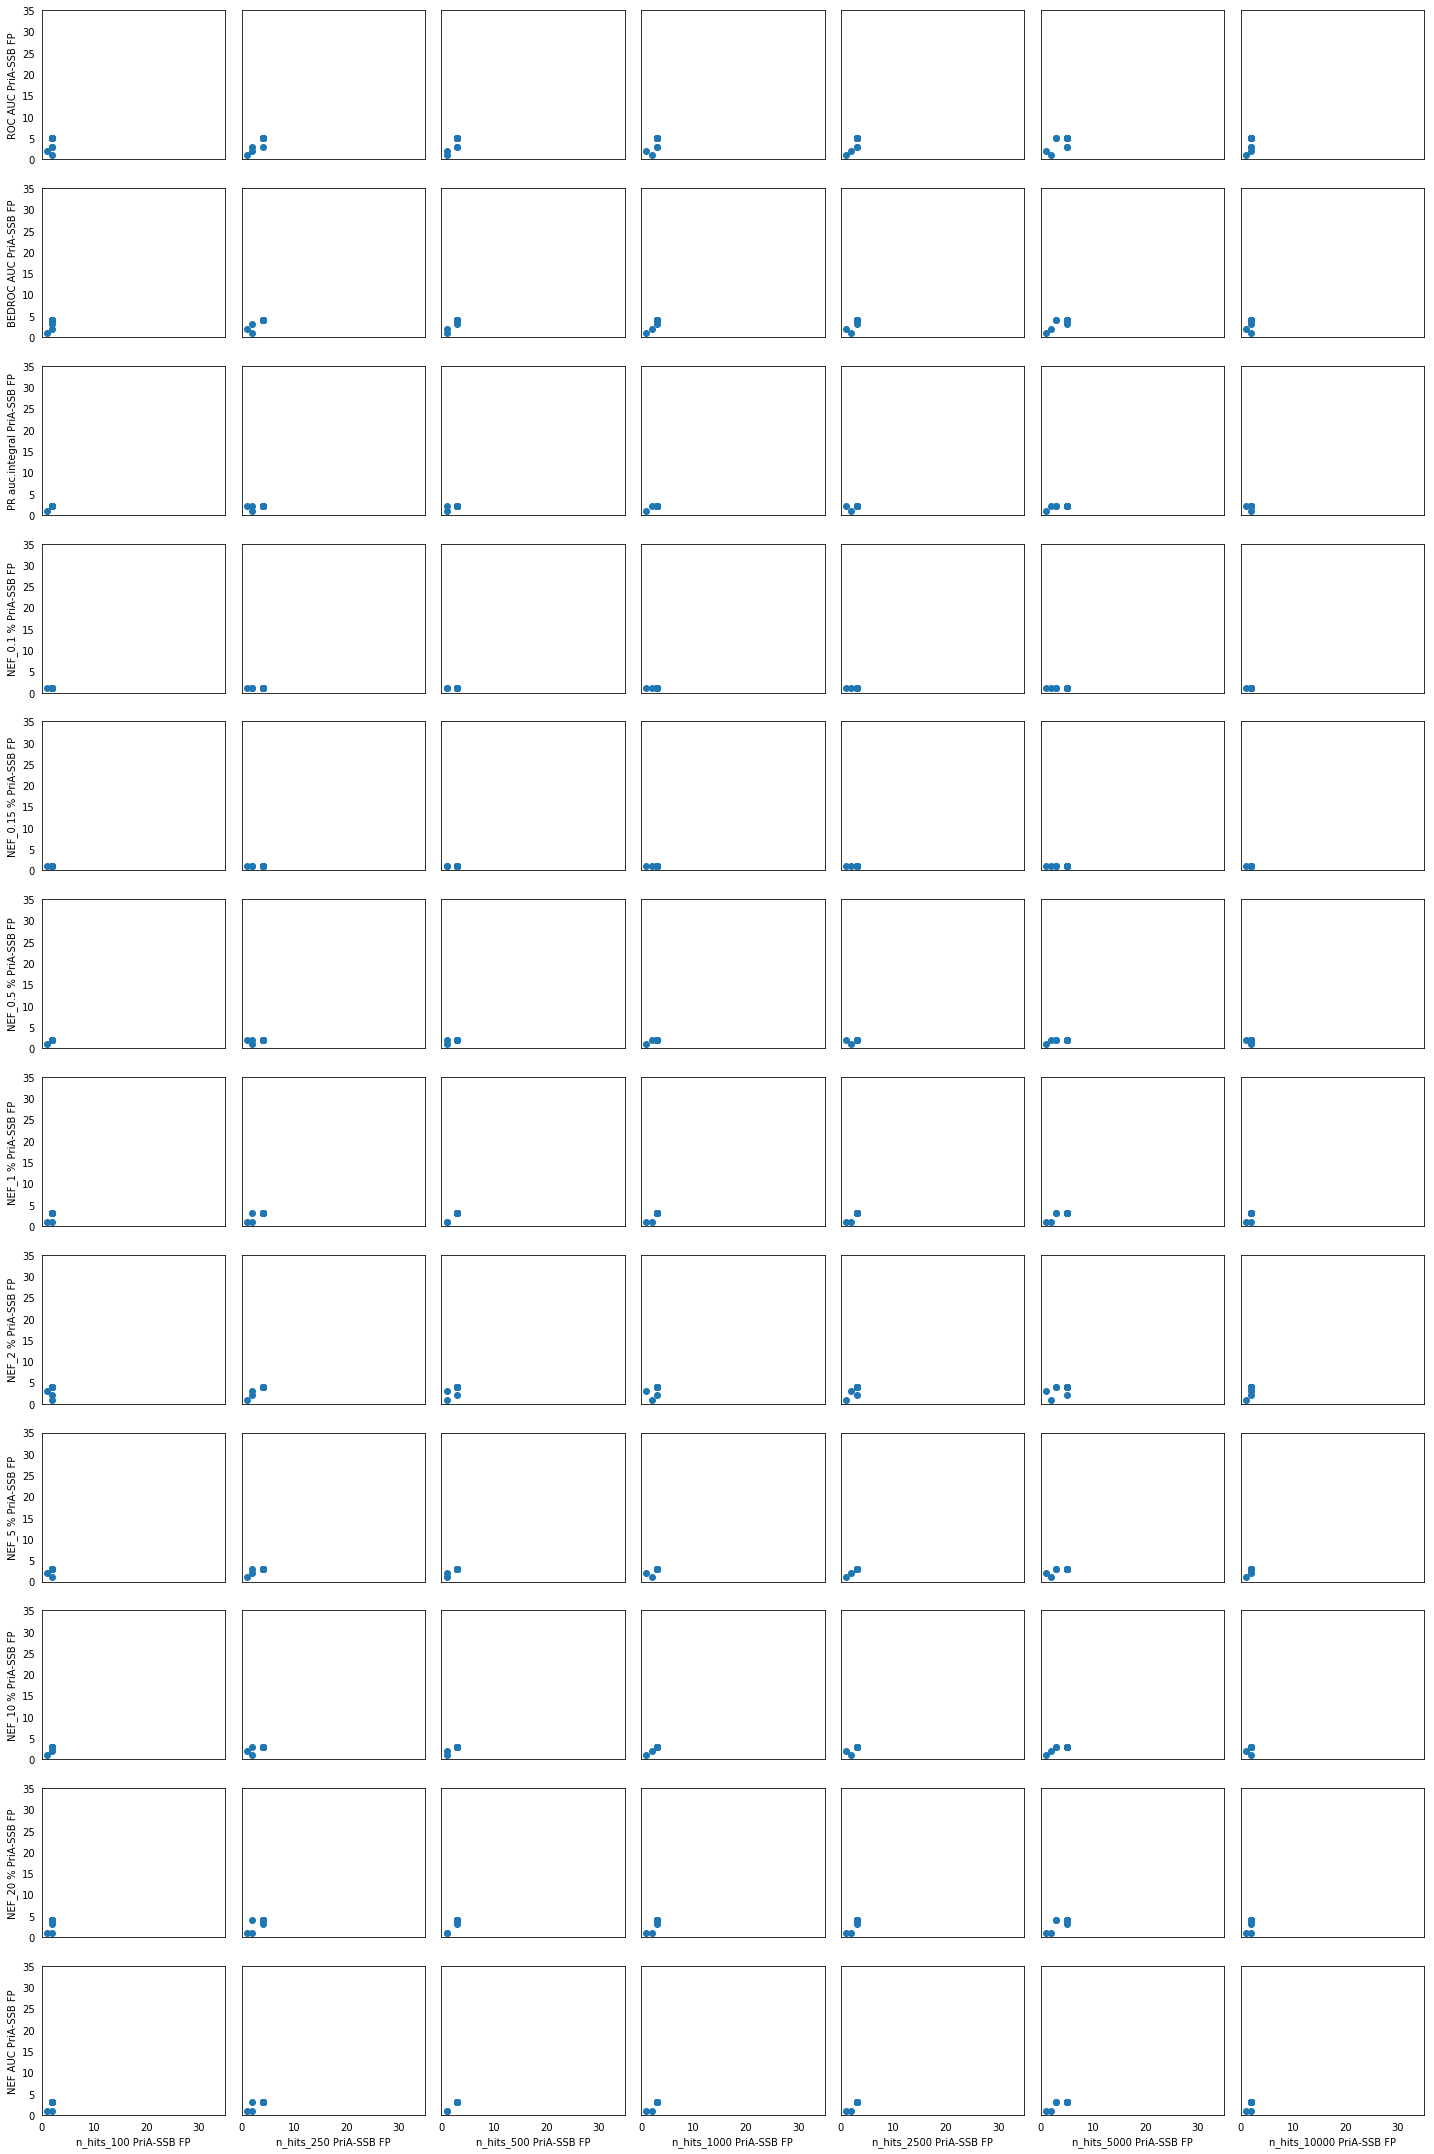

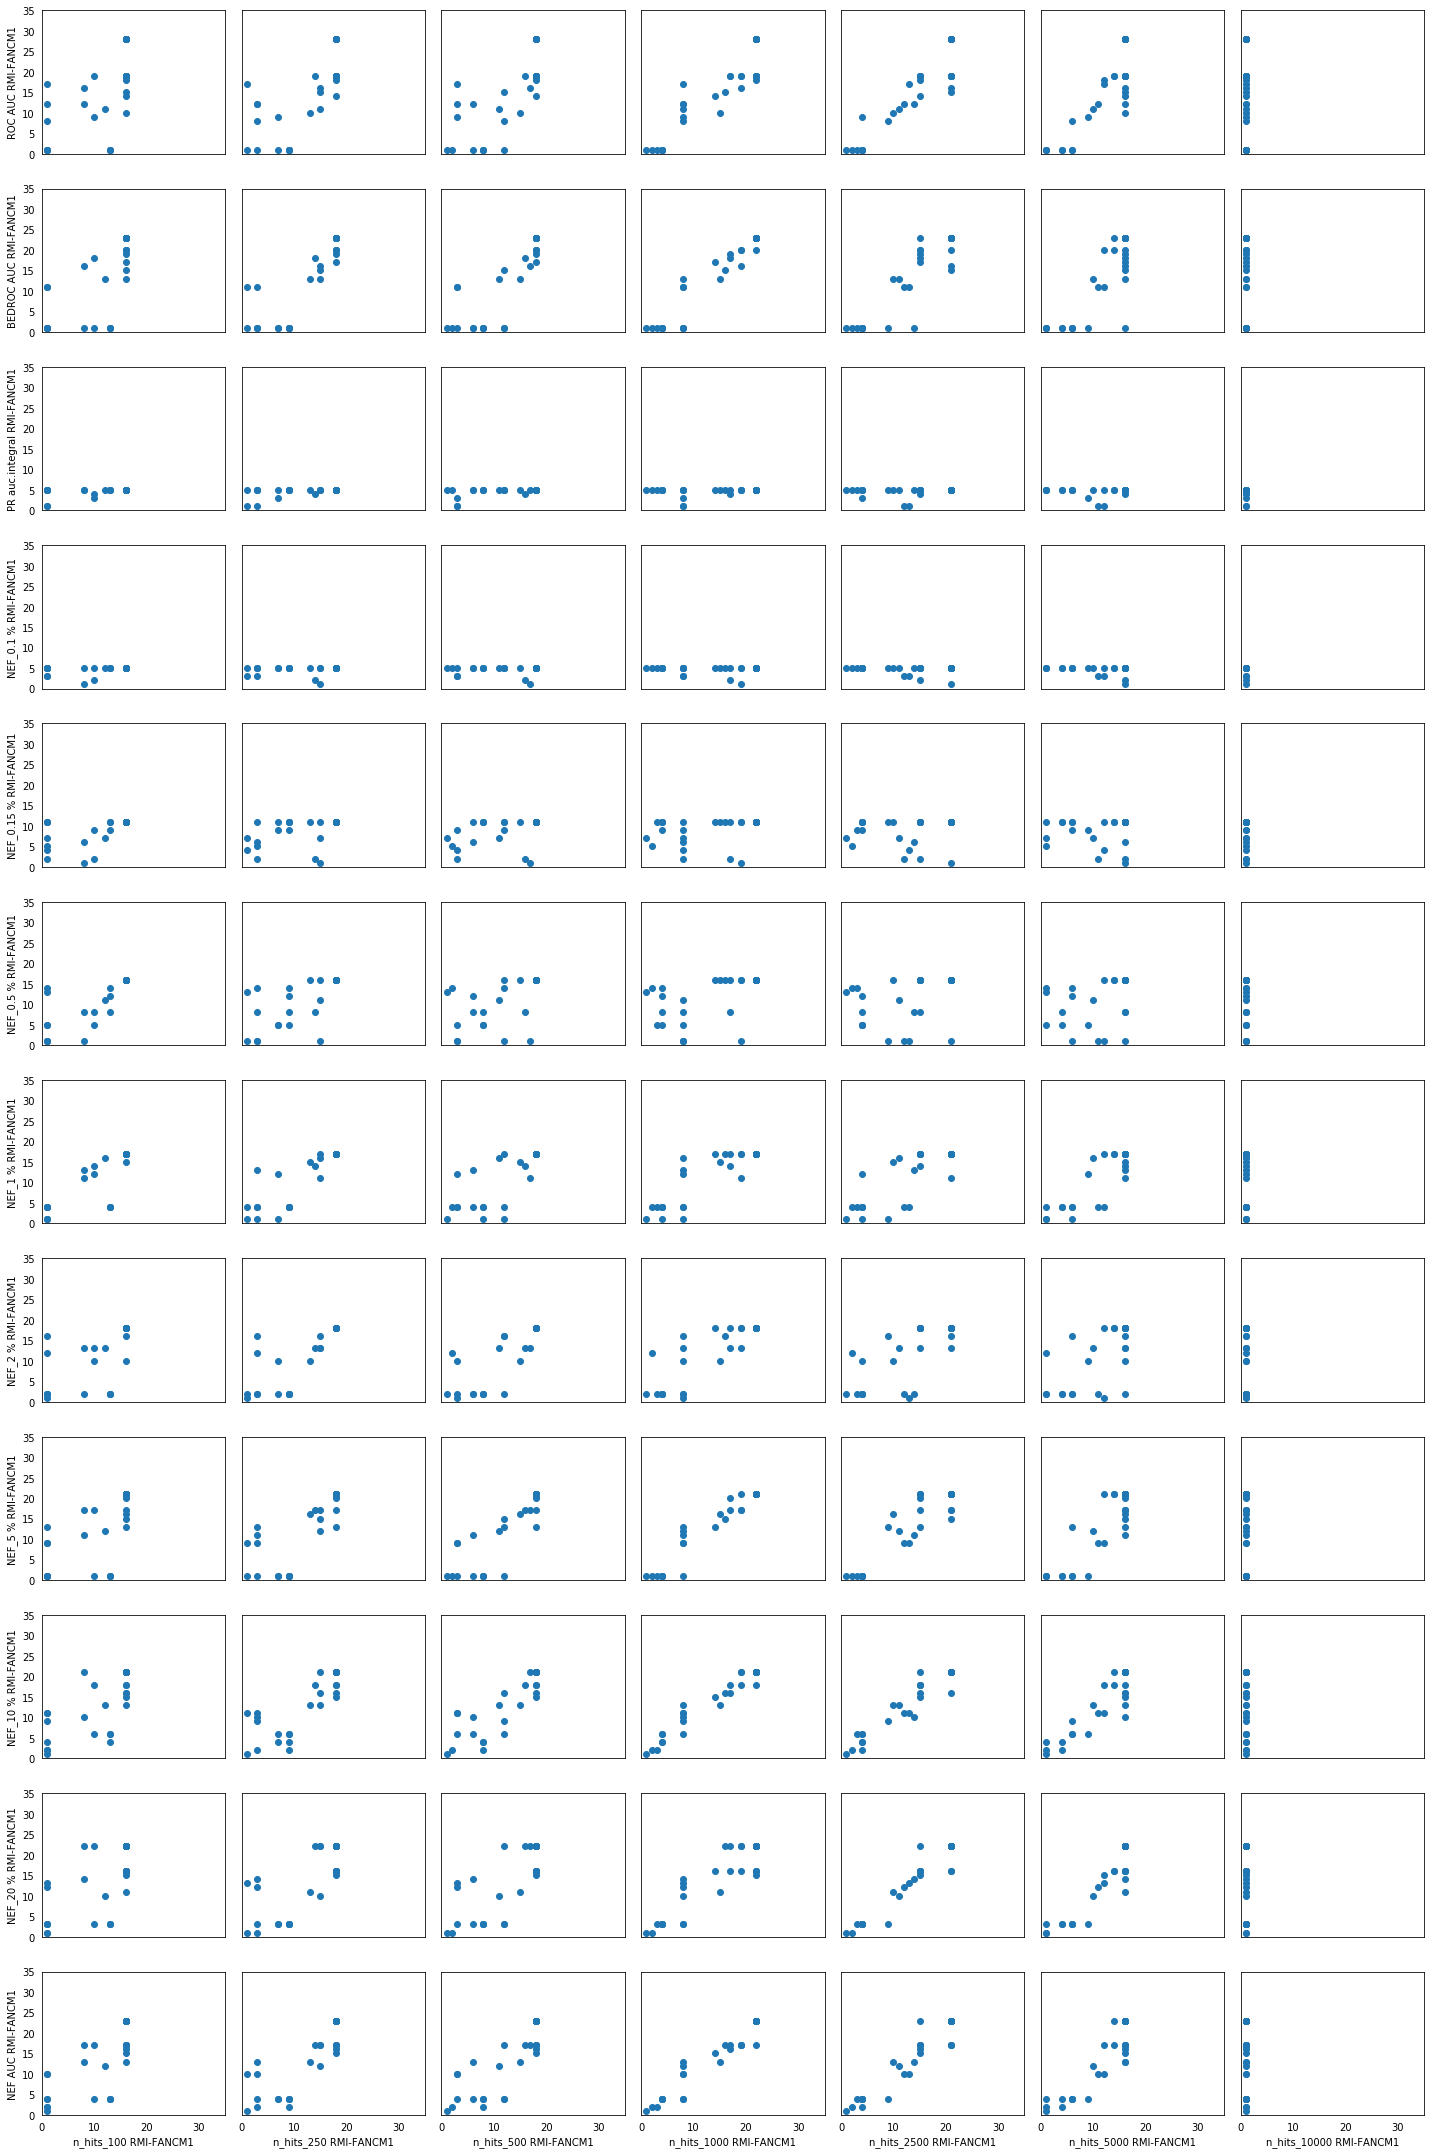

In [10]:
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
matplotlib.rcParams.update({'font.size': 10})
for l in labels:
    curr_metrics = [m for m in metric_names[:-21] if l in m]
    curr_hits = [m for m in metric_names[-21:] if l in m]
    file_name = './cv_ps_figures/cv_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Box Plots for all Models

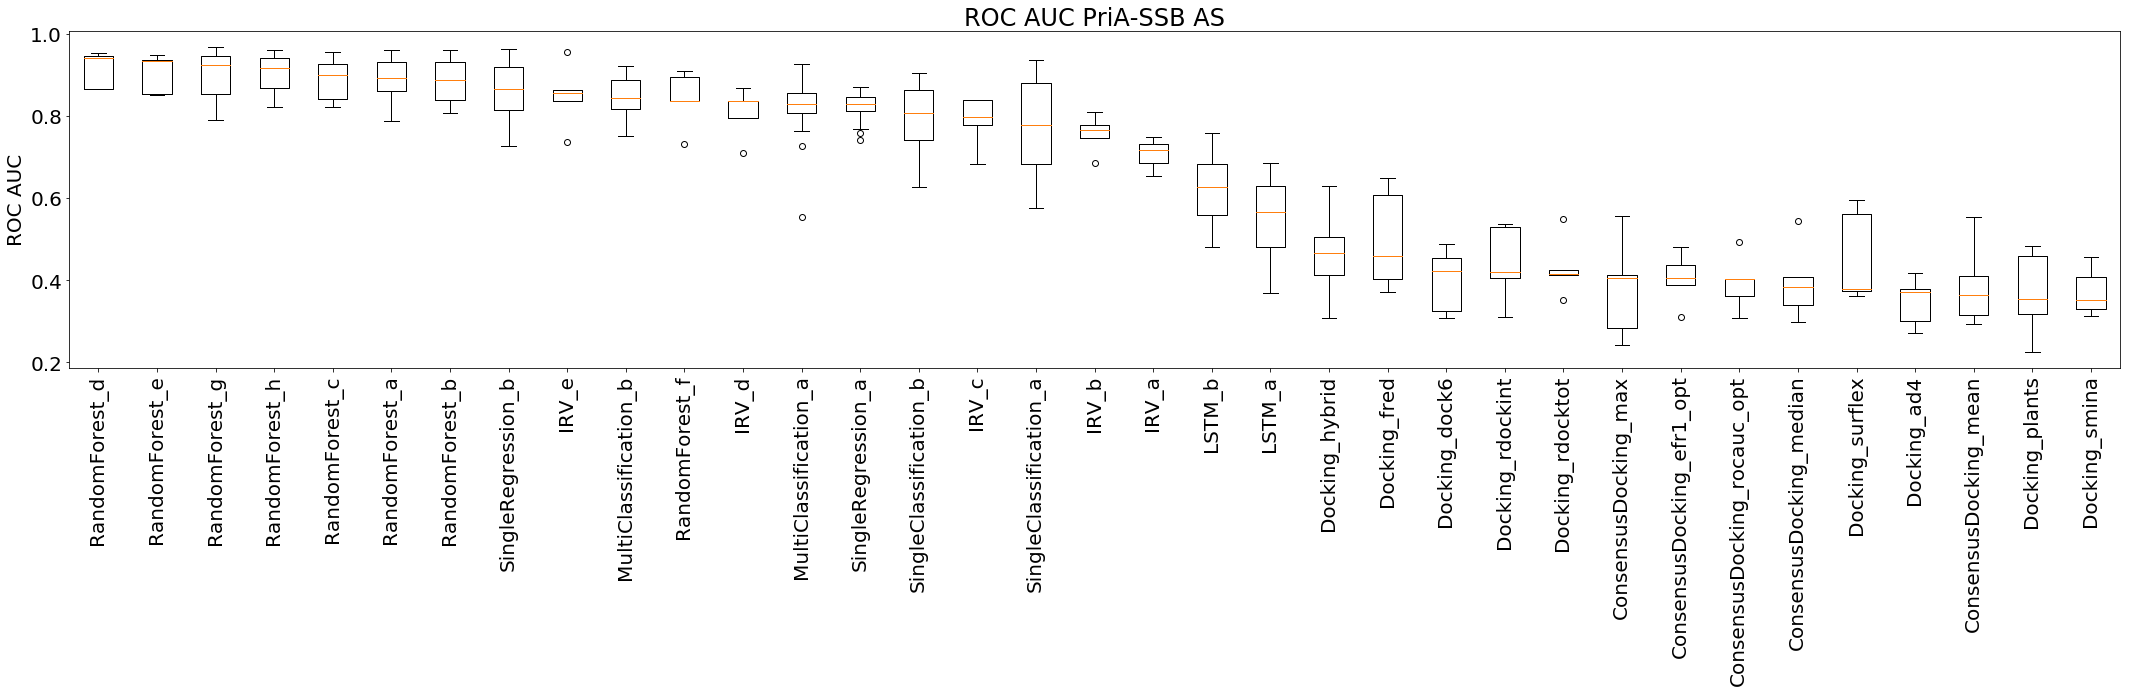

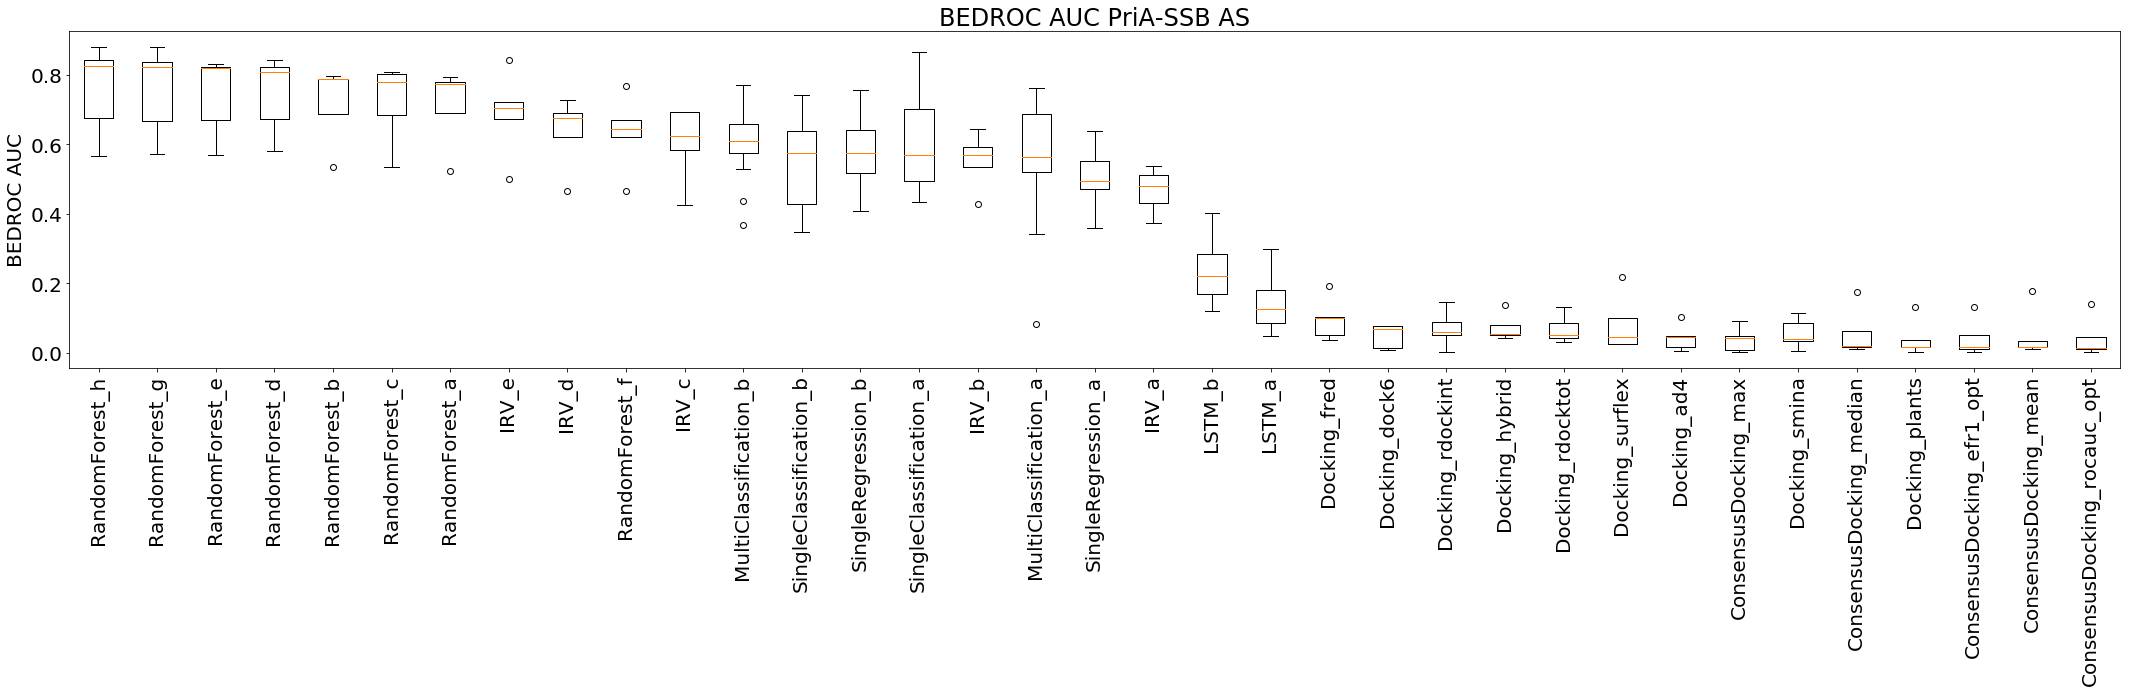

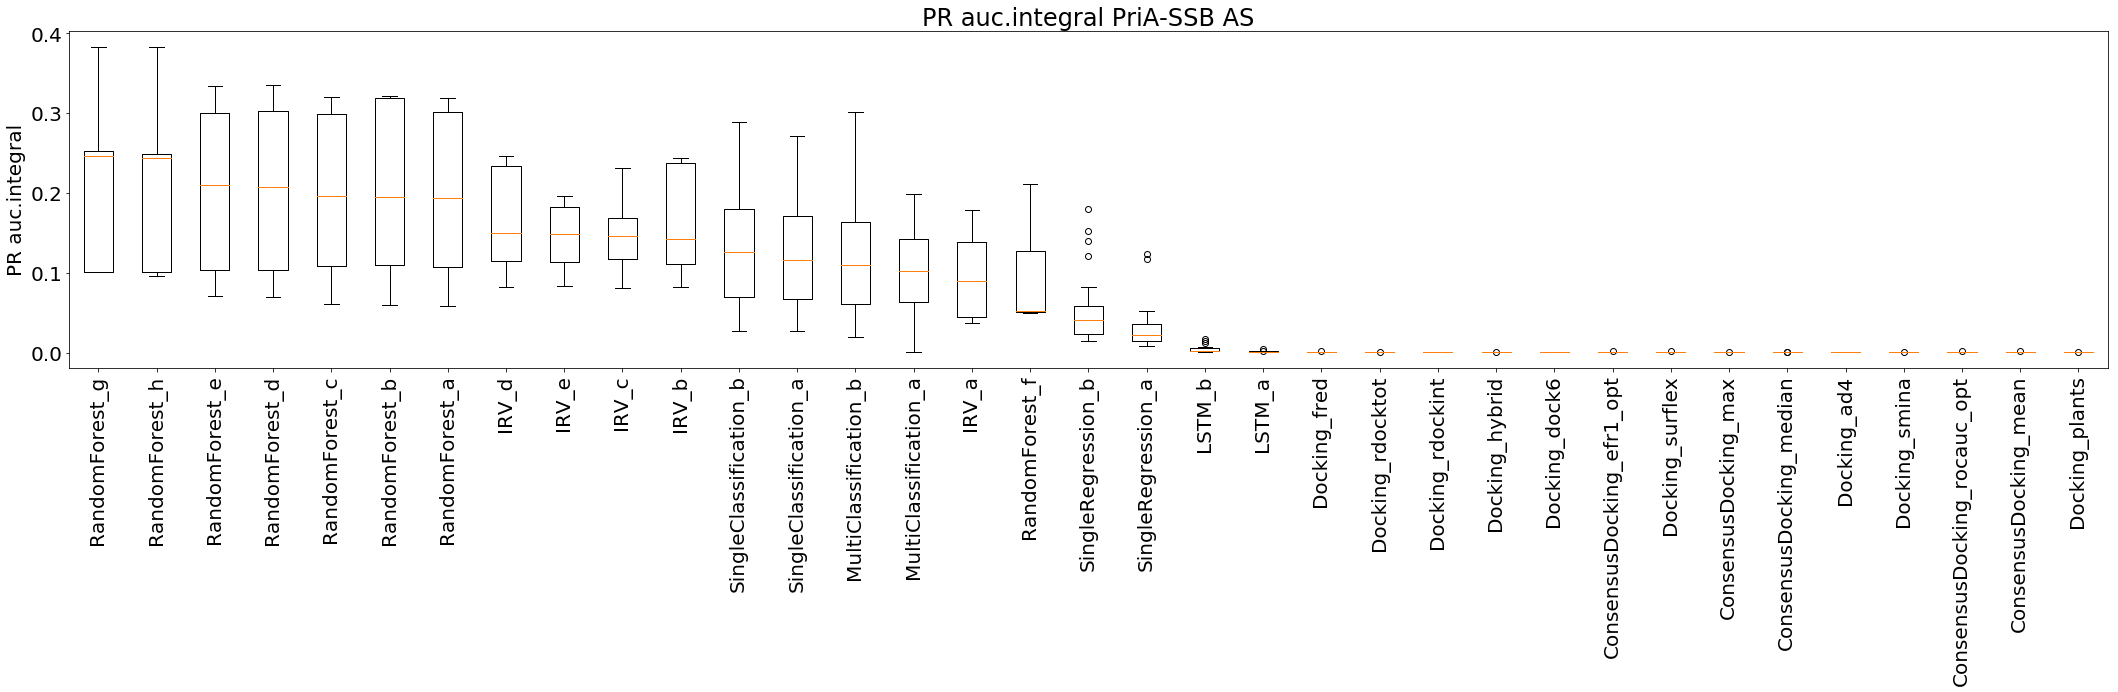

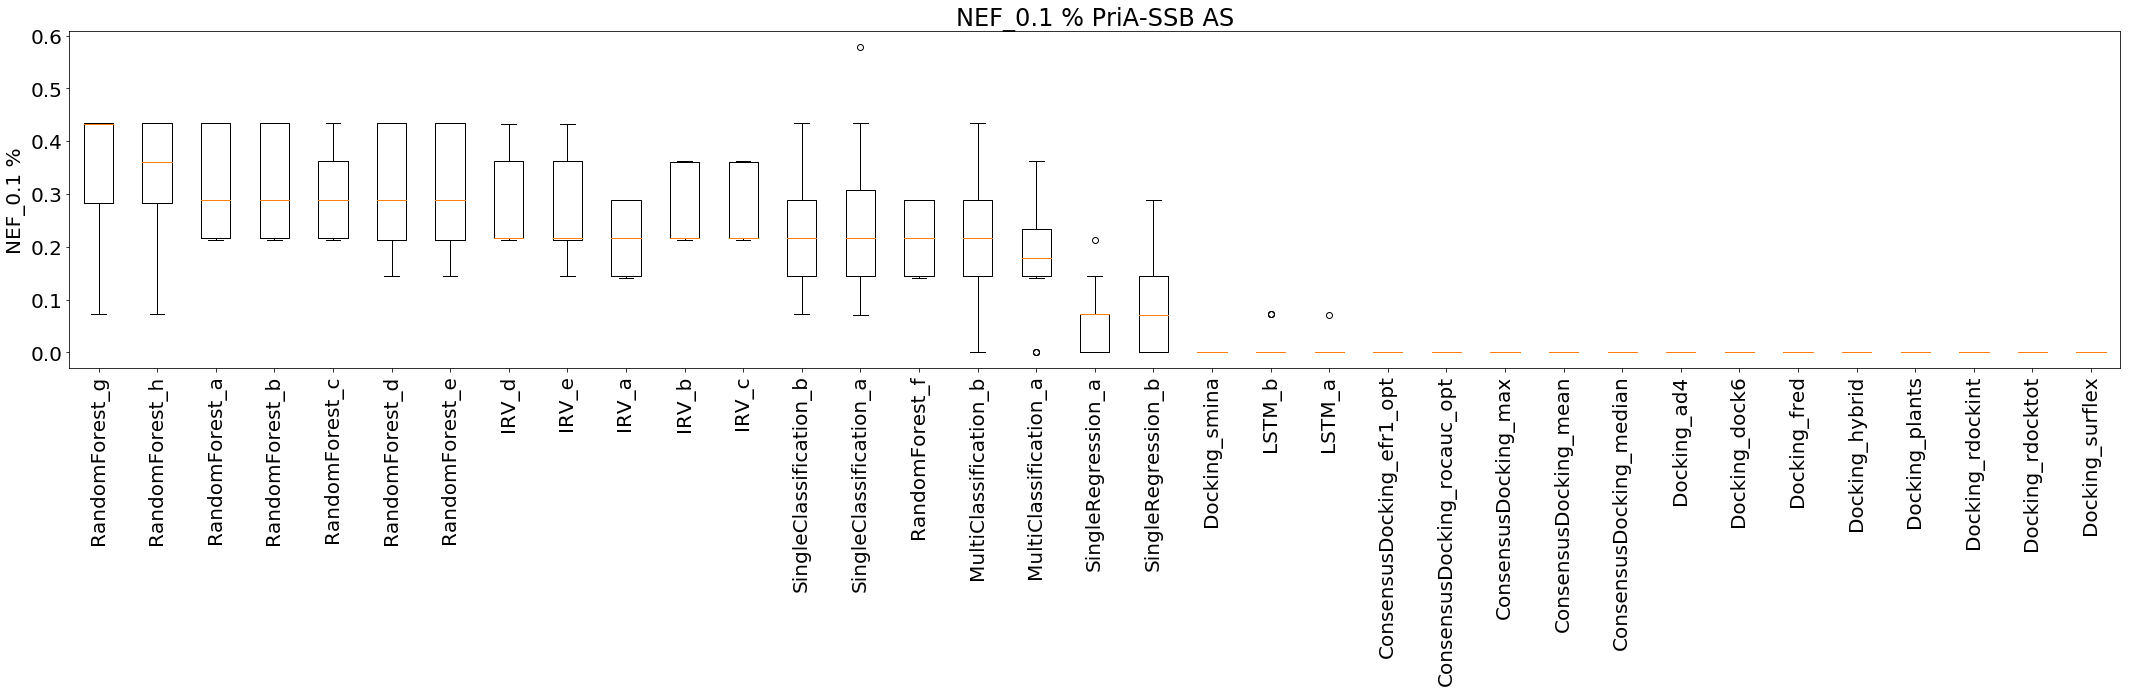

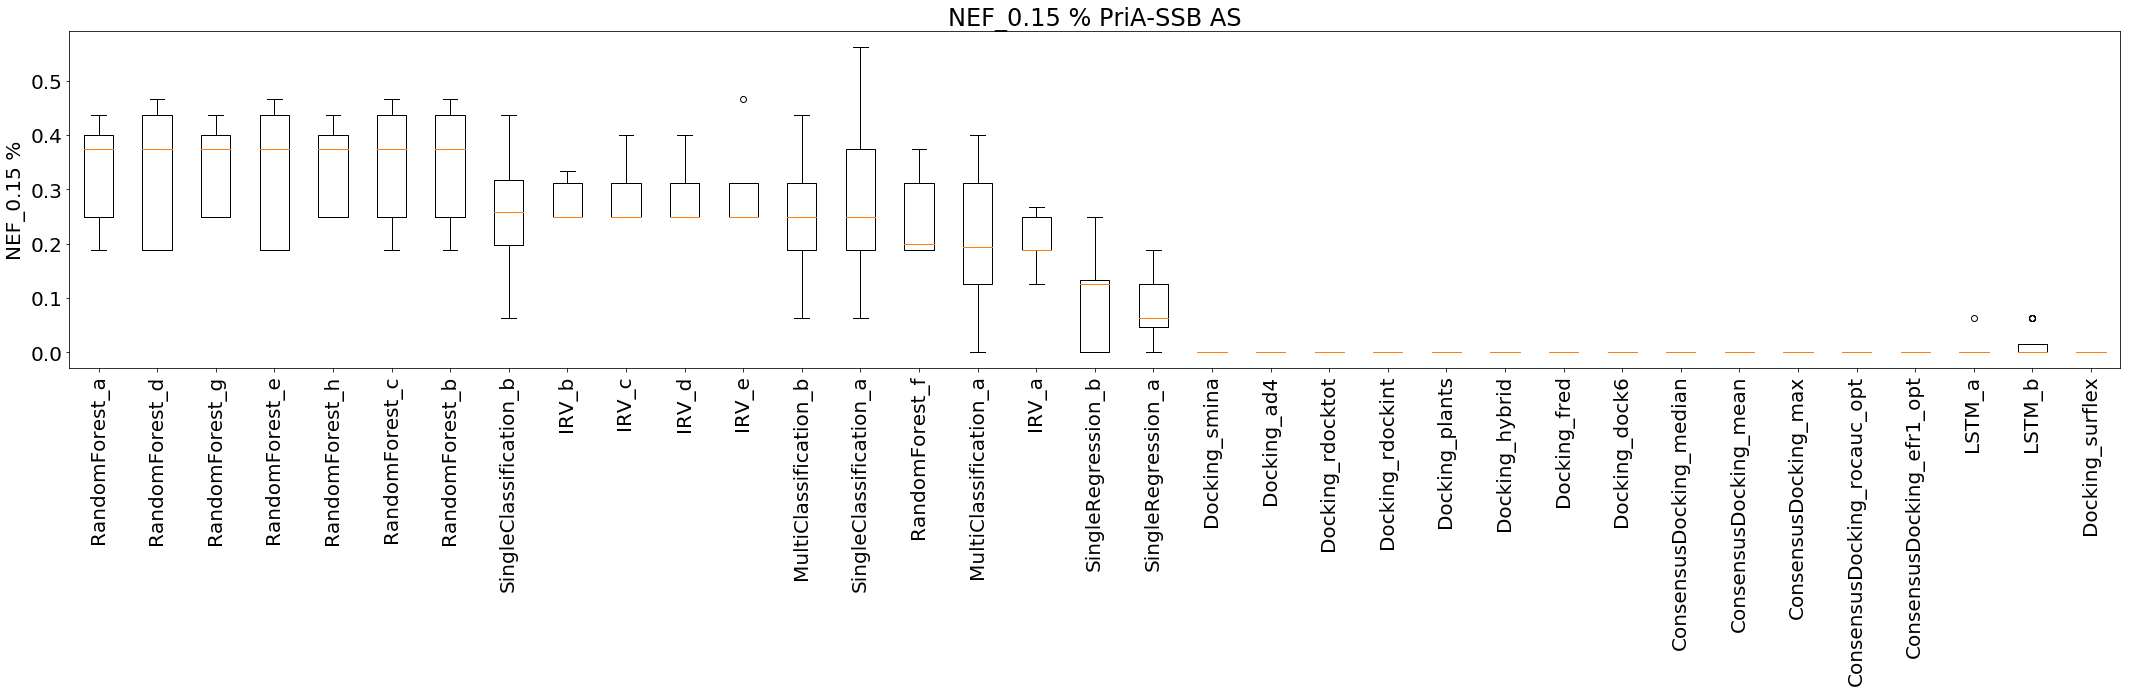

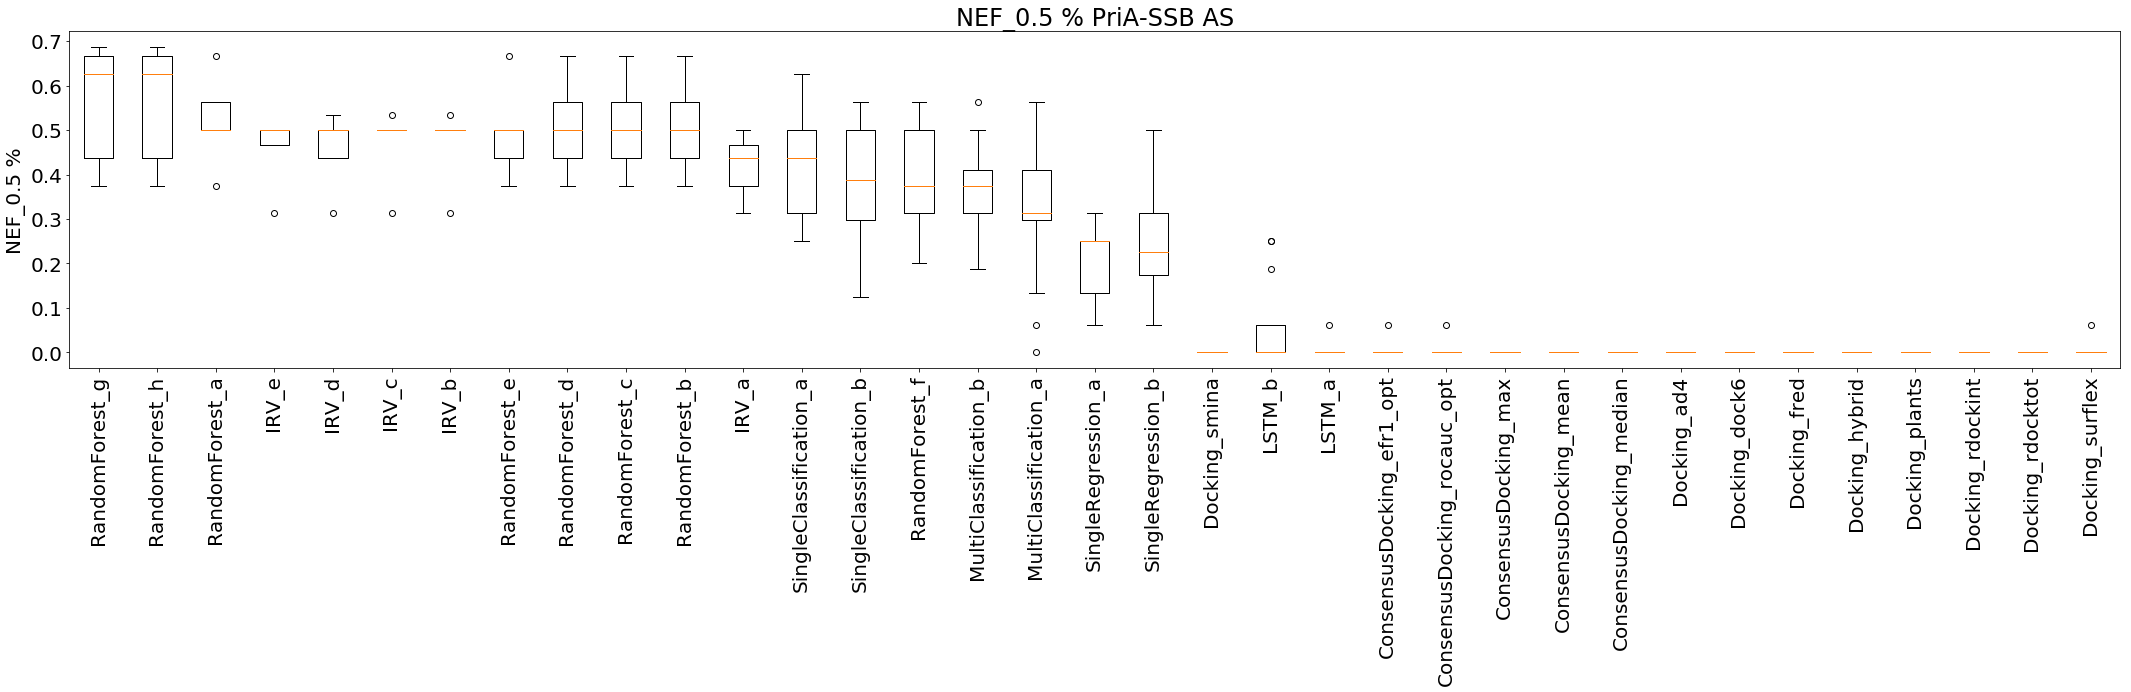

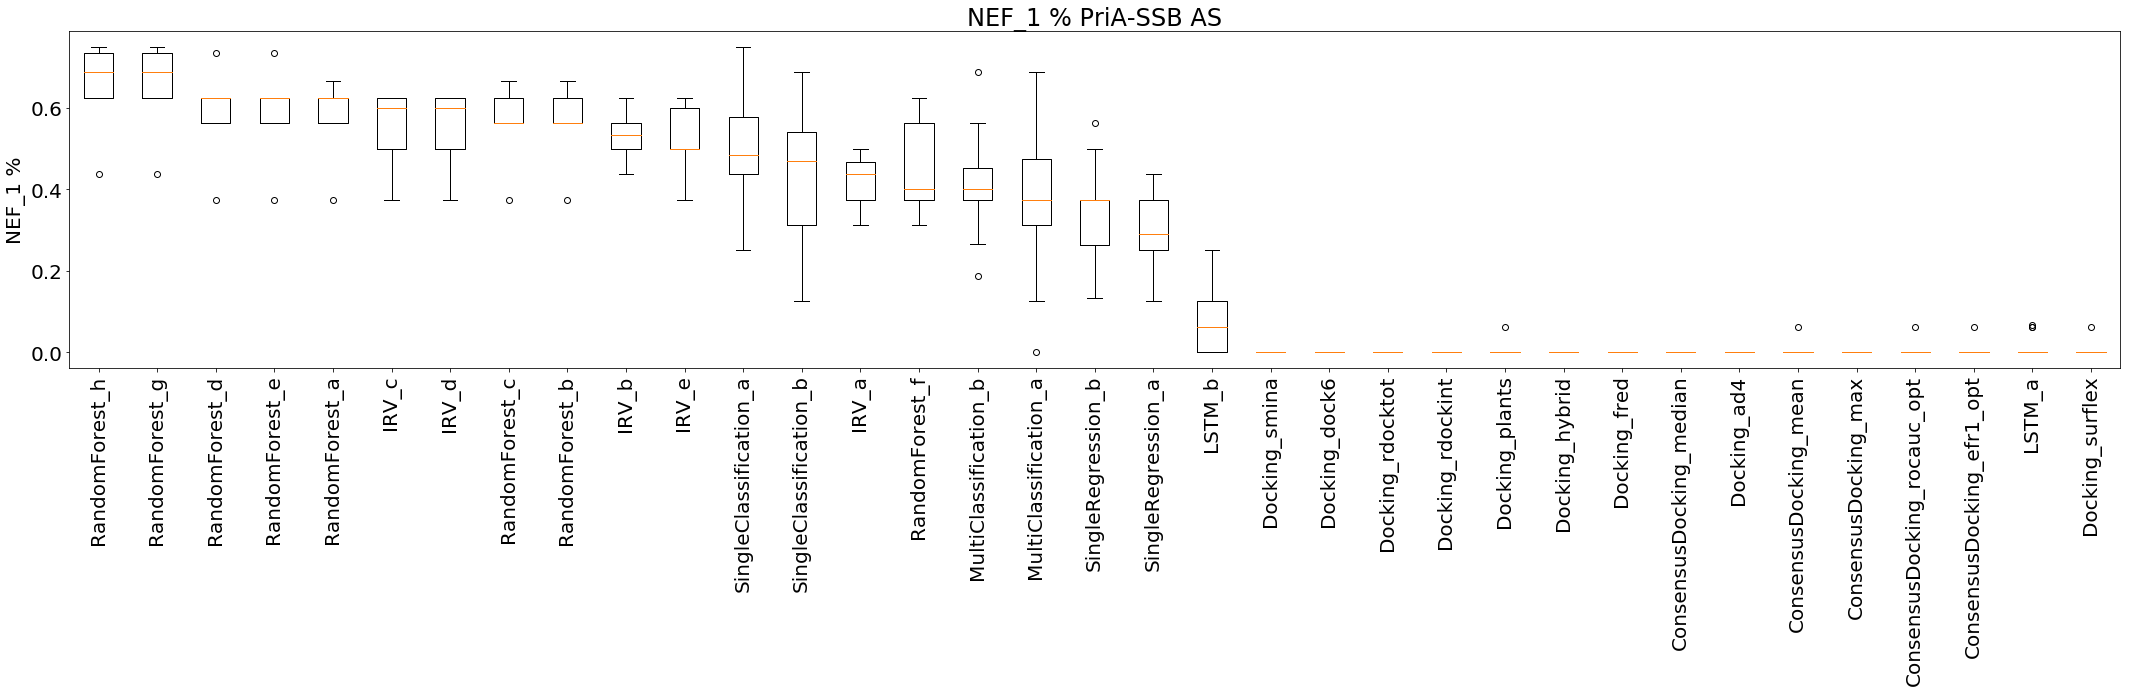

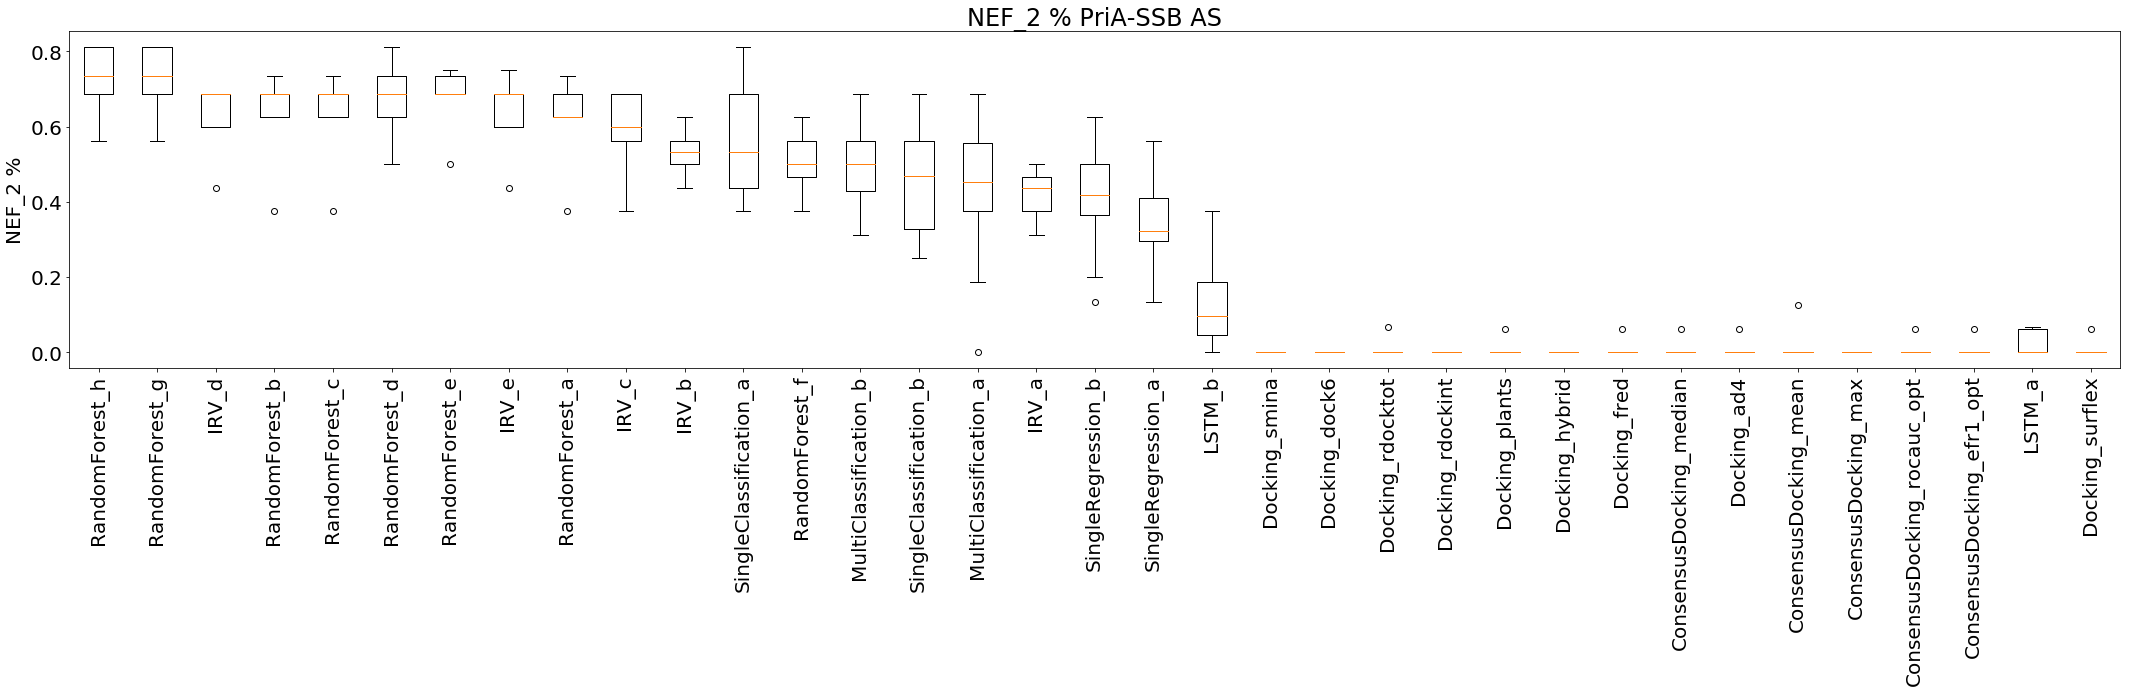

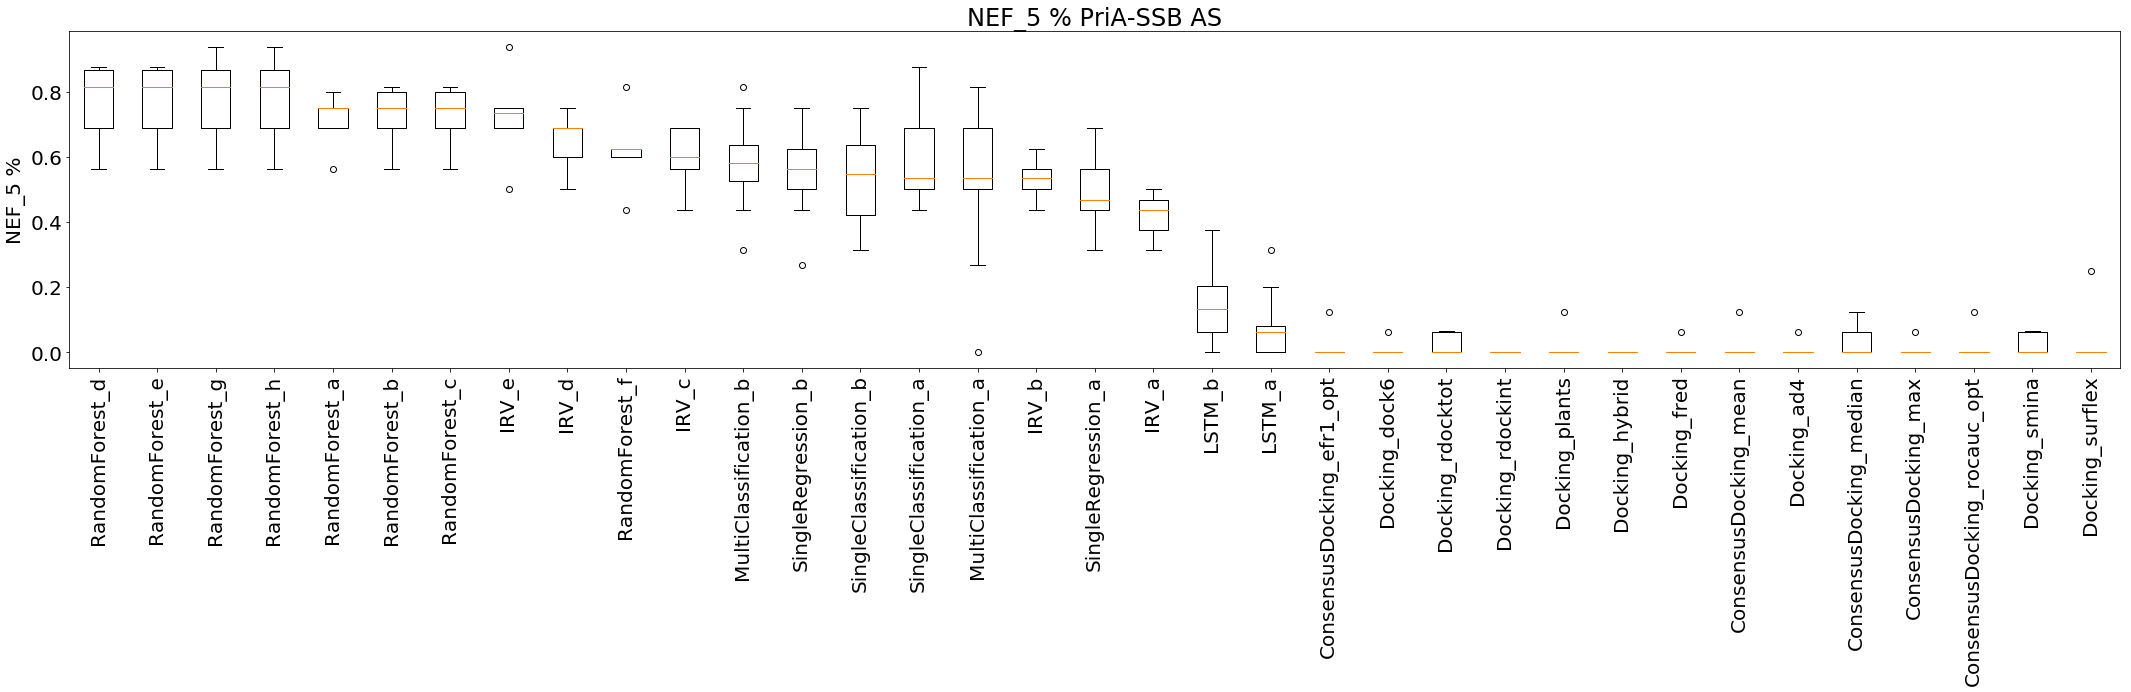

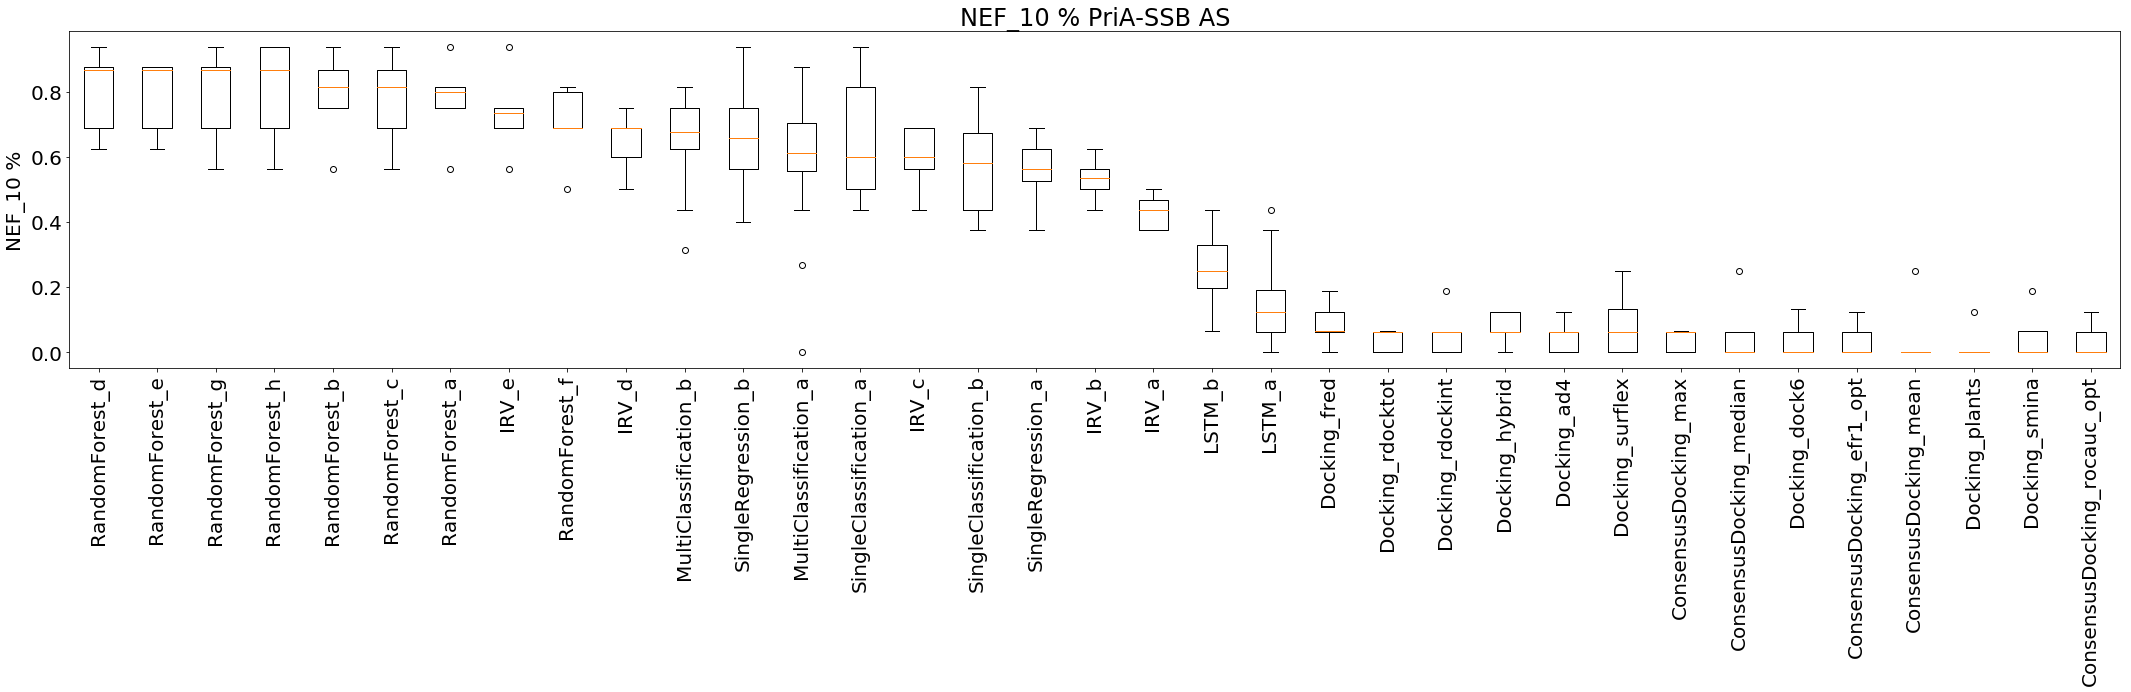

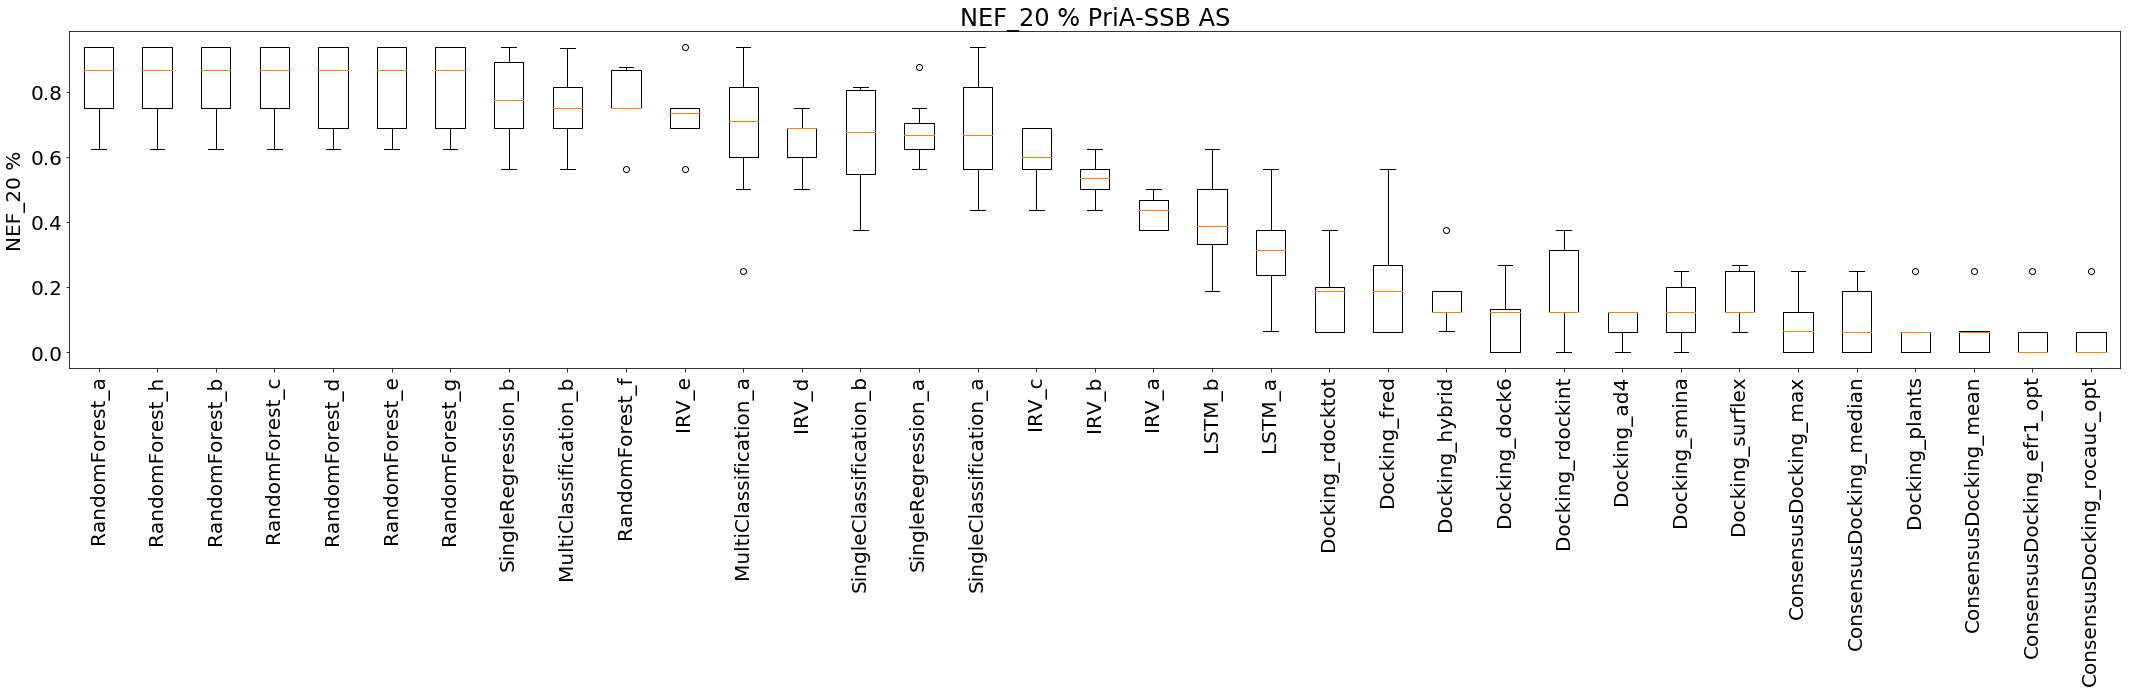

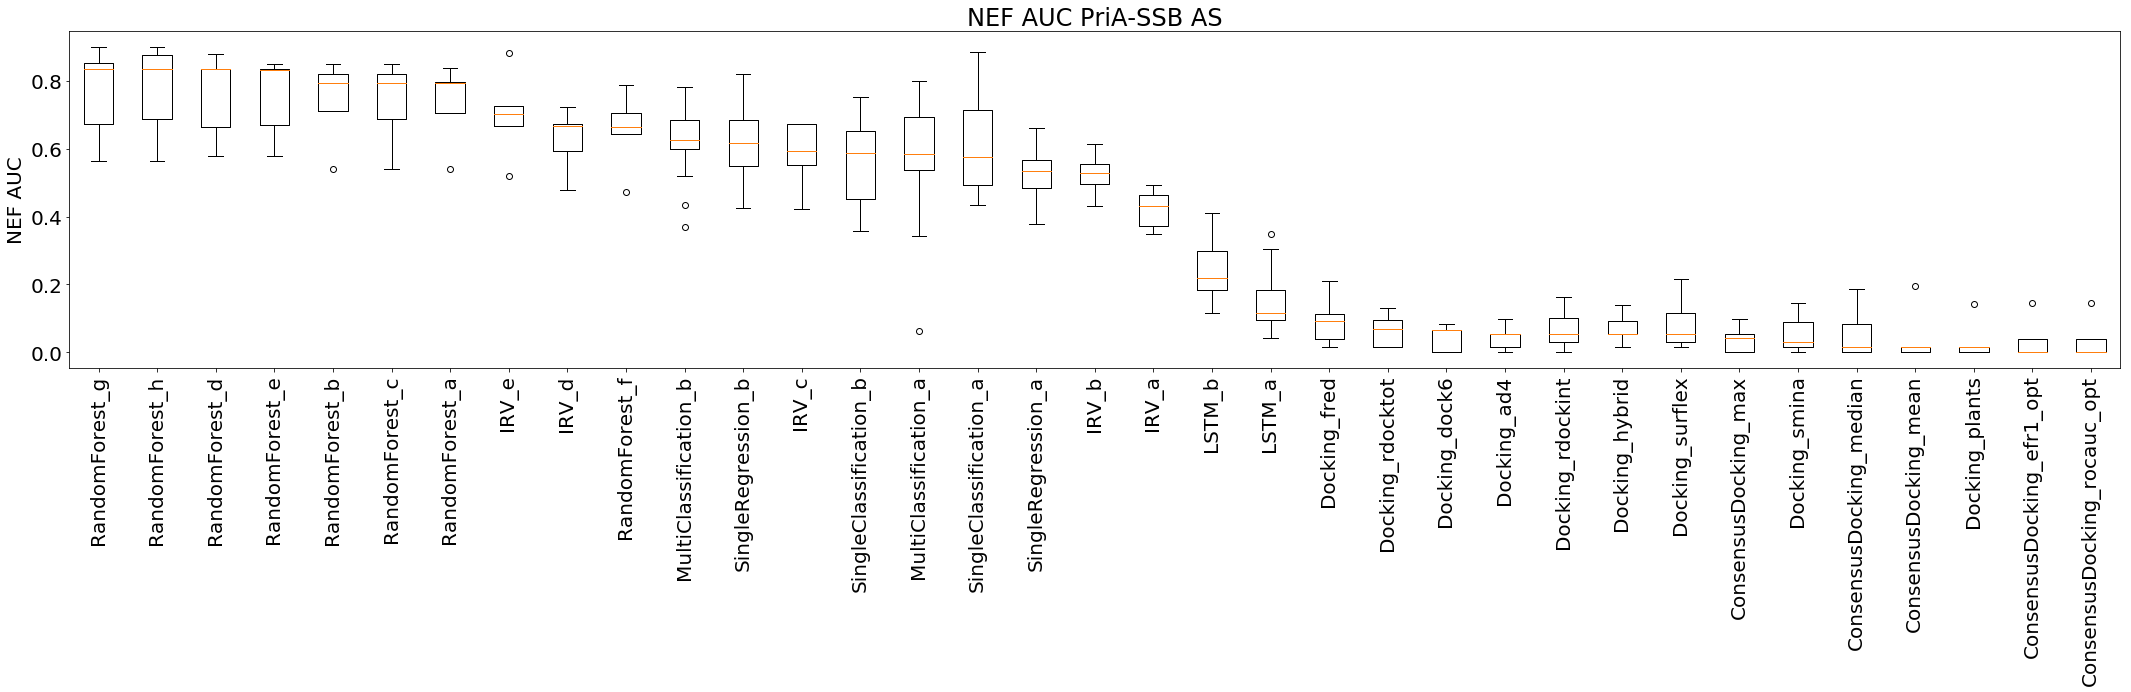

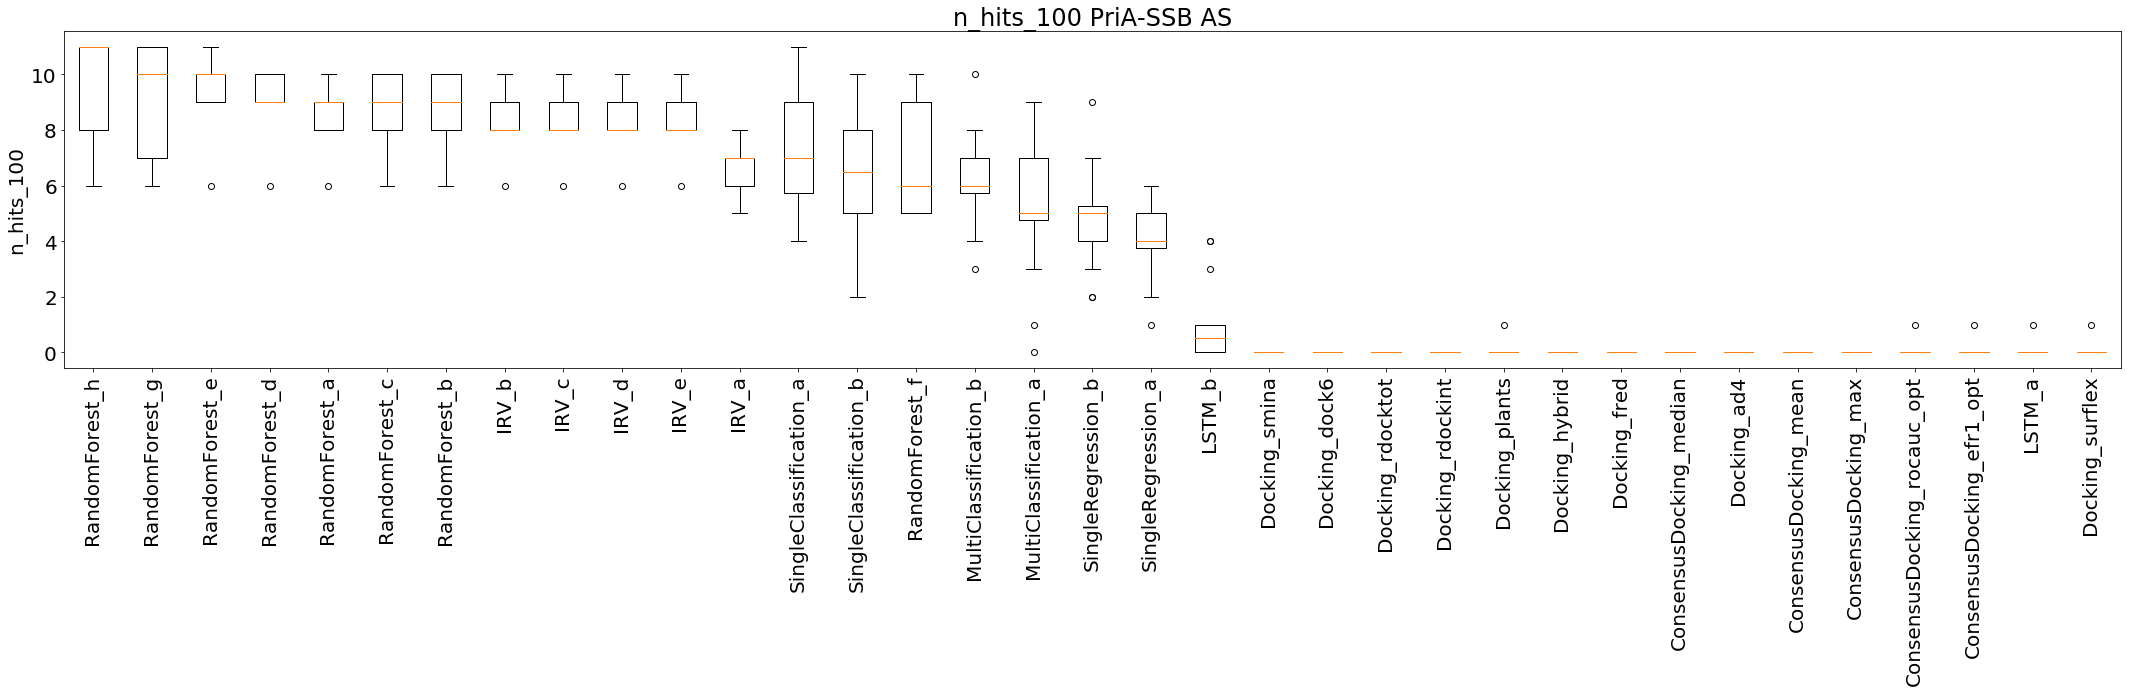

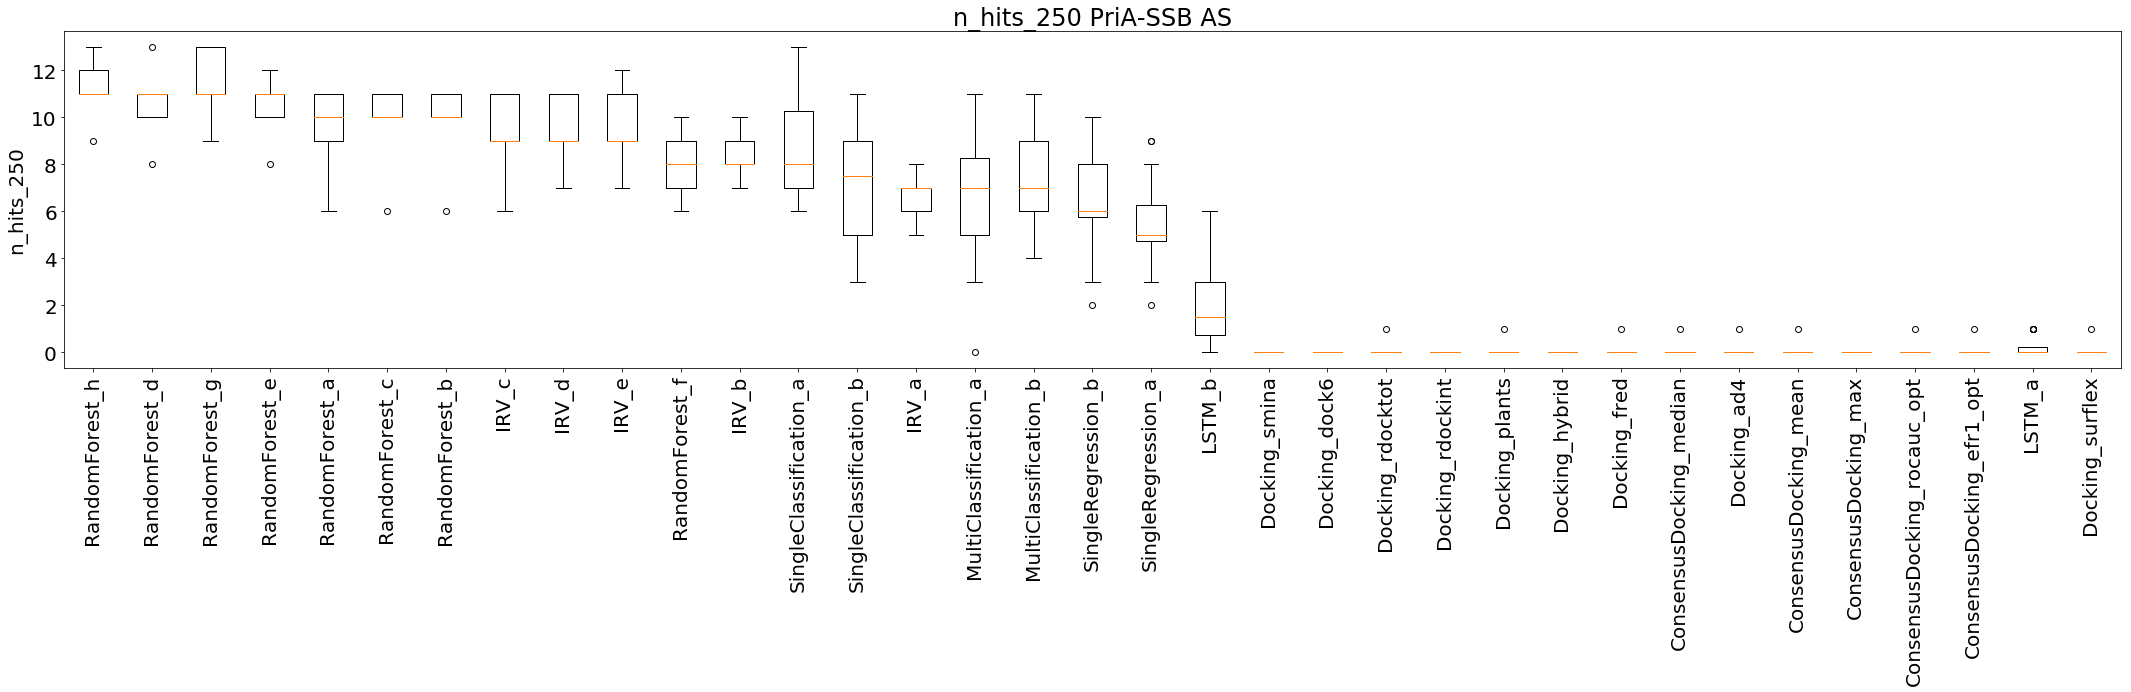

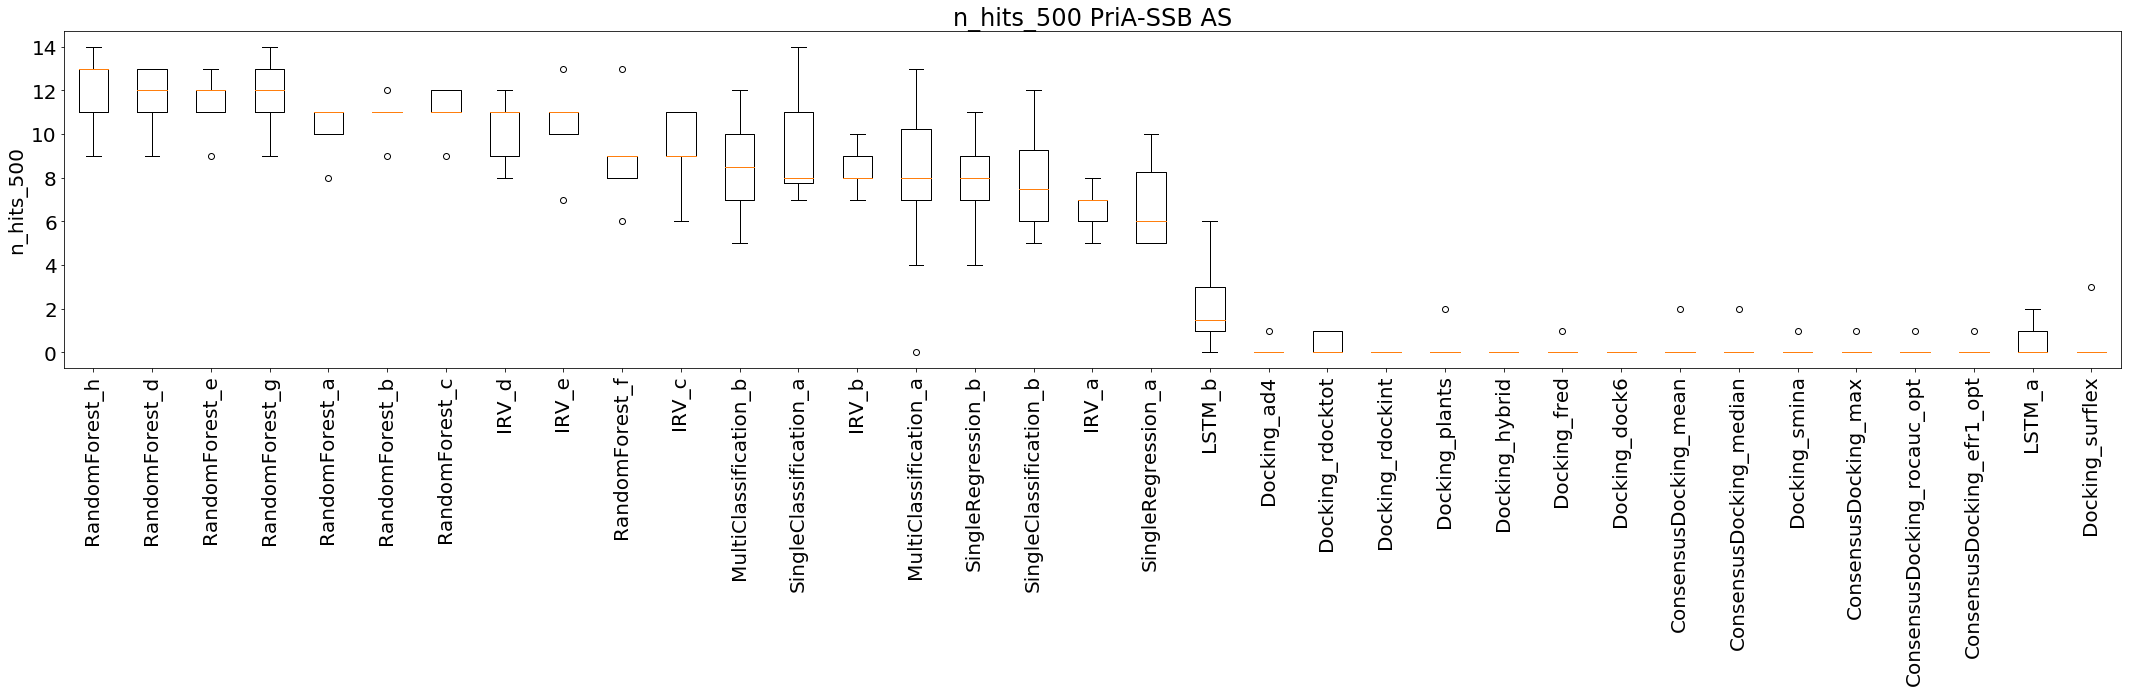

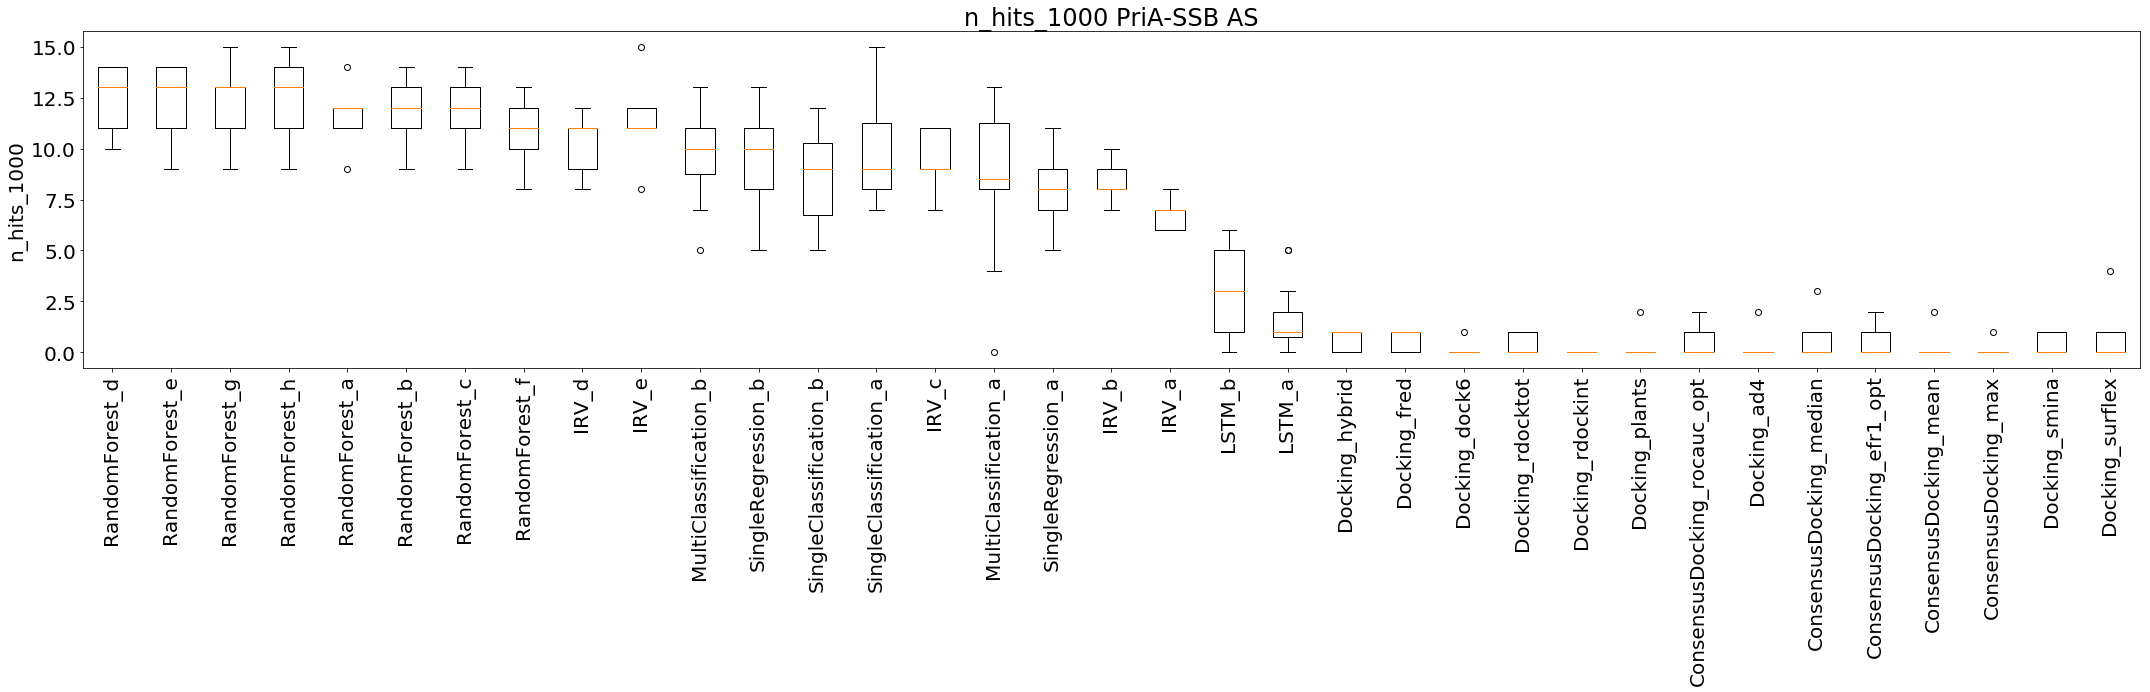

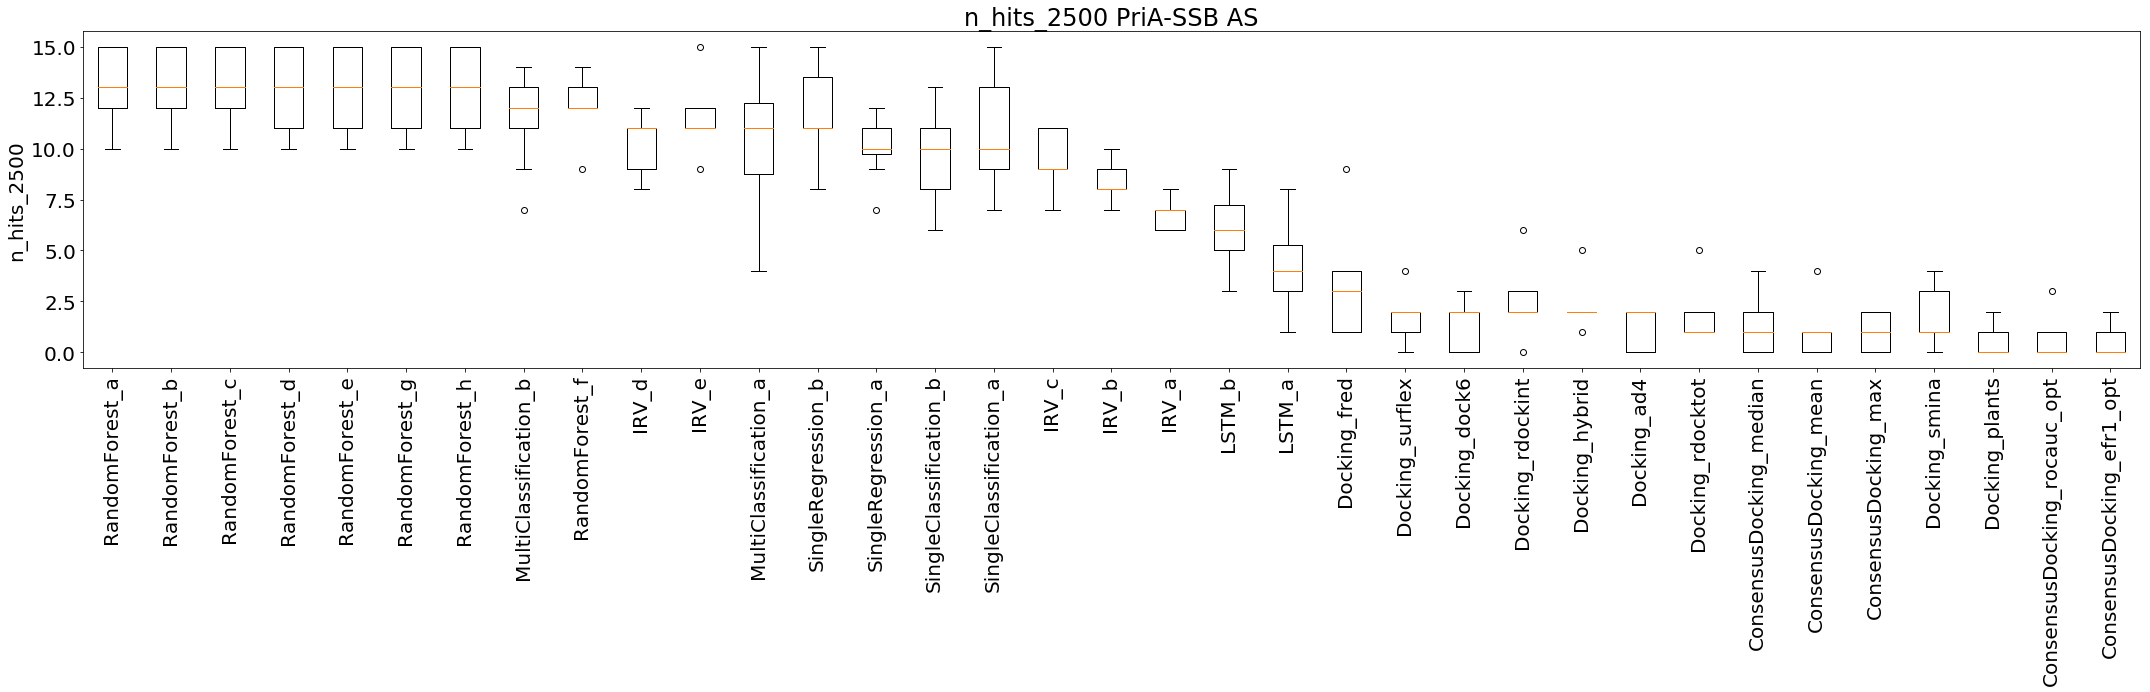

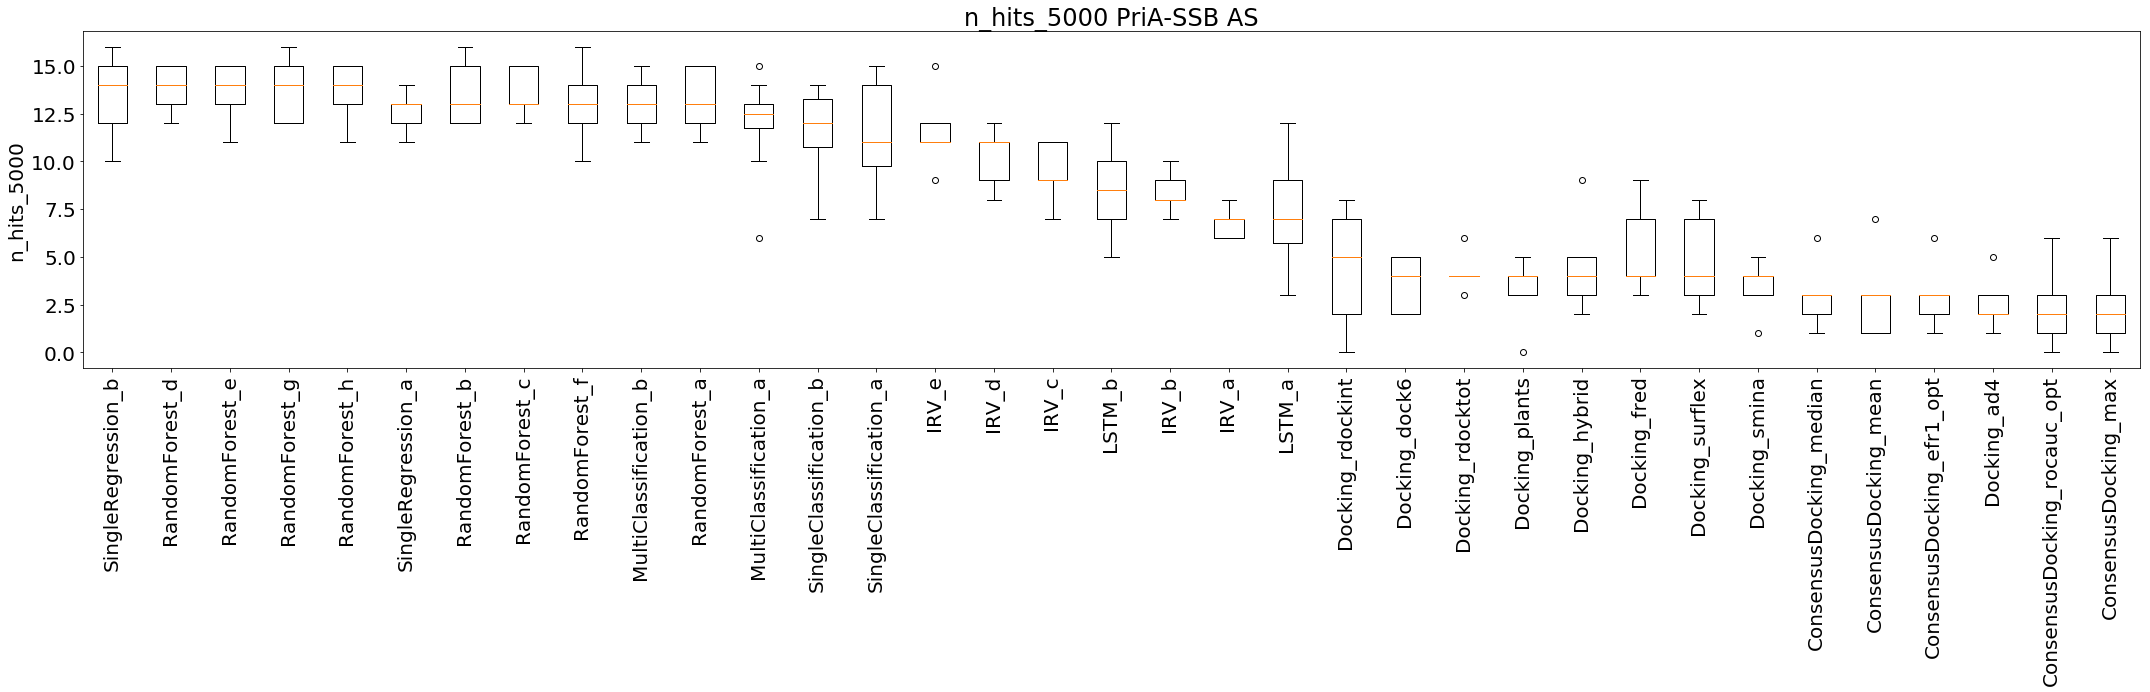

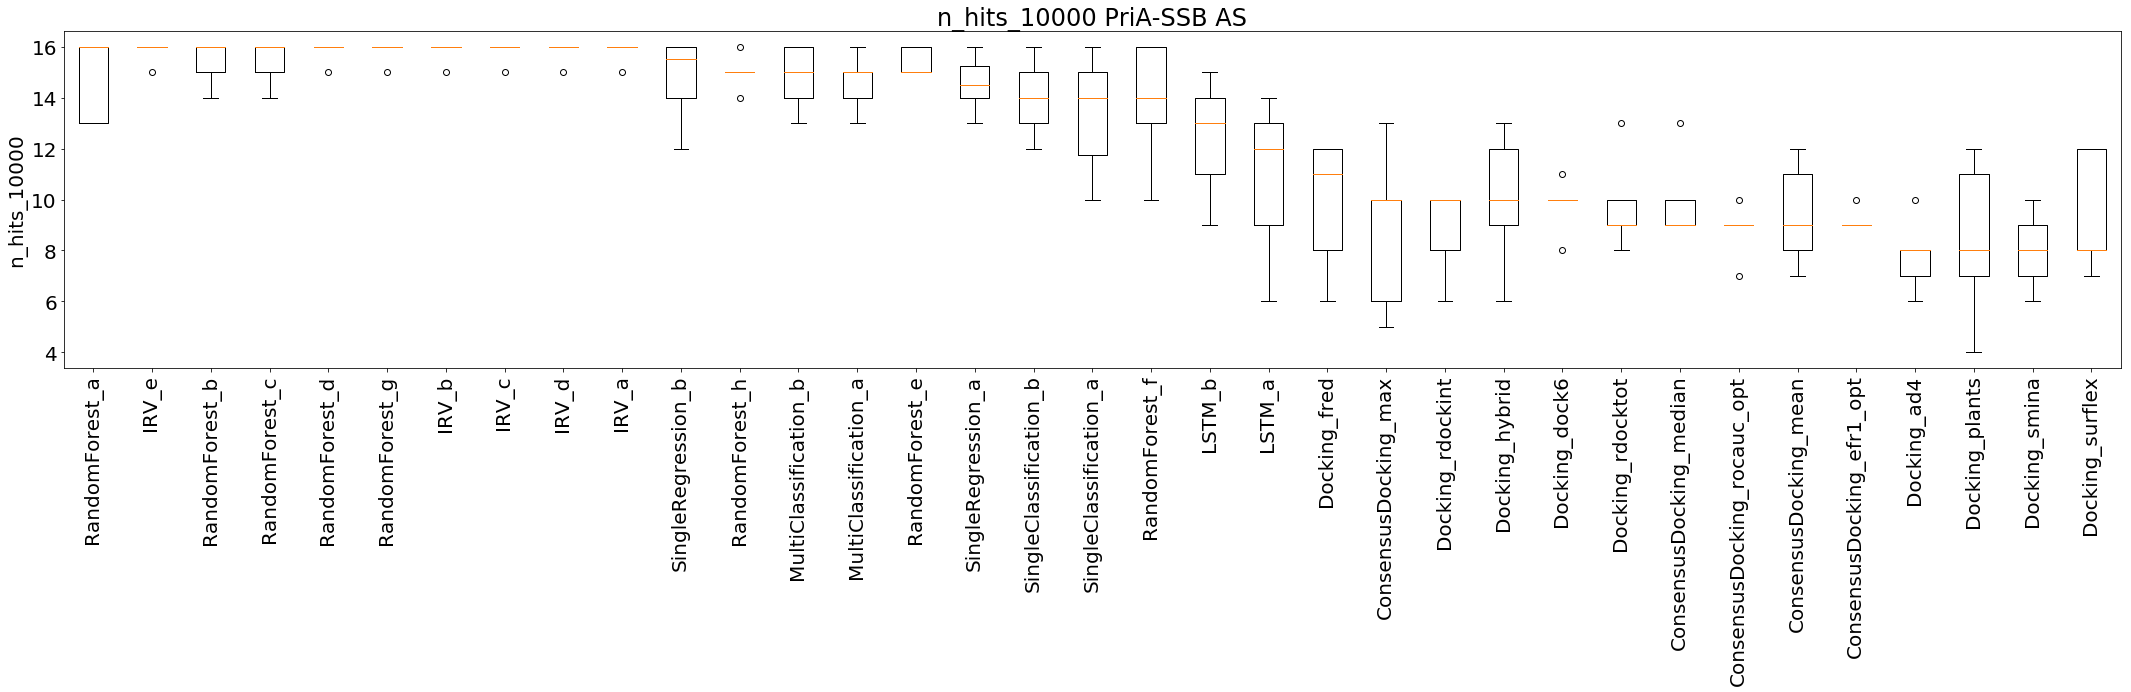

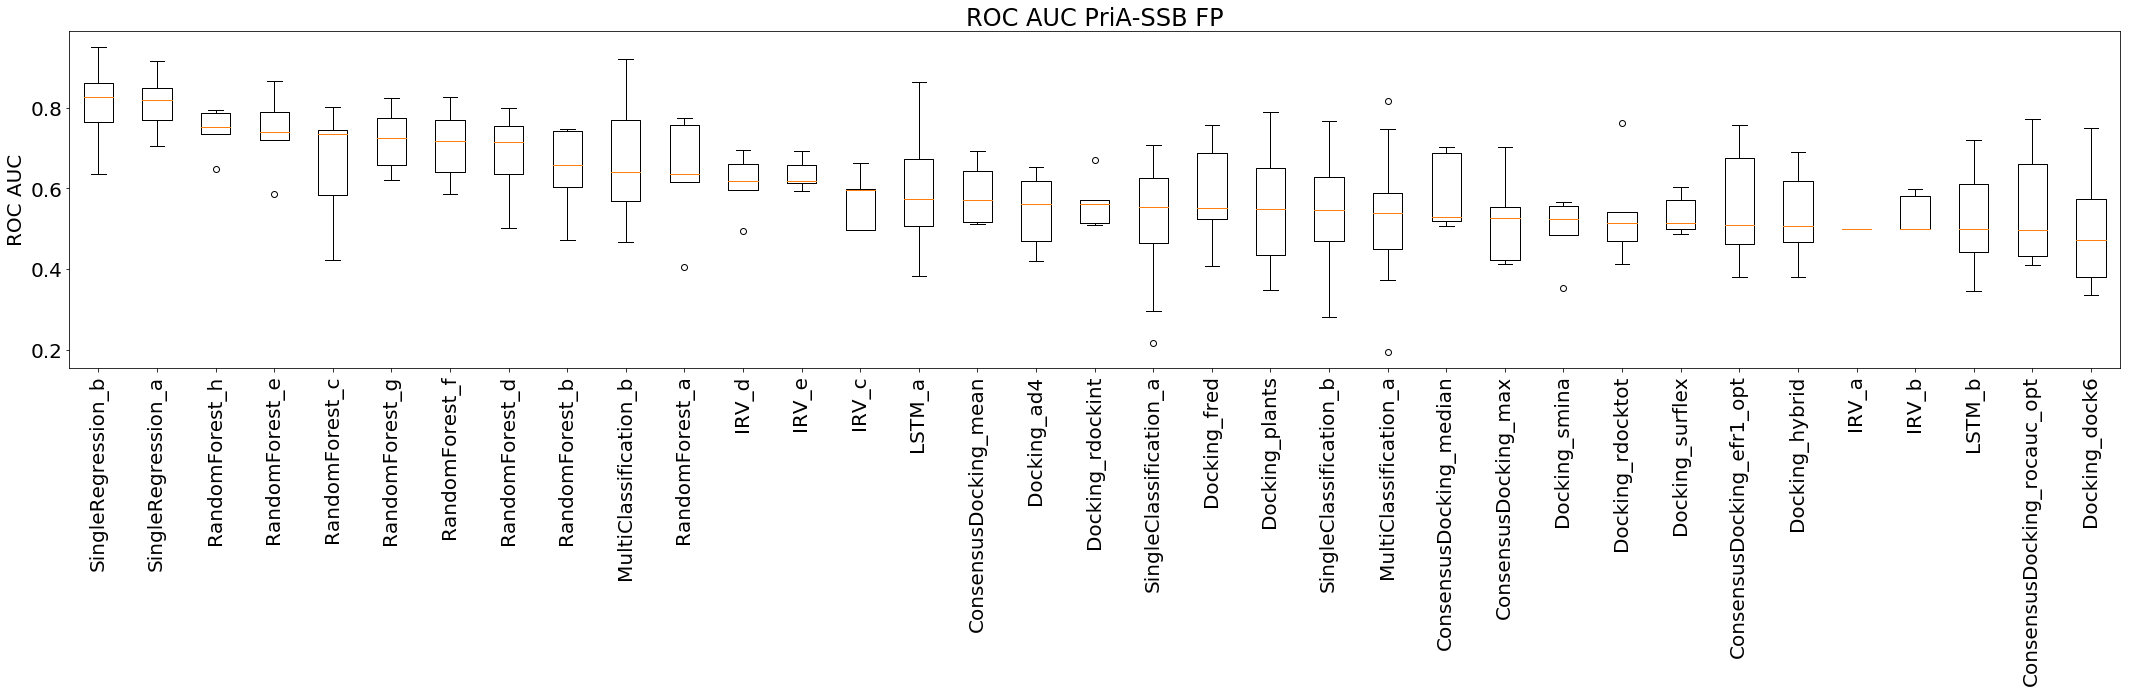

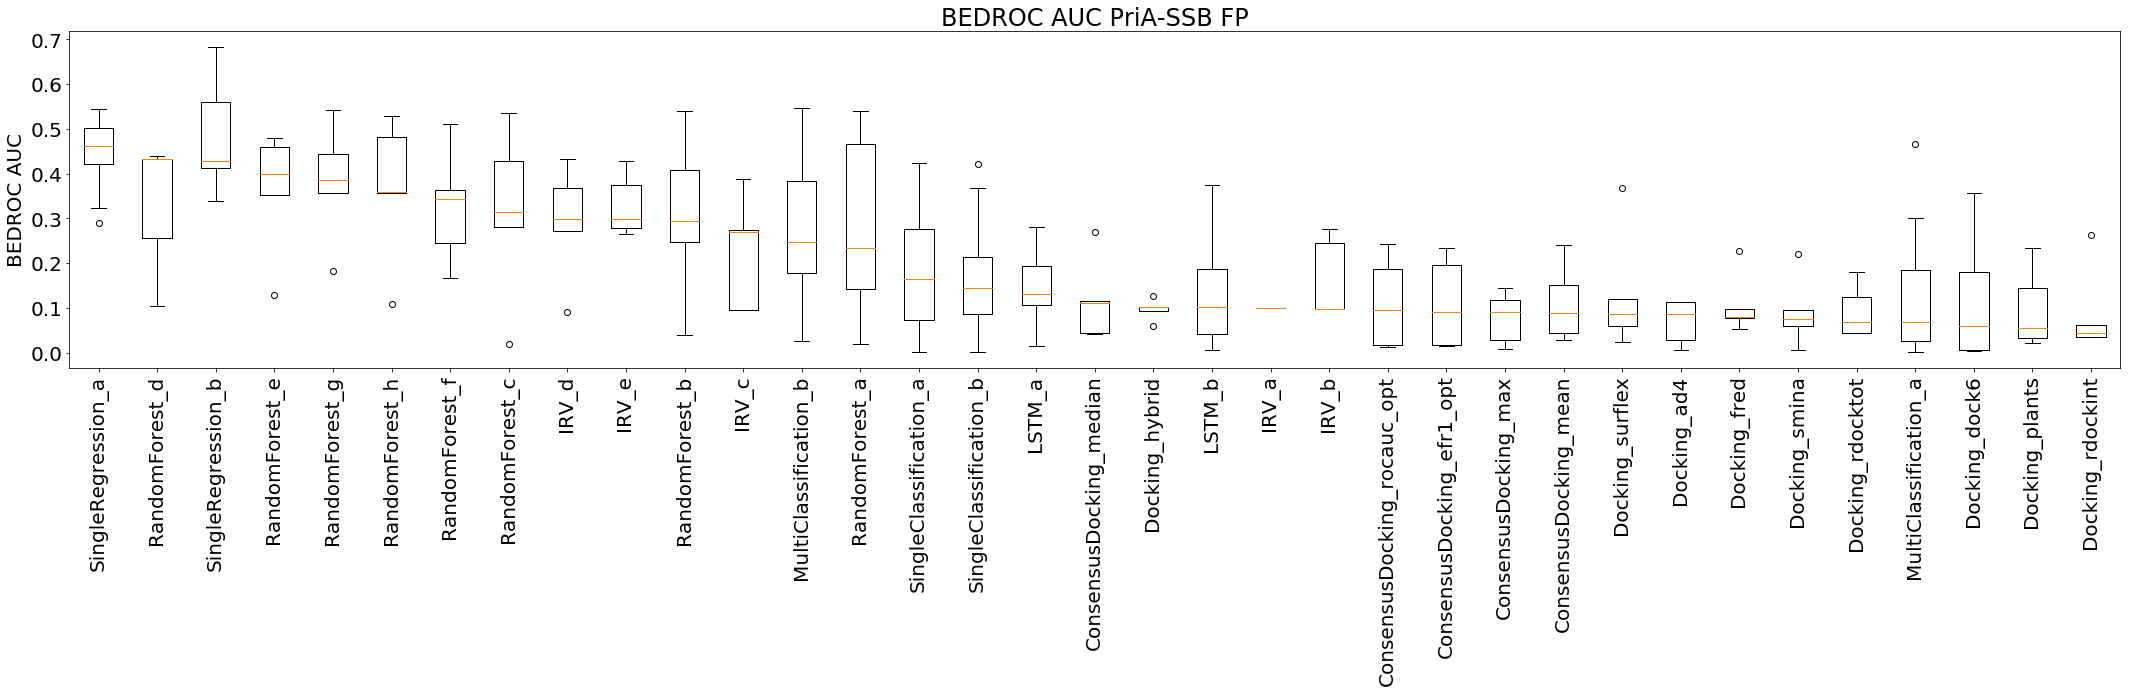

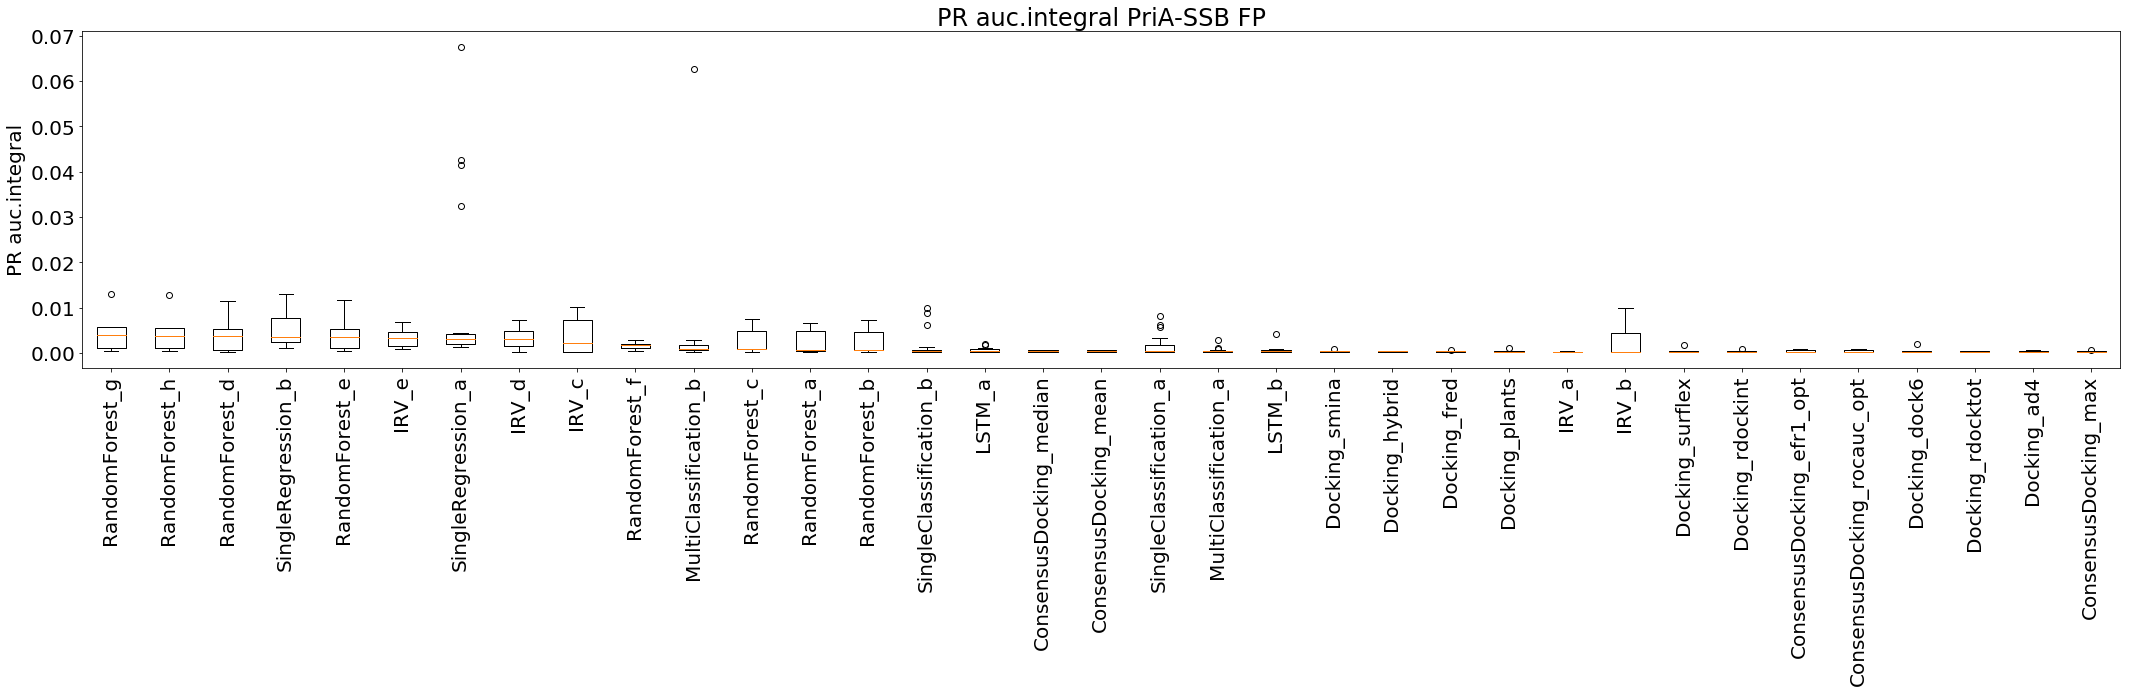

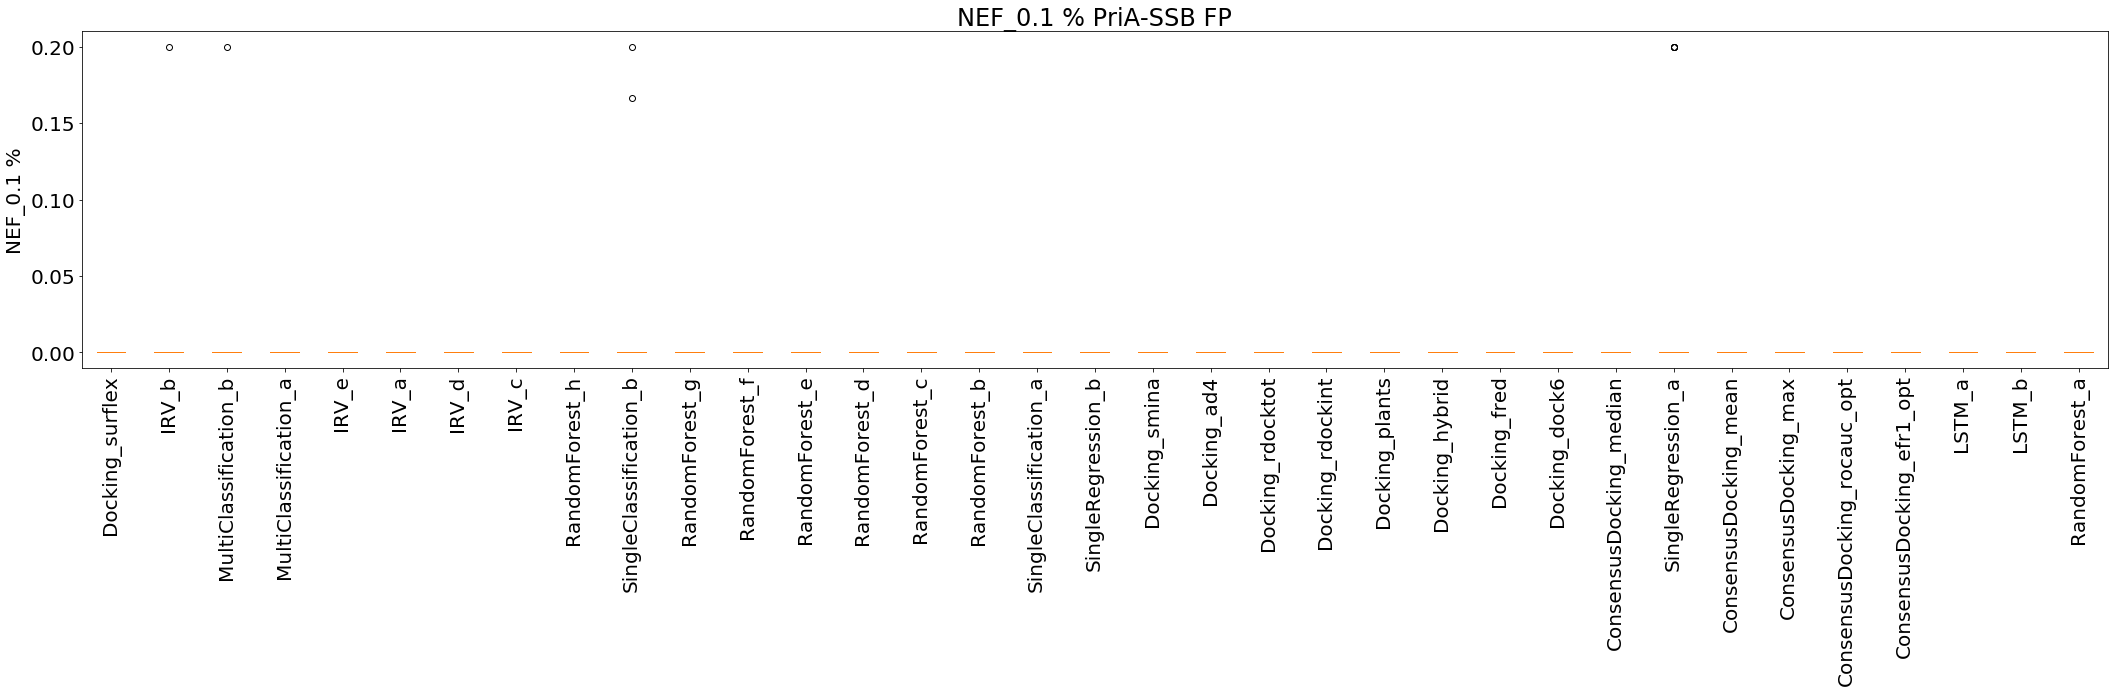

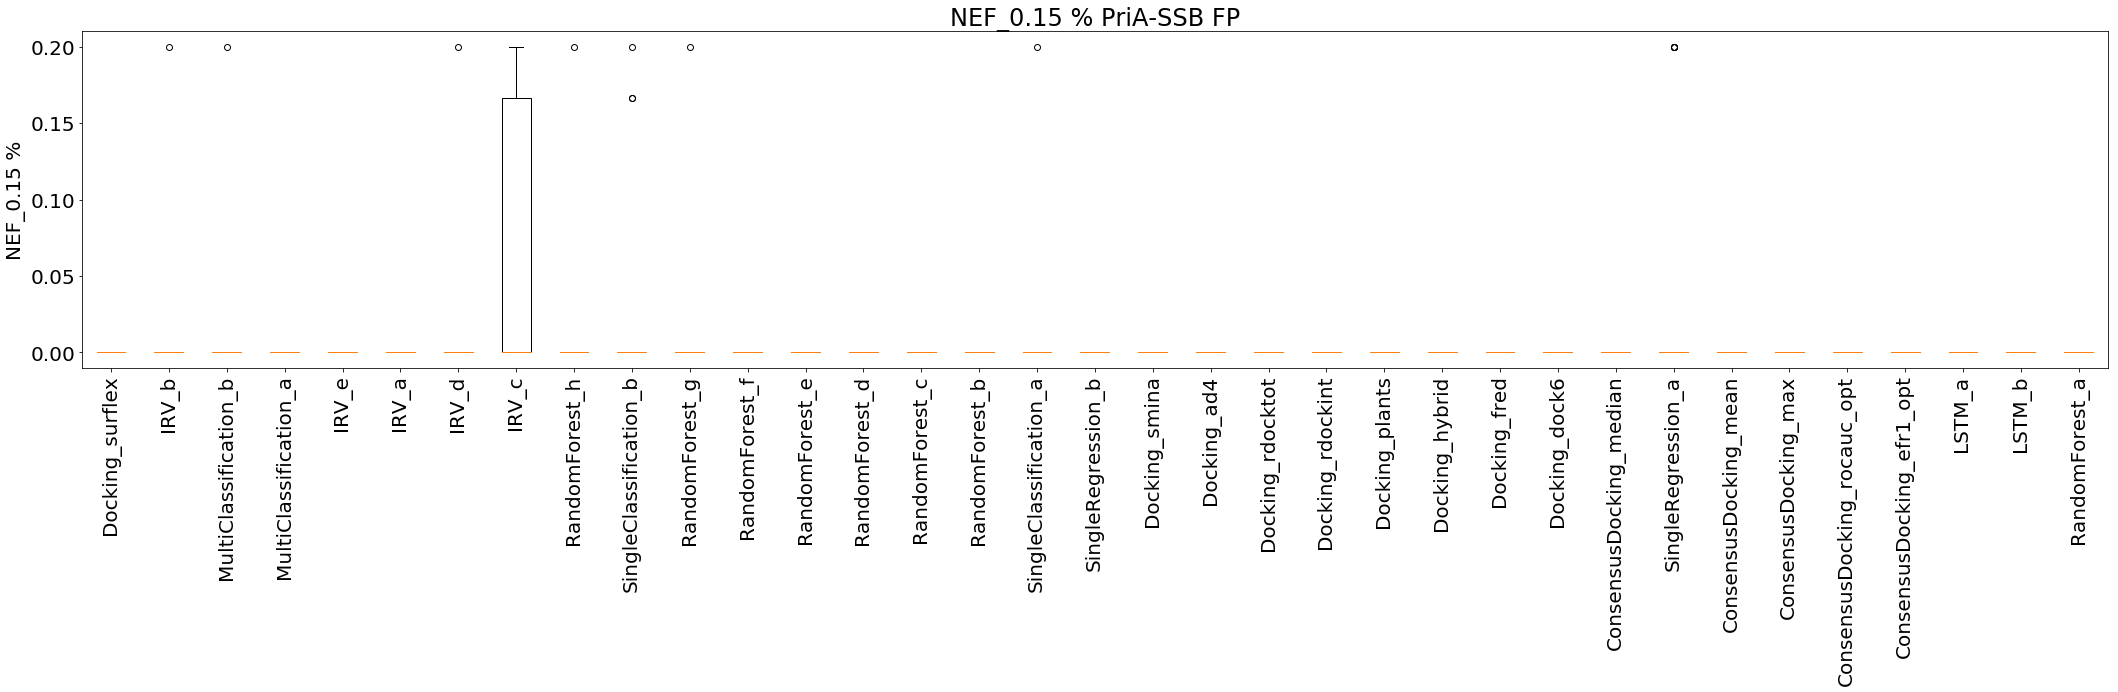

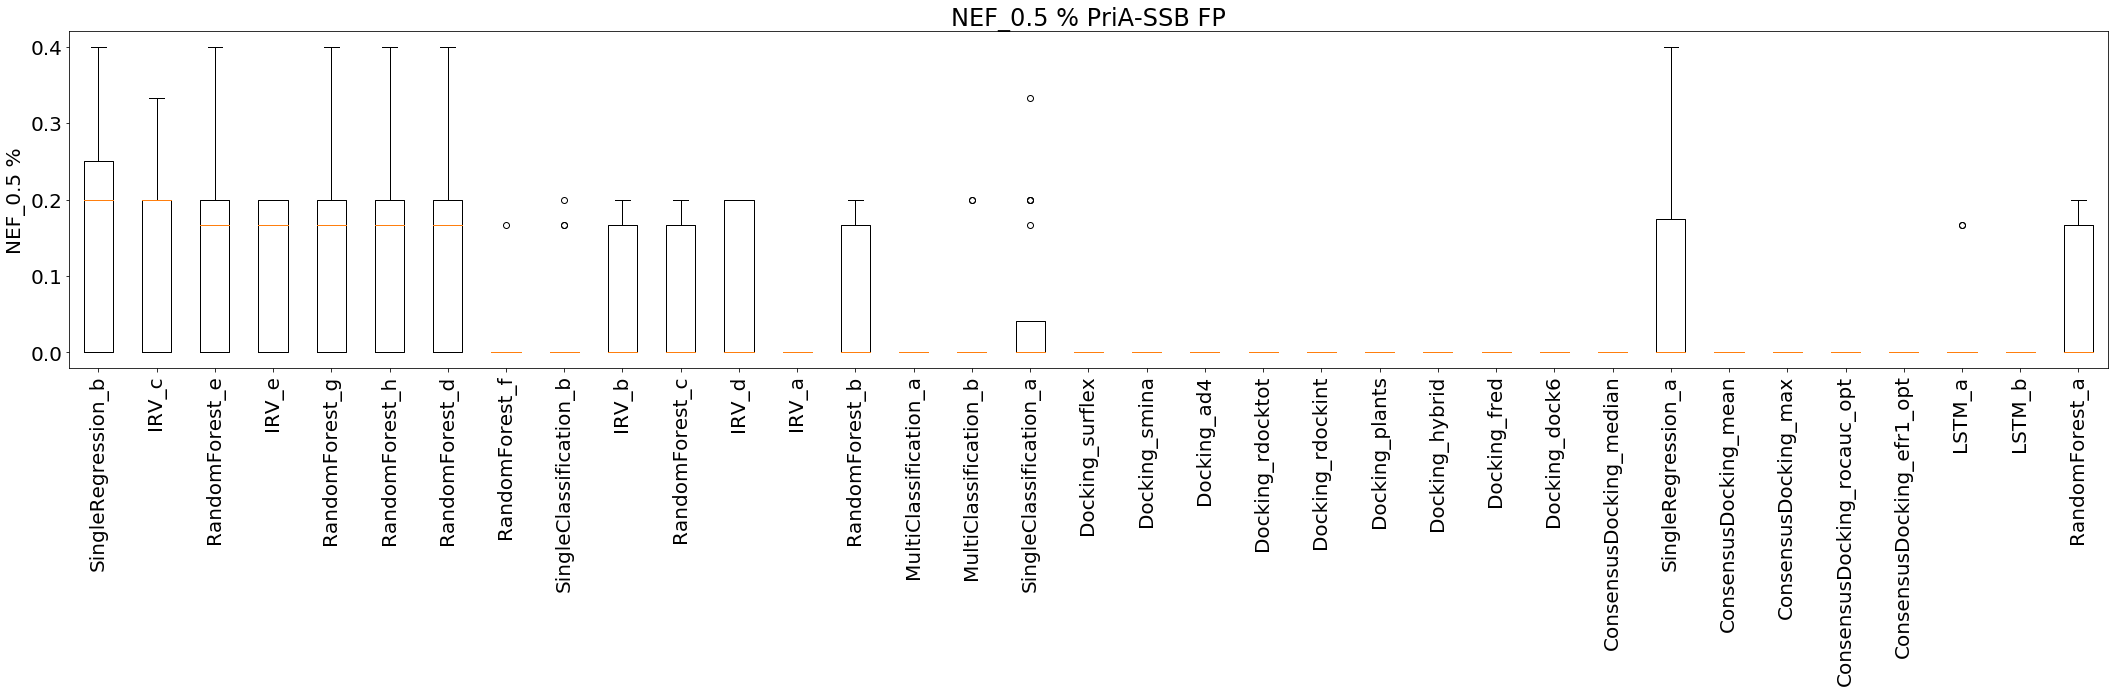

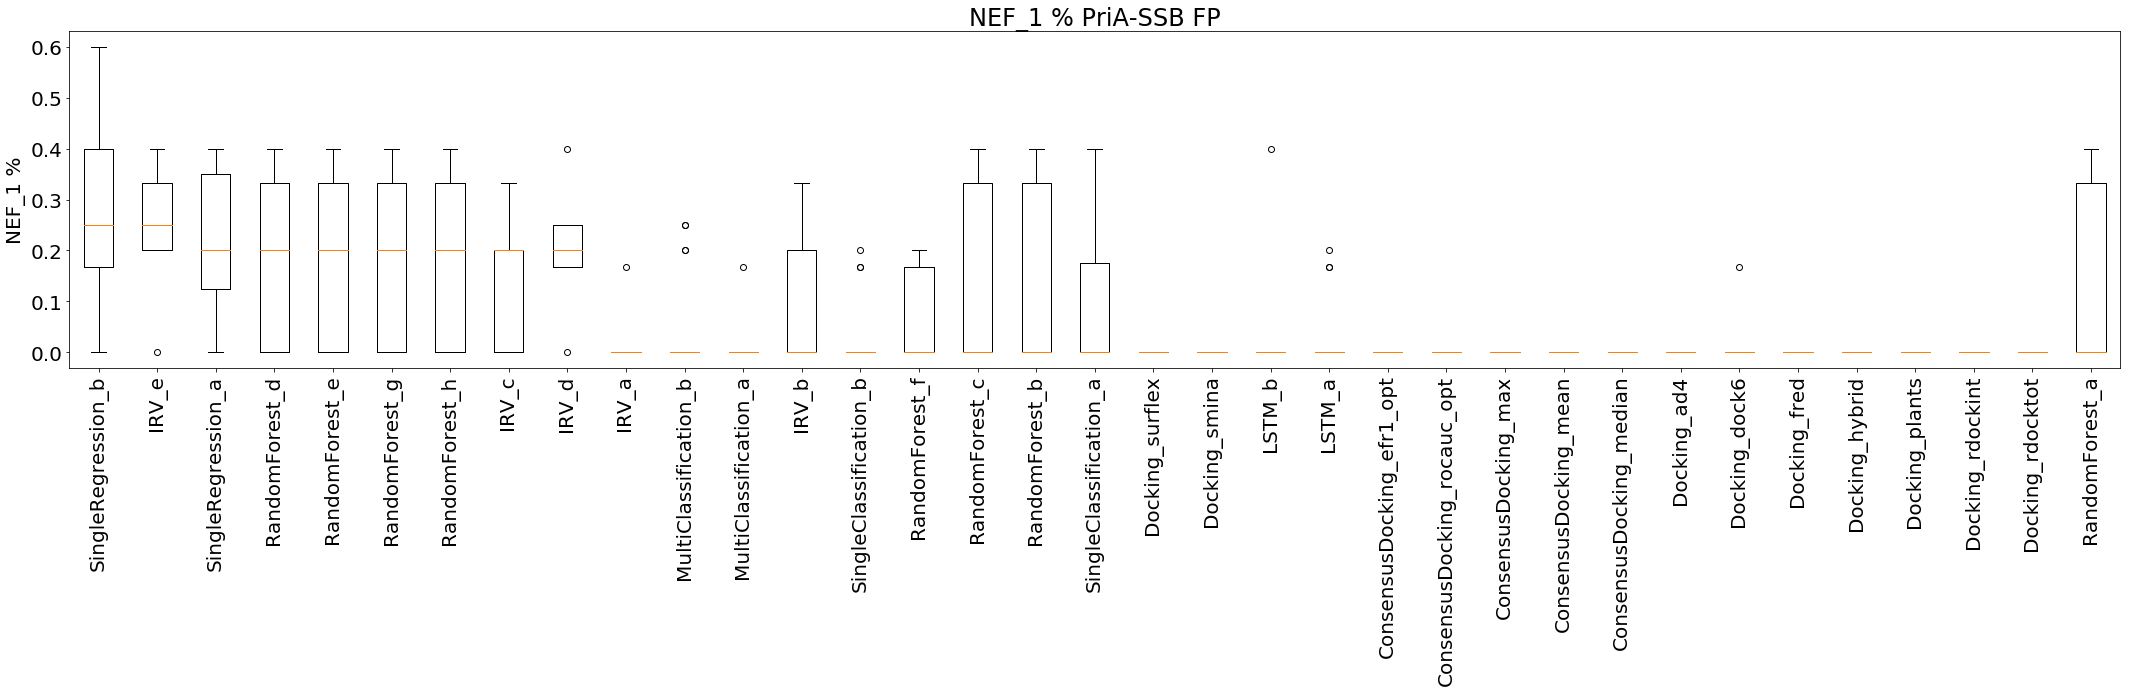

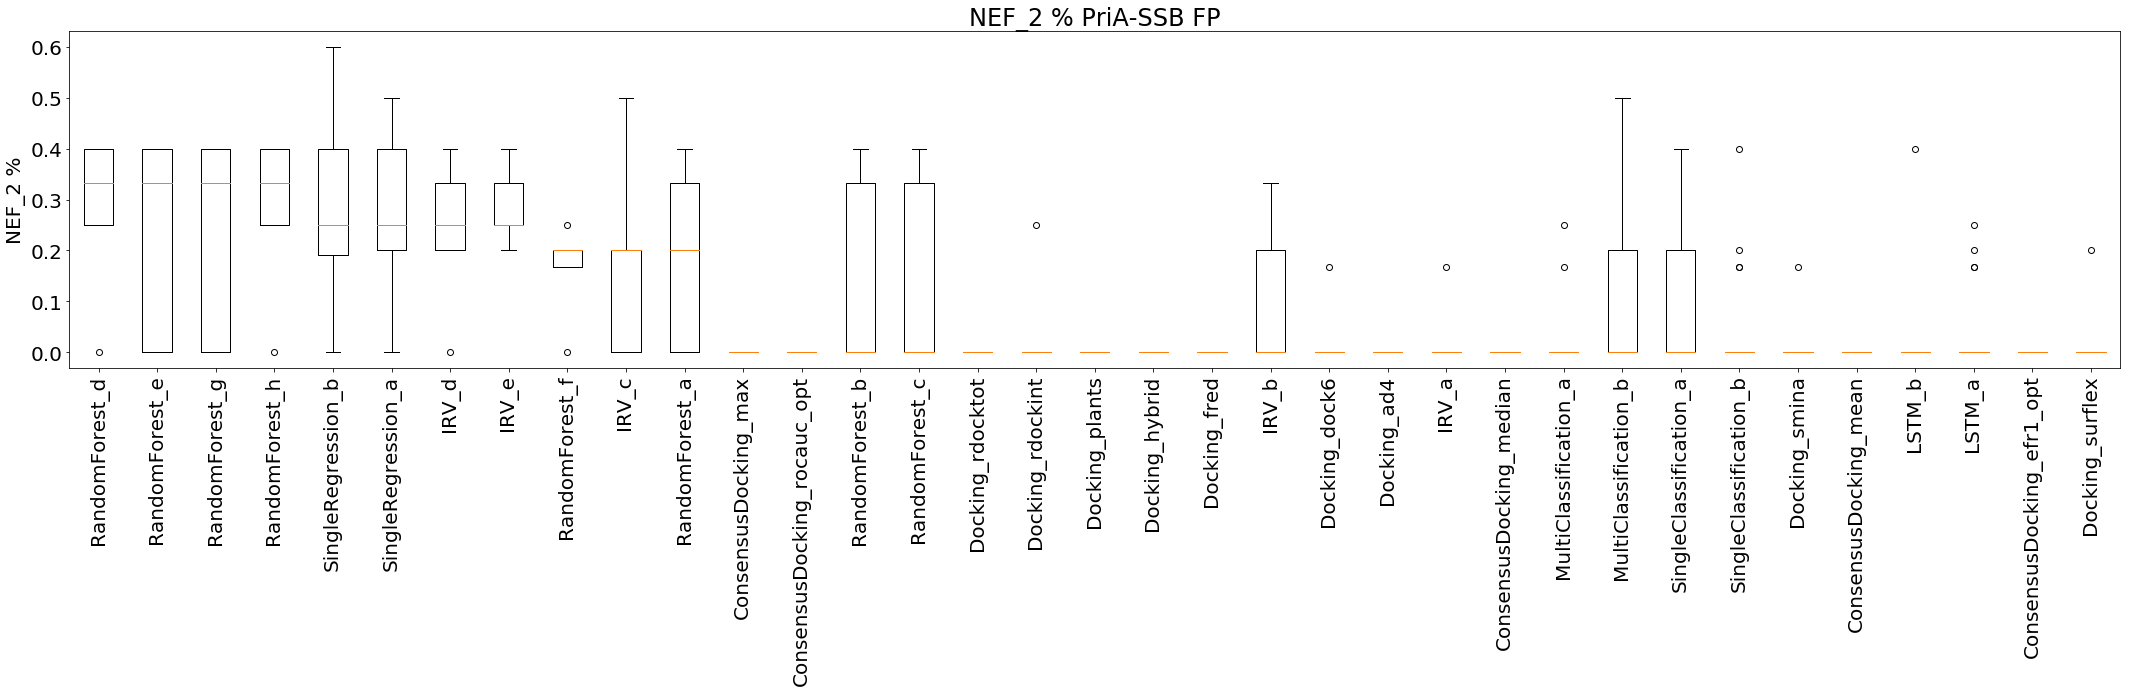

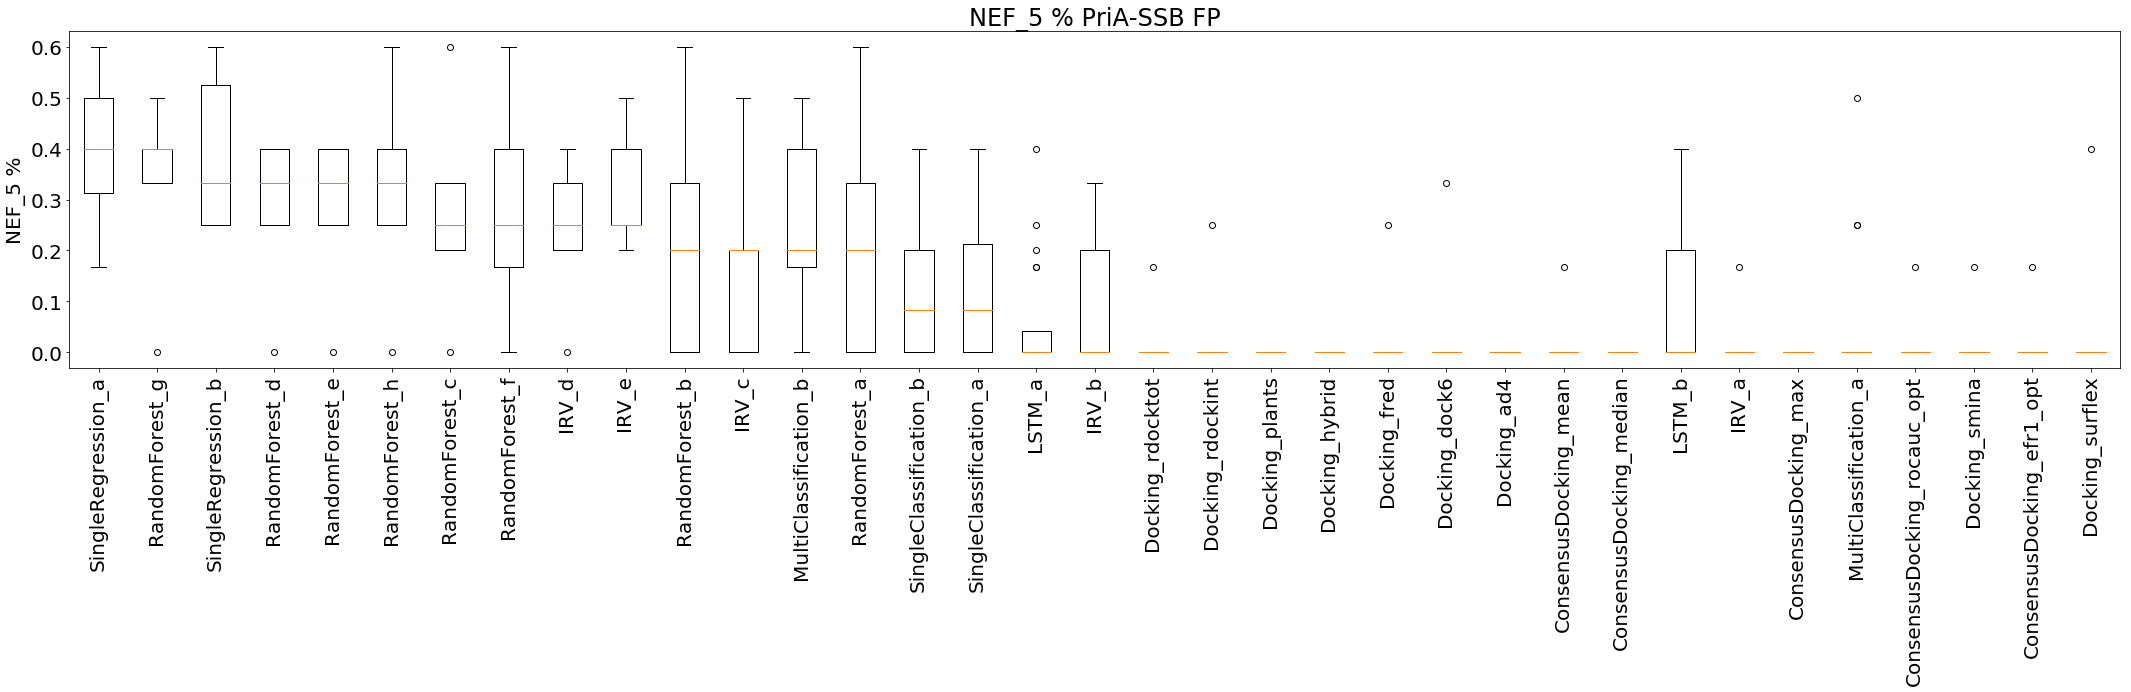

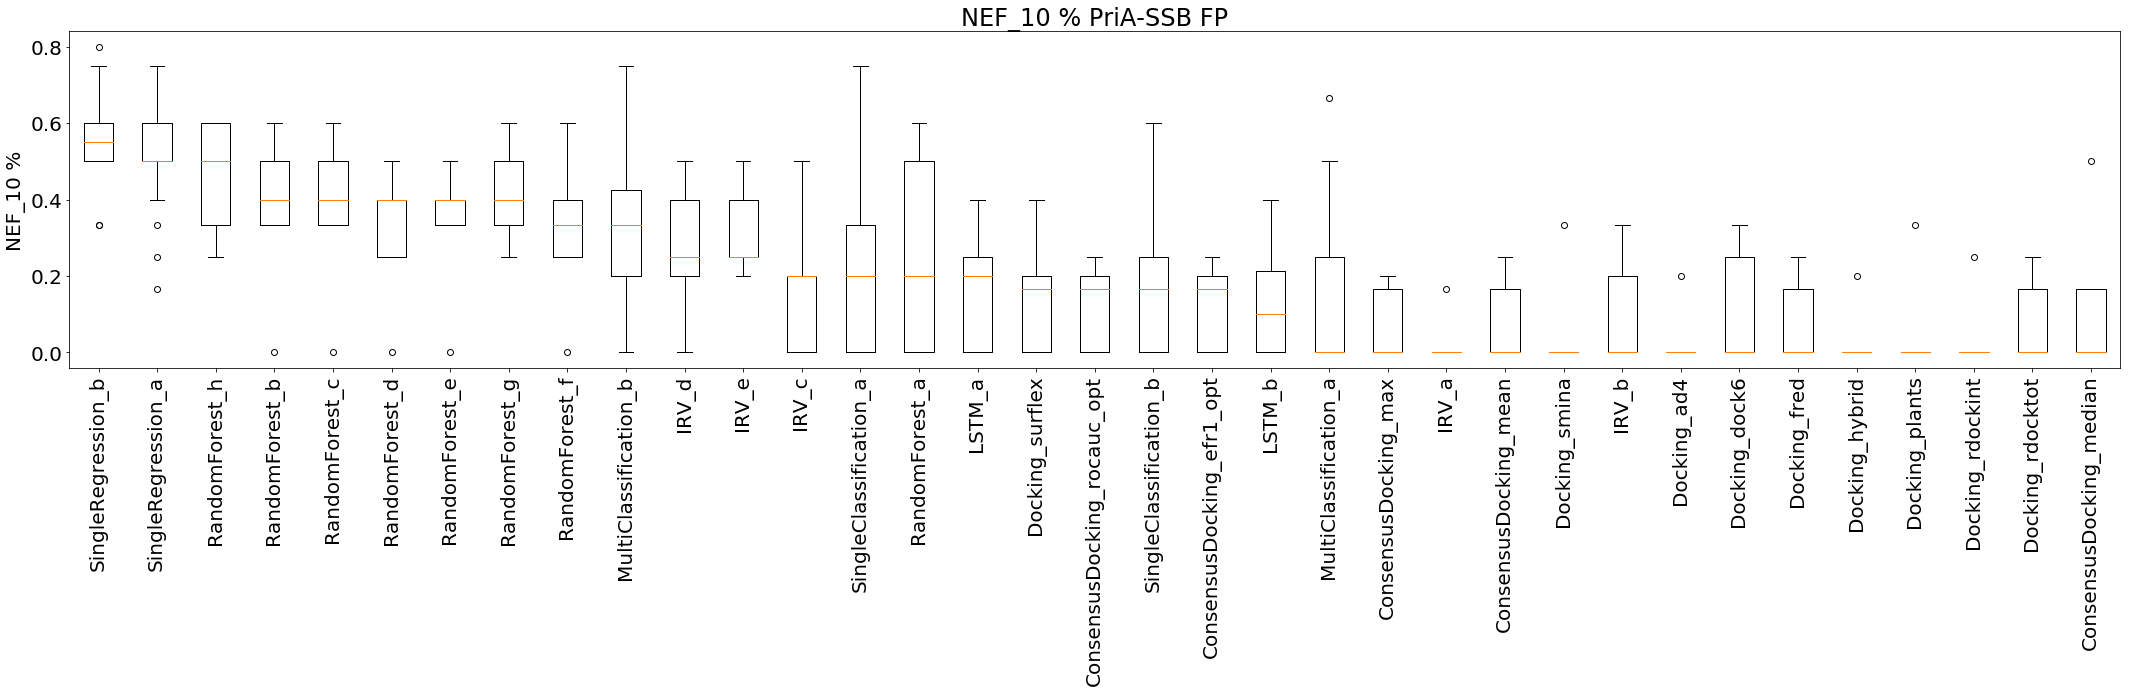

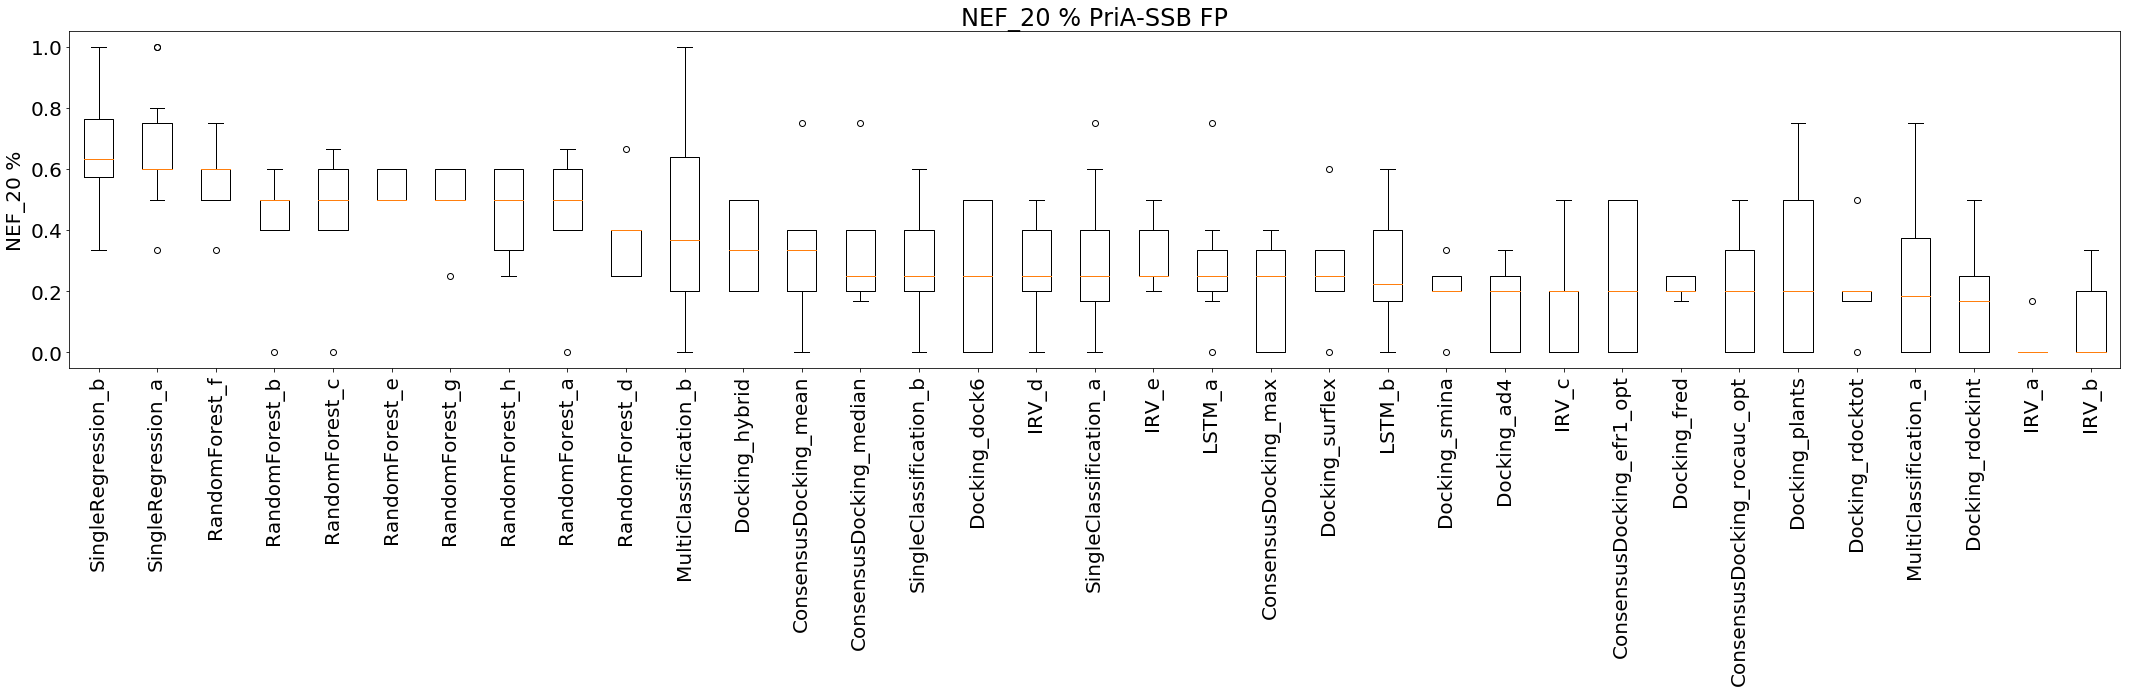

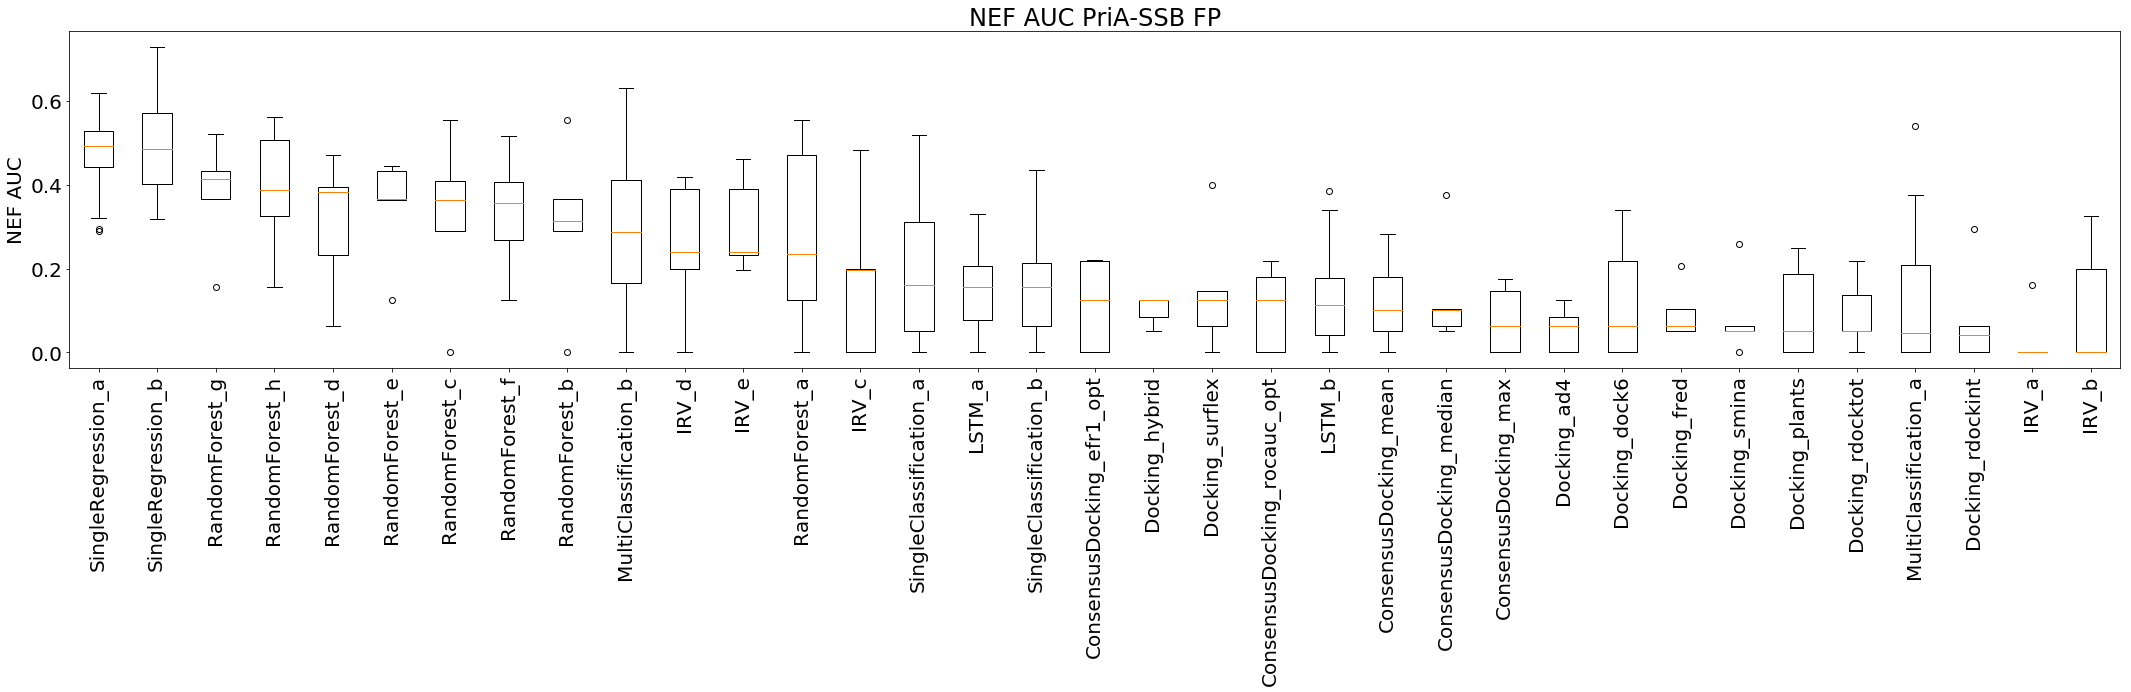

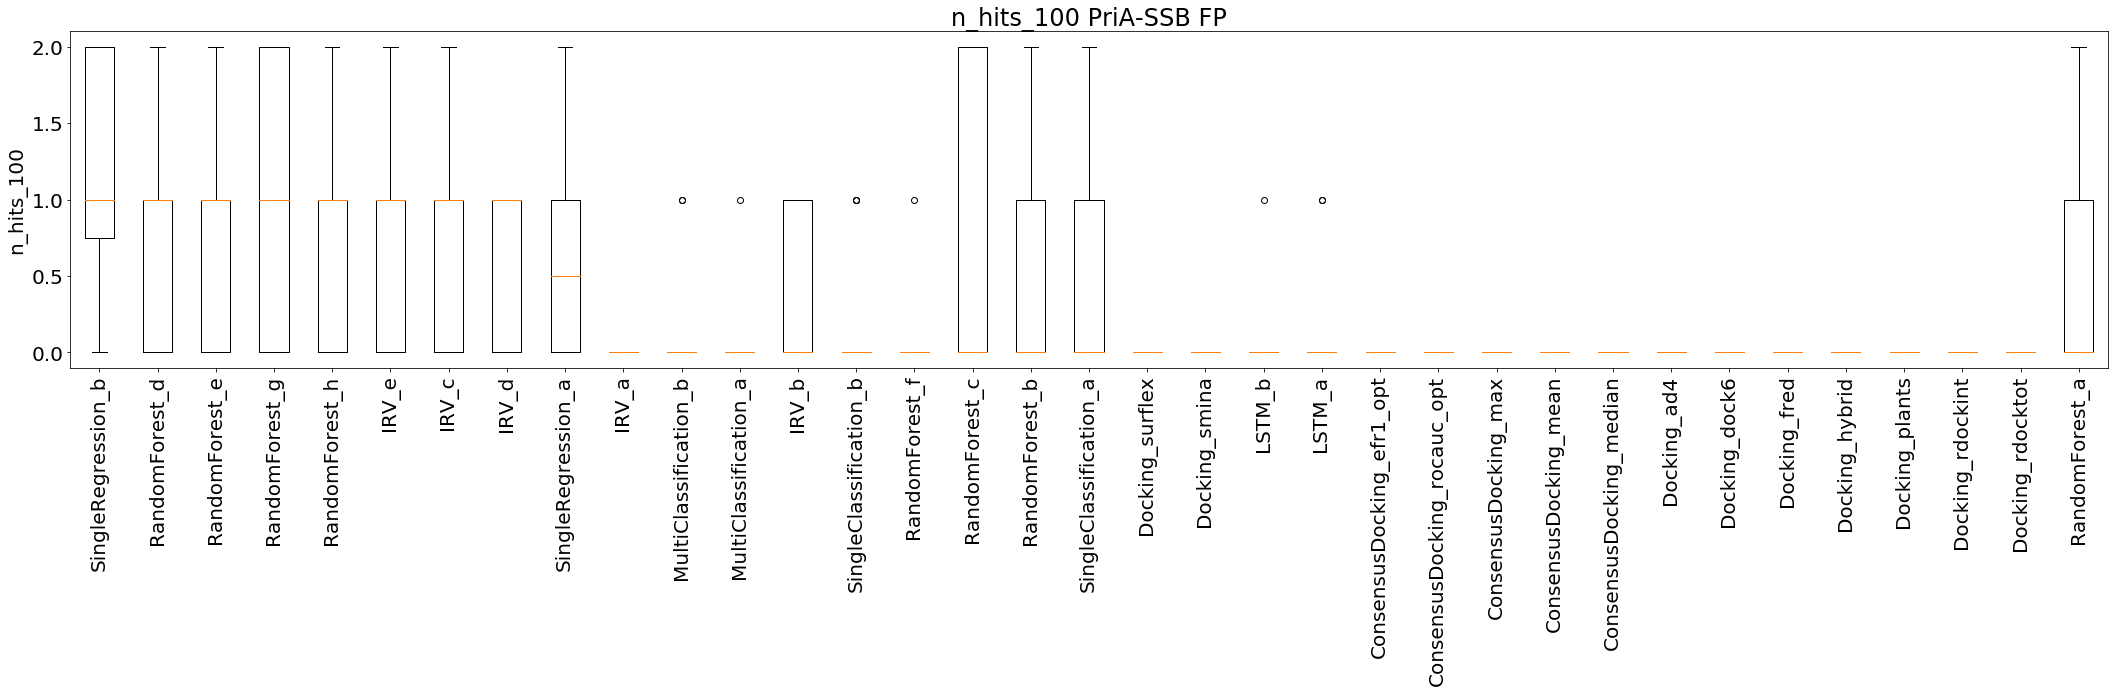

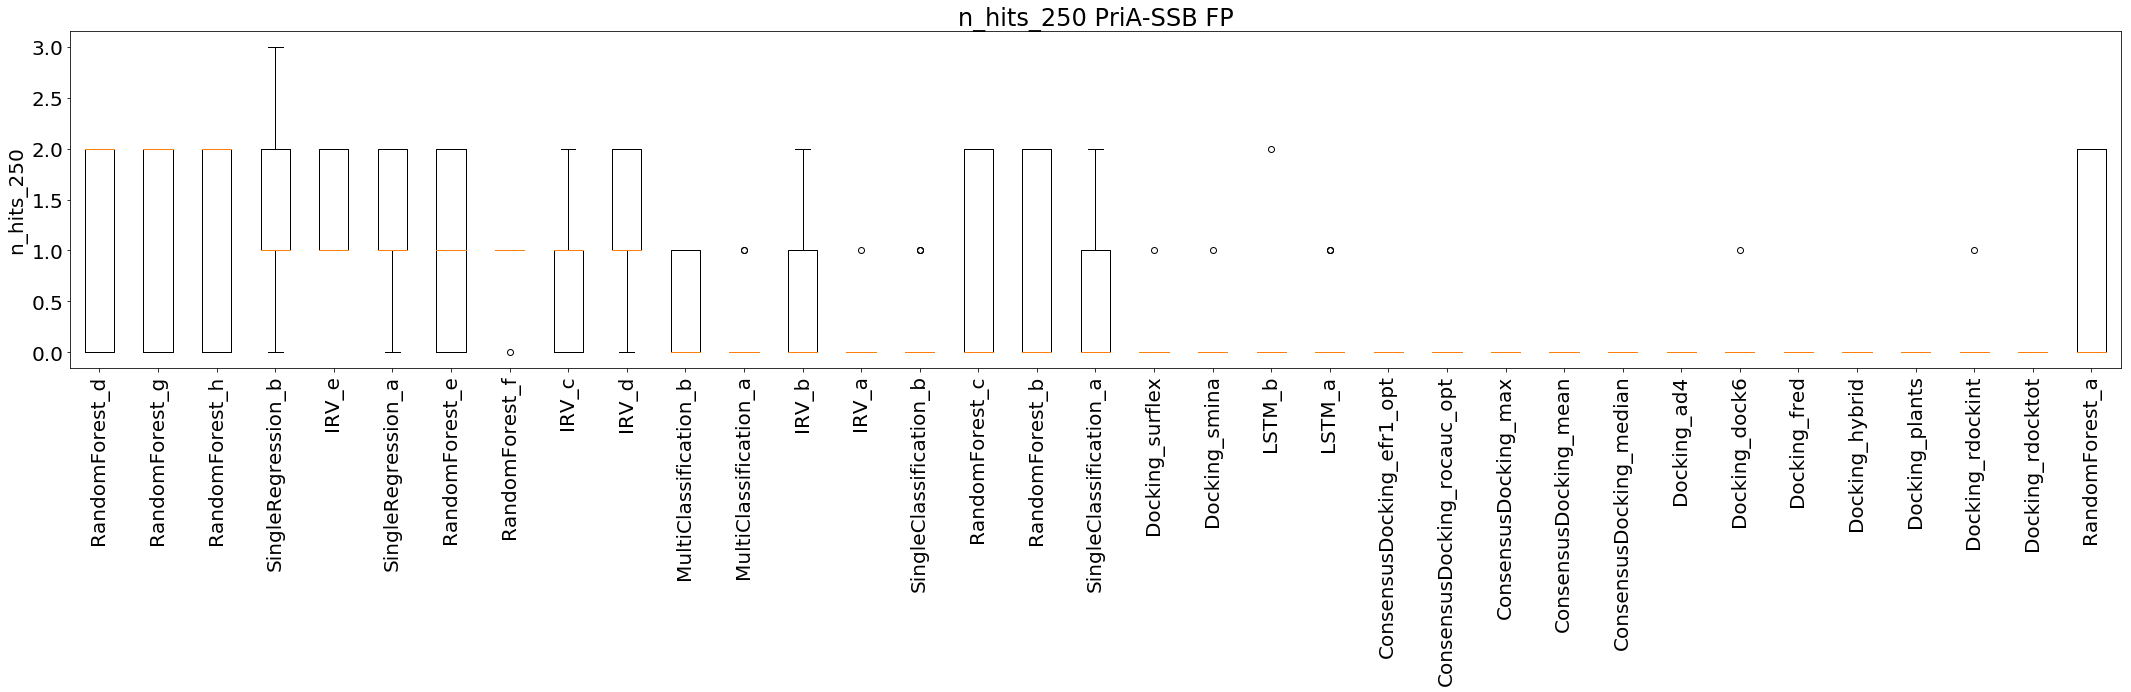

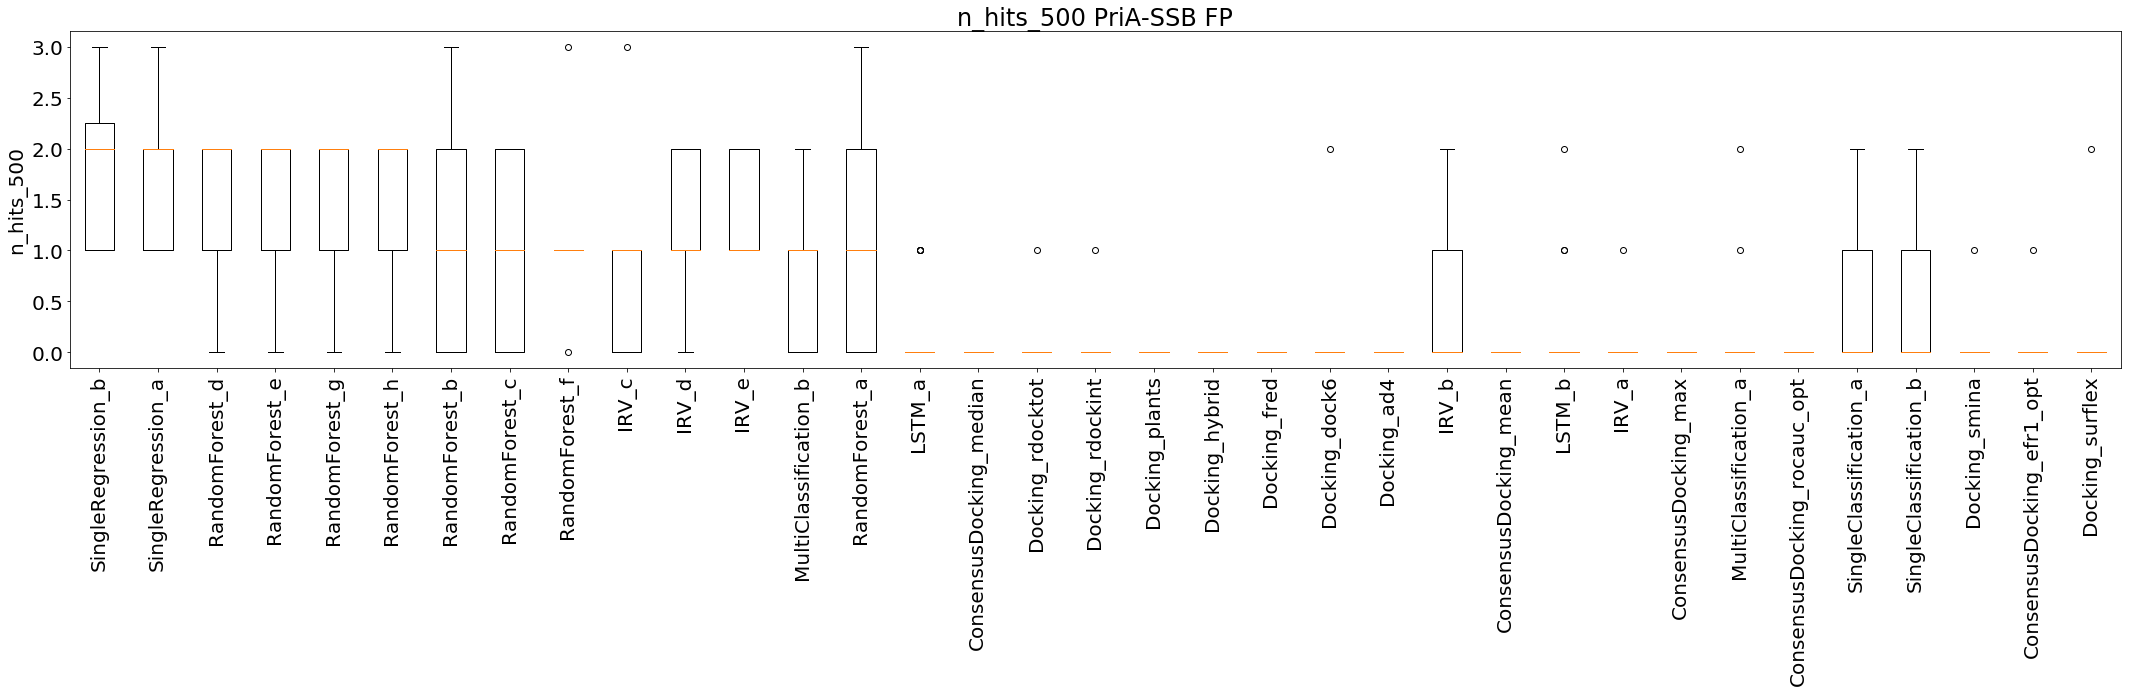

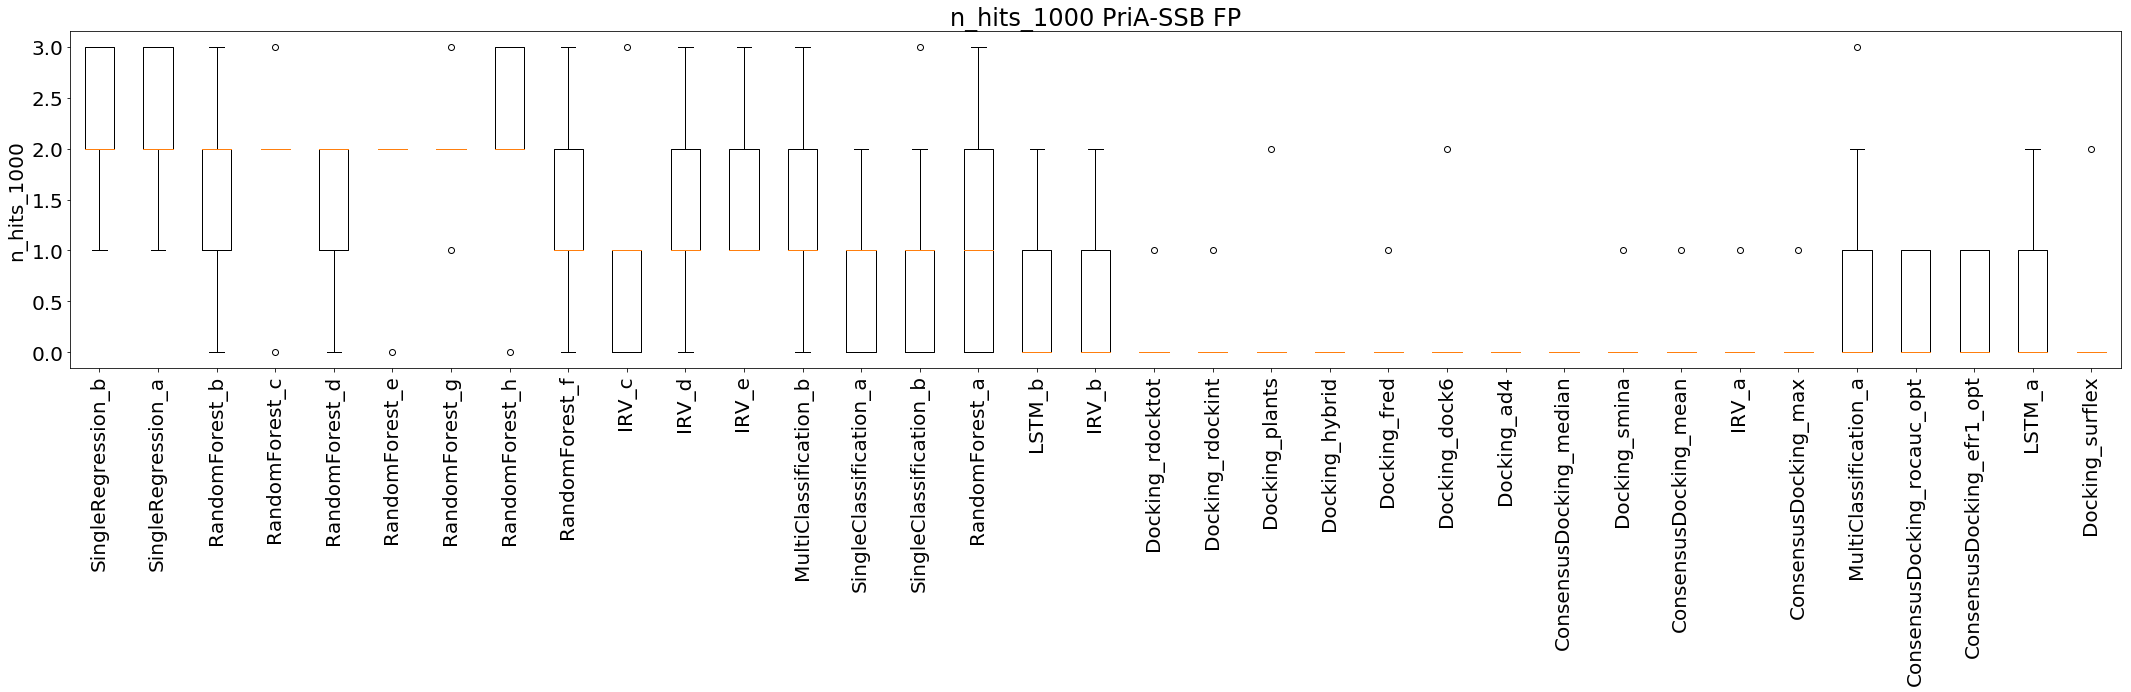

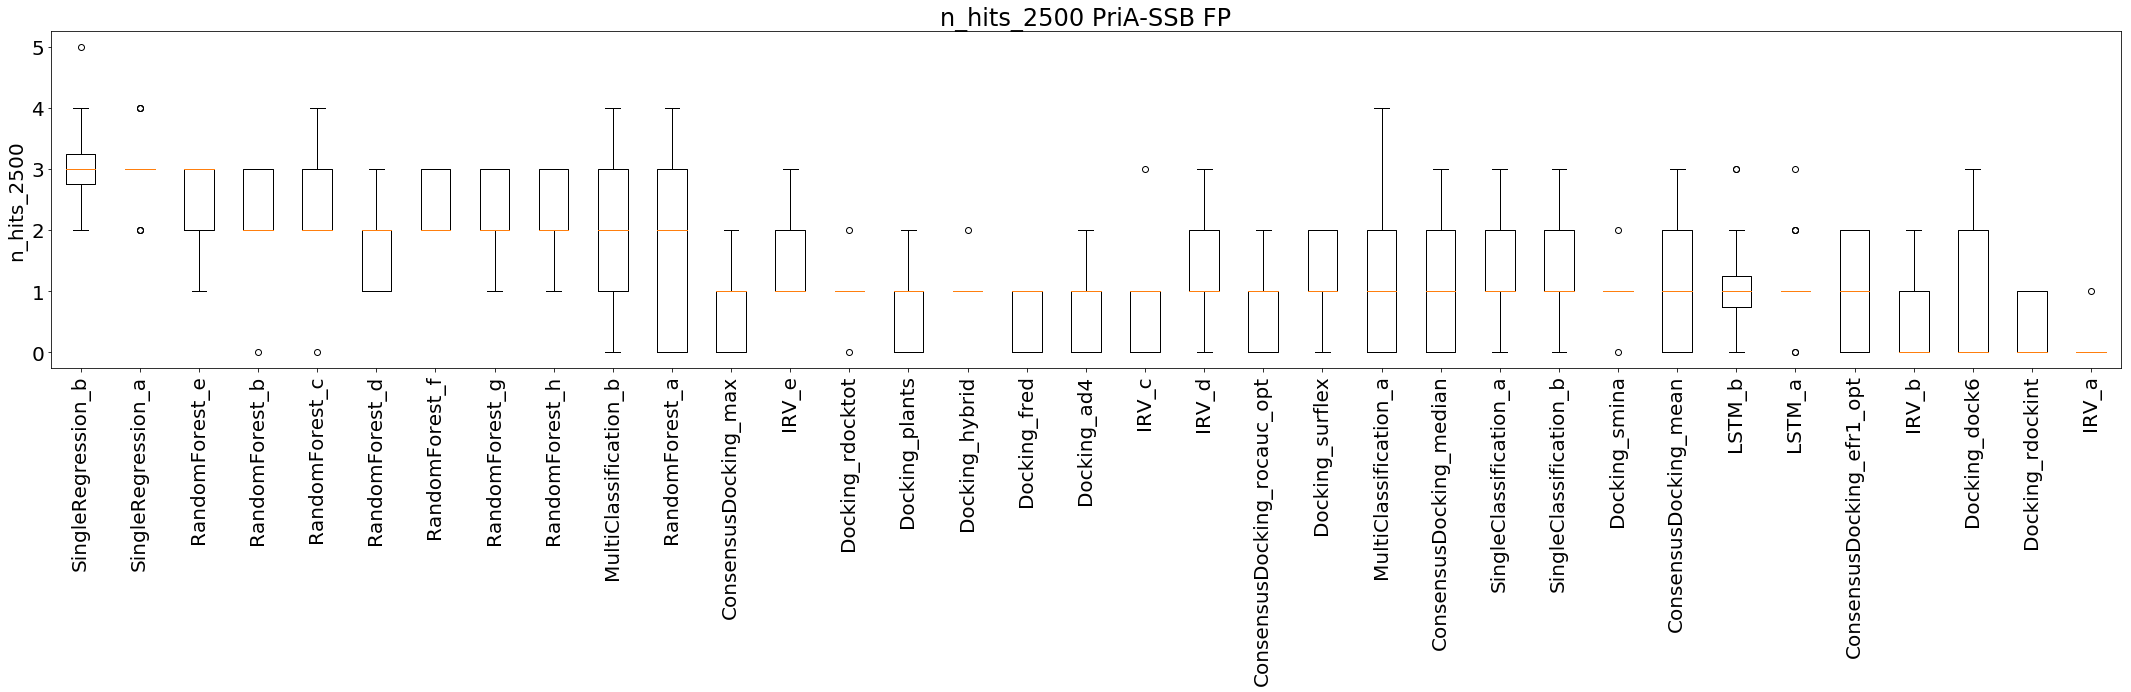

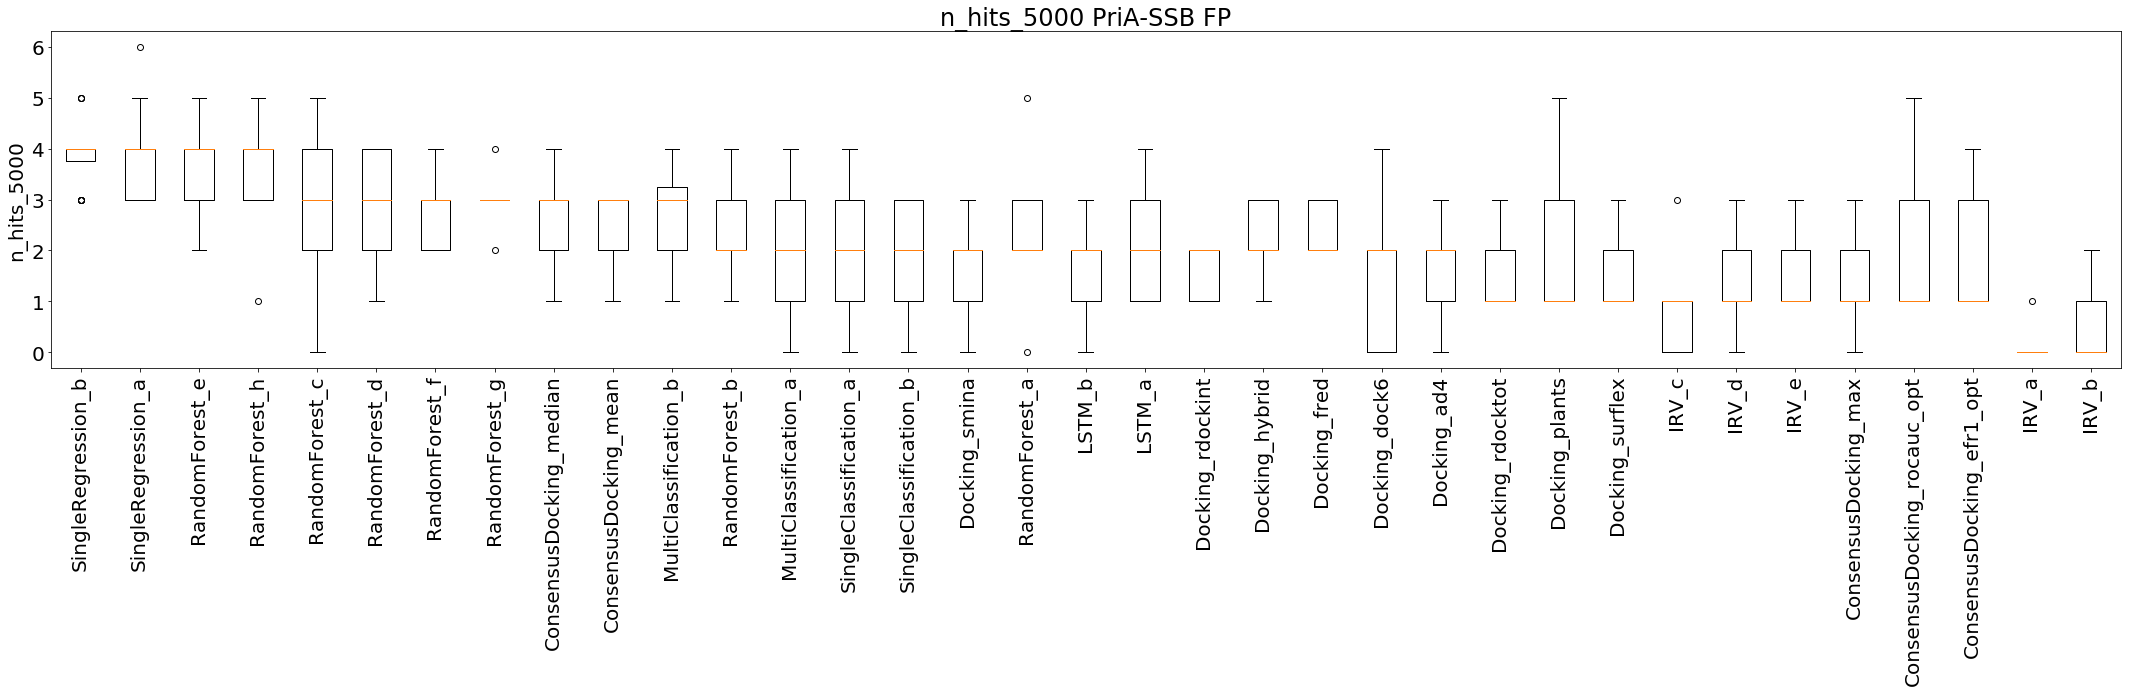

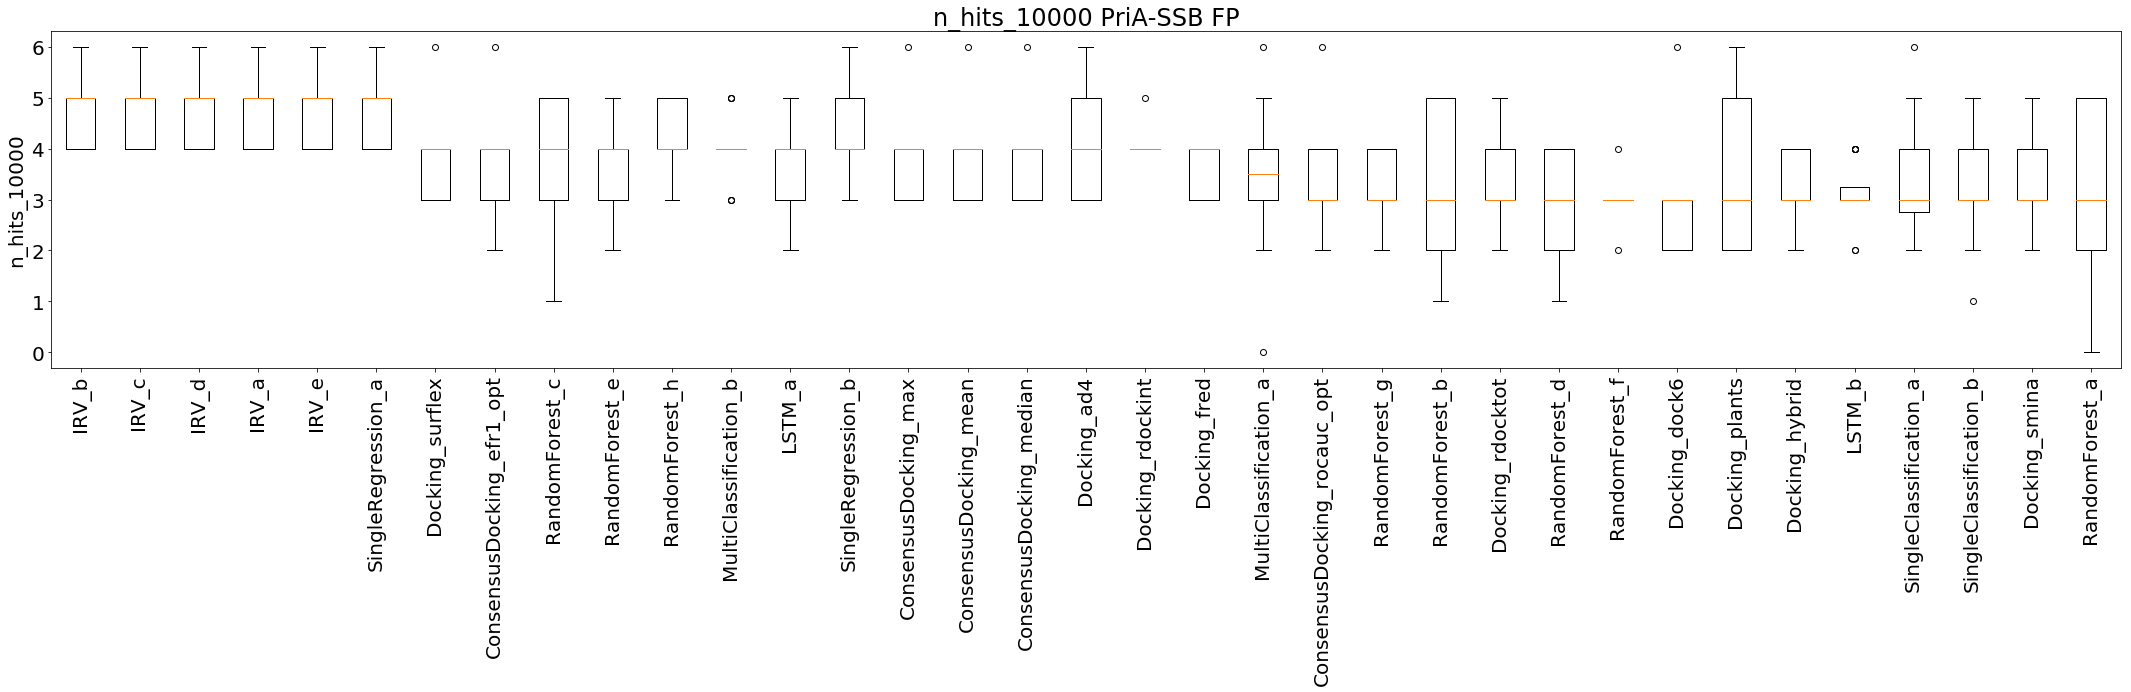

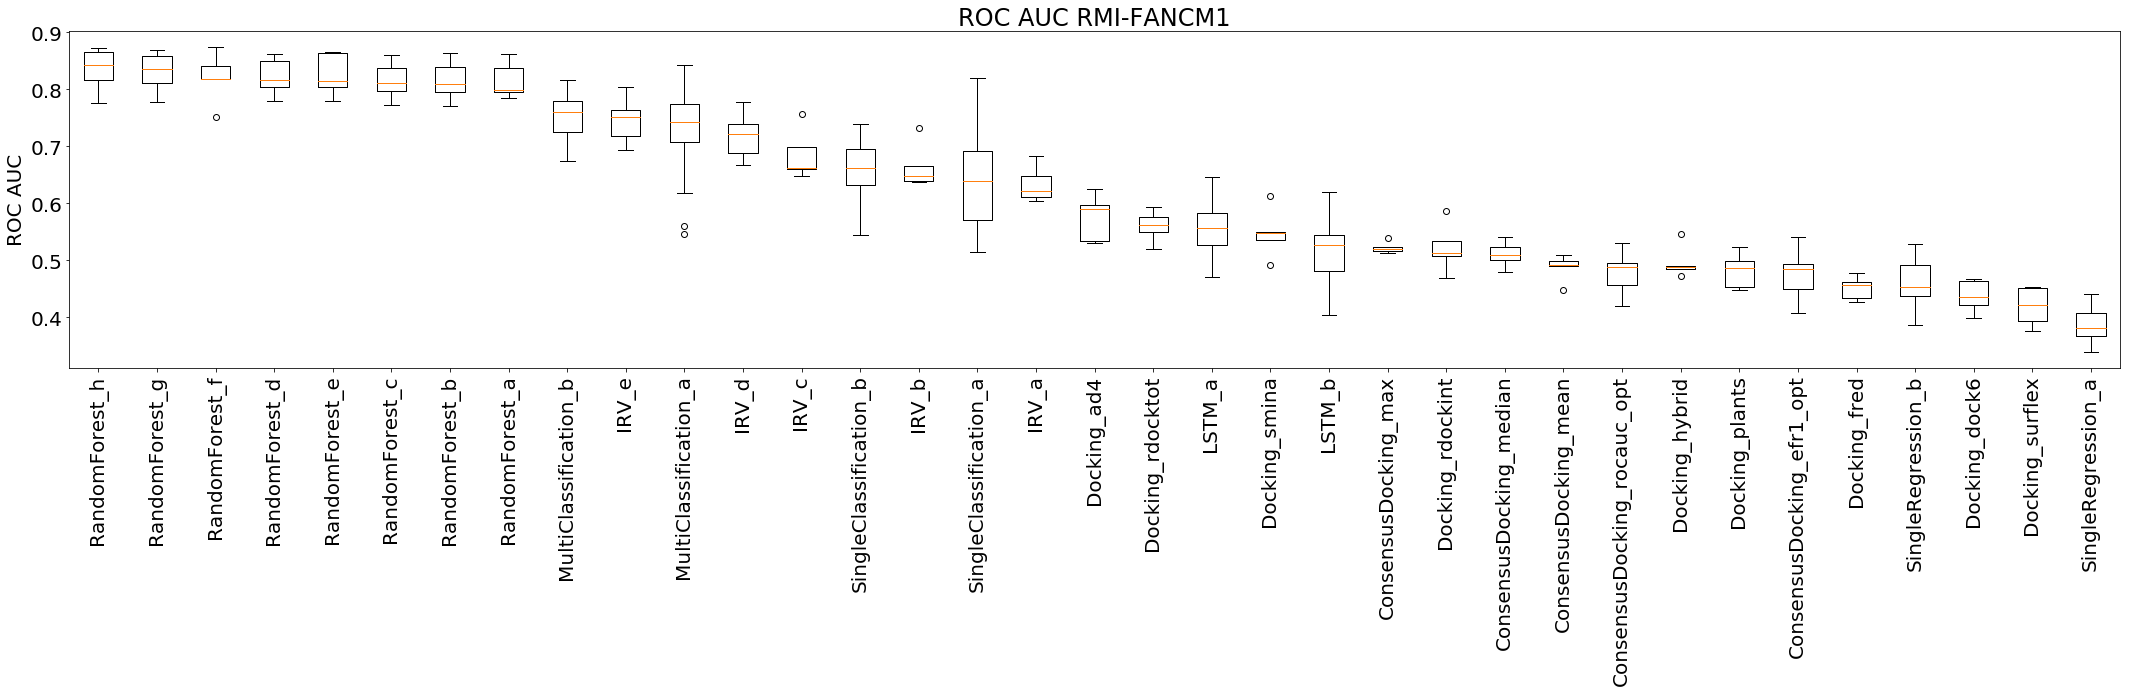

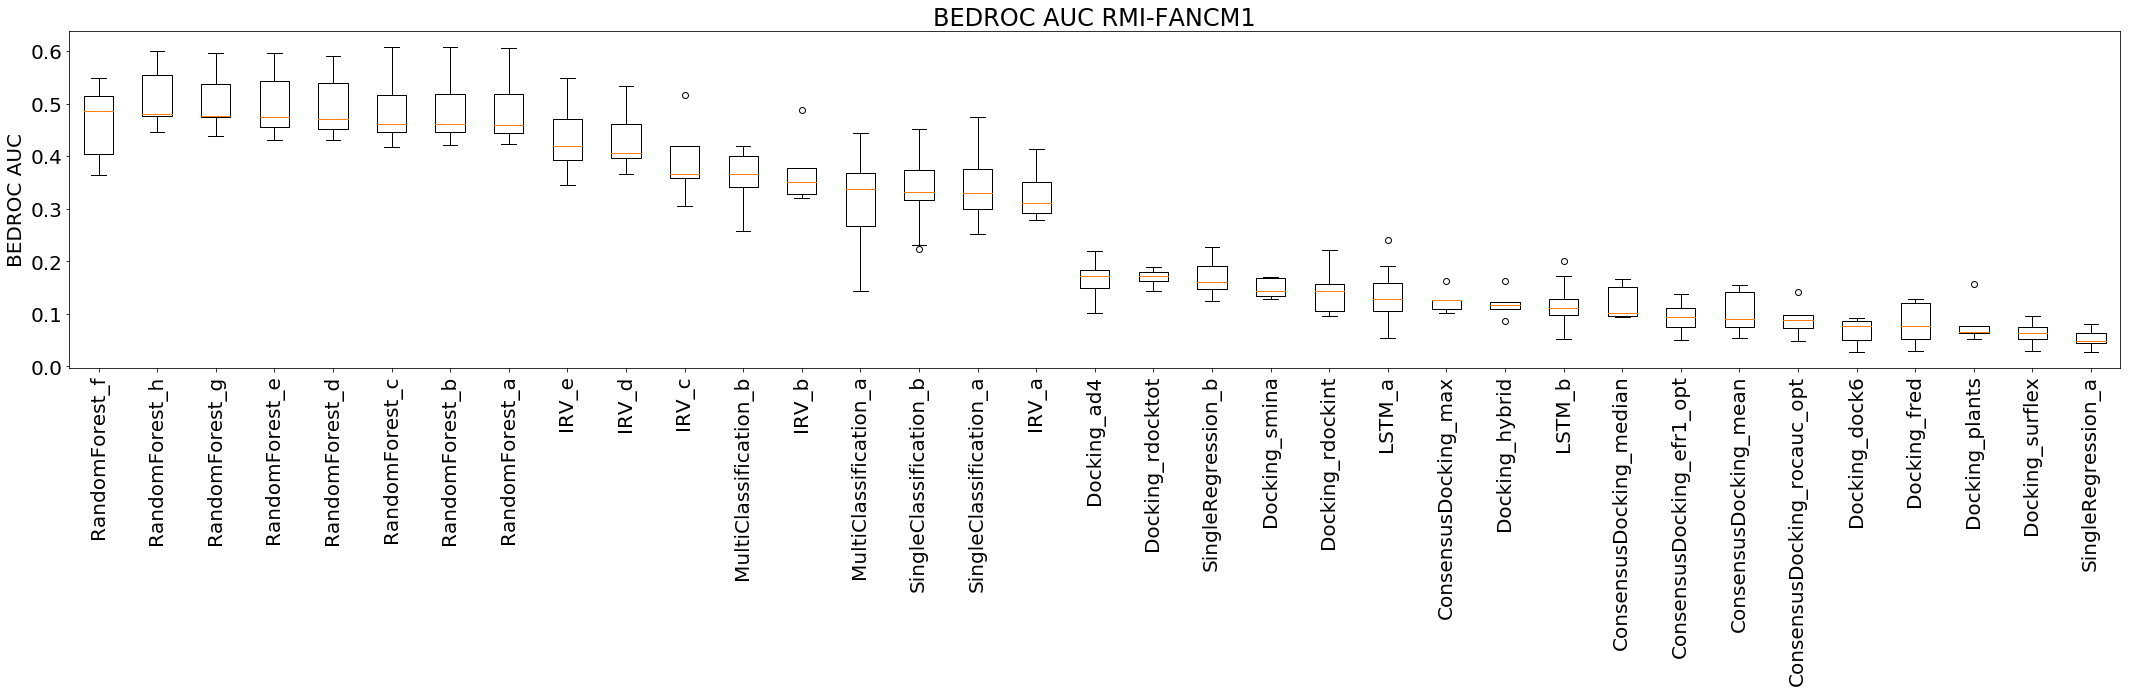

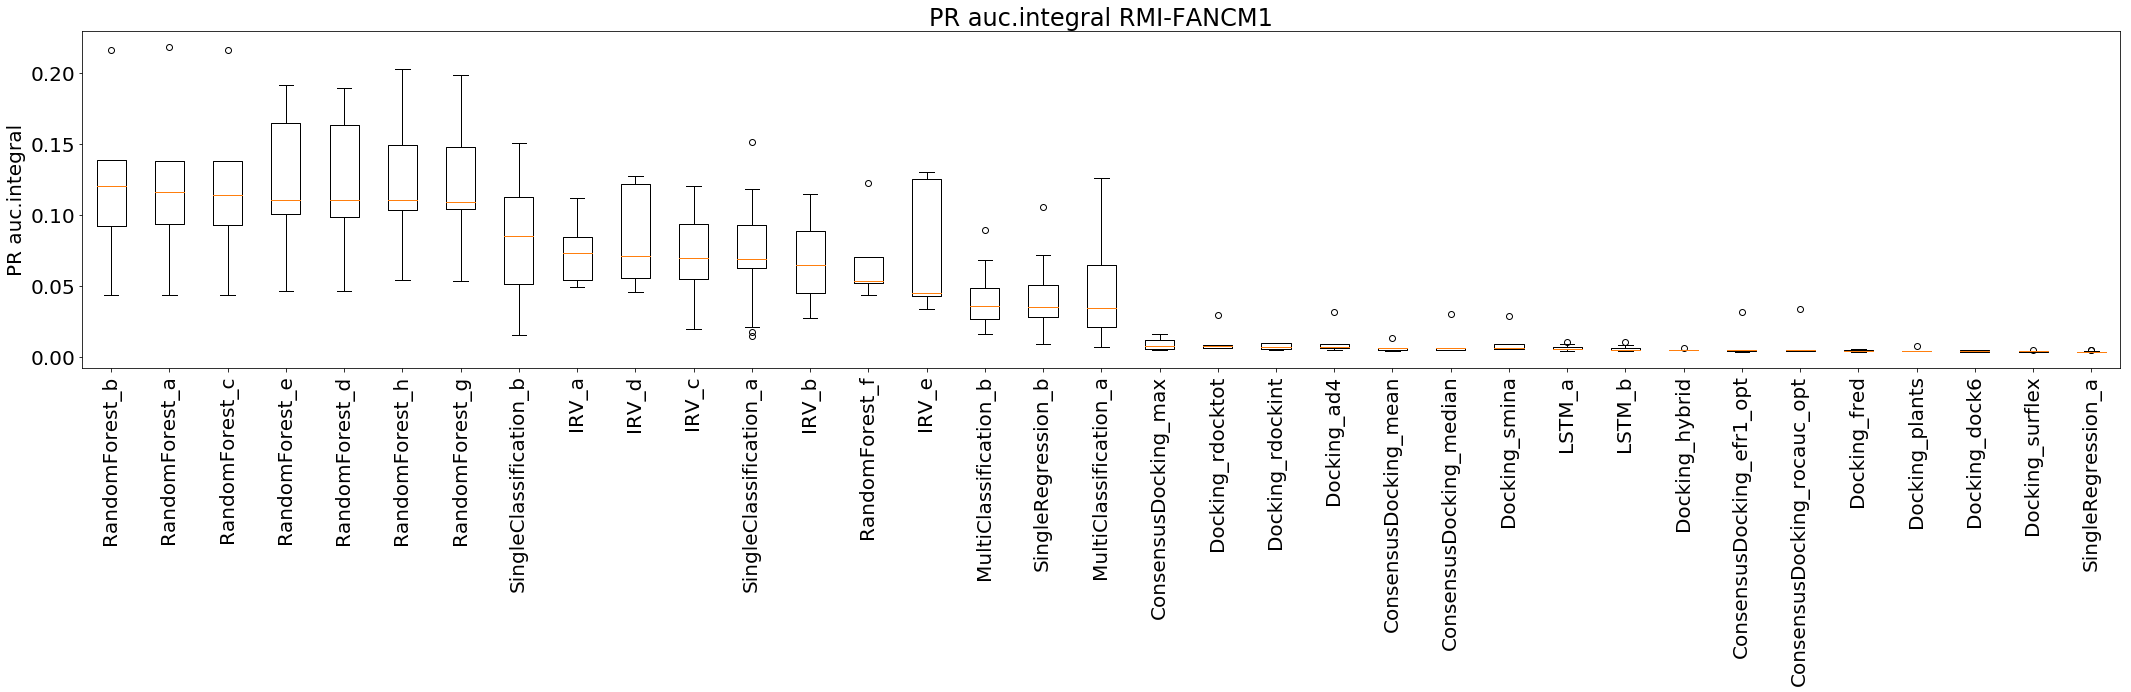

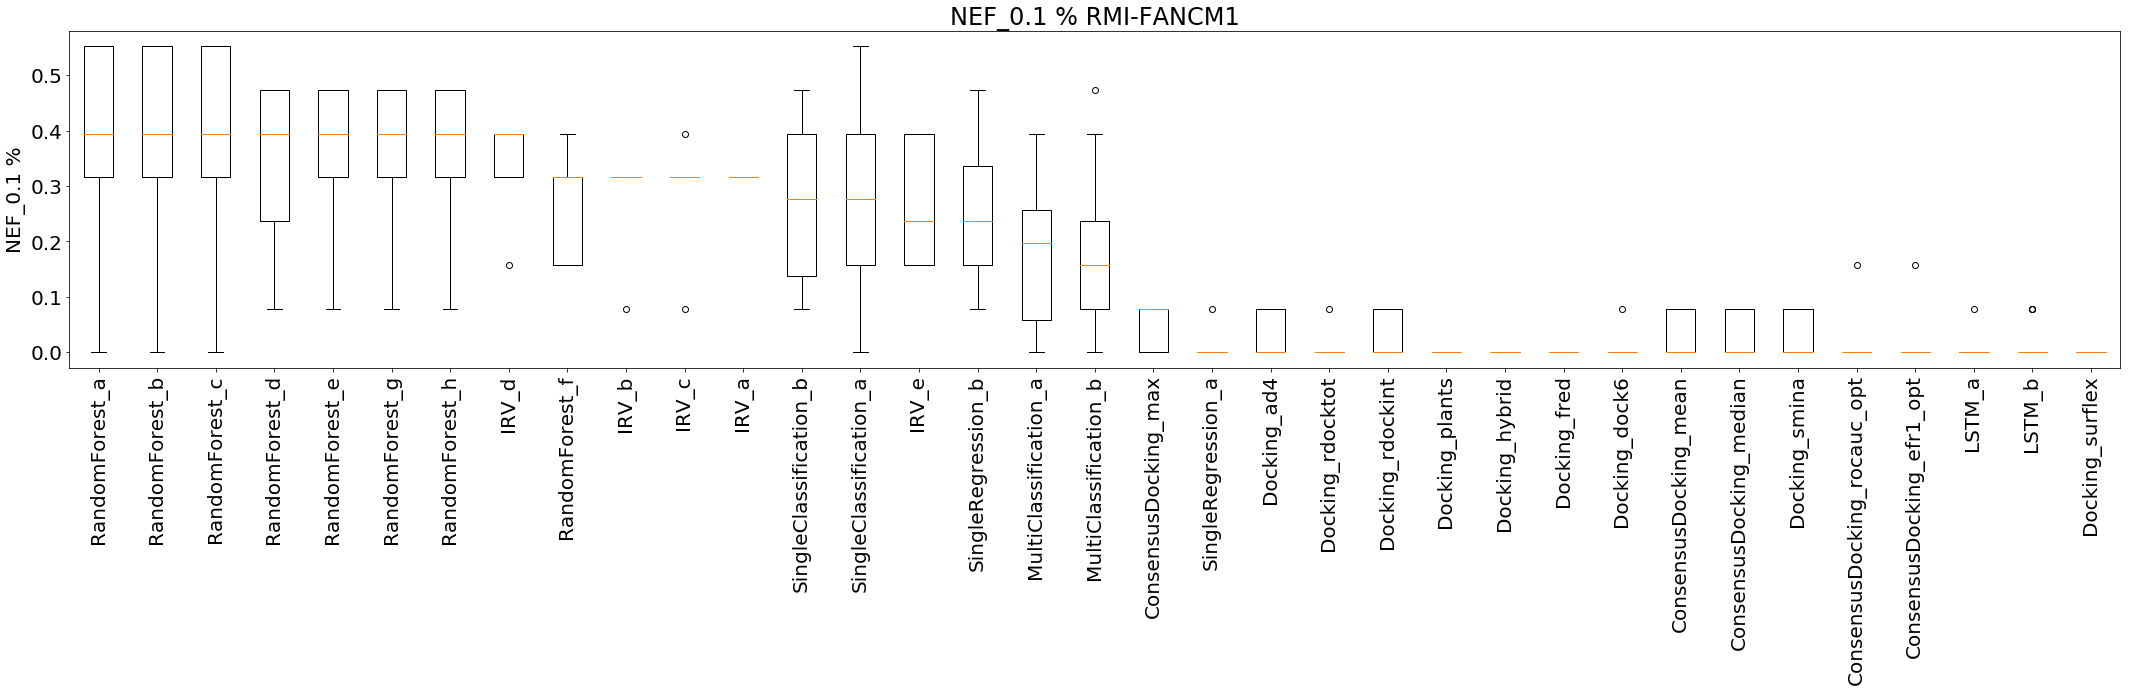

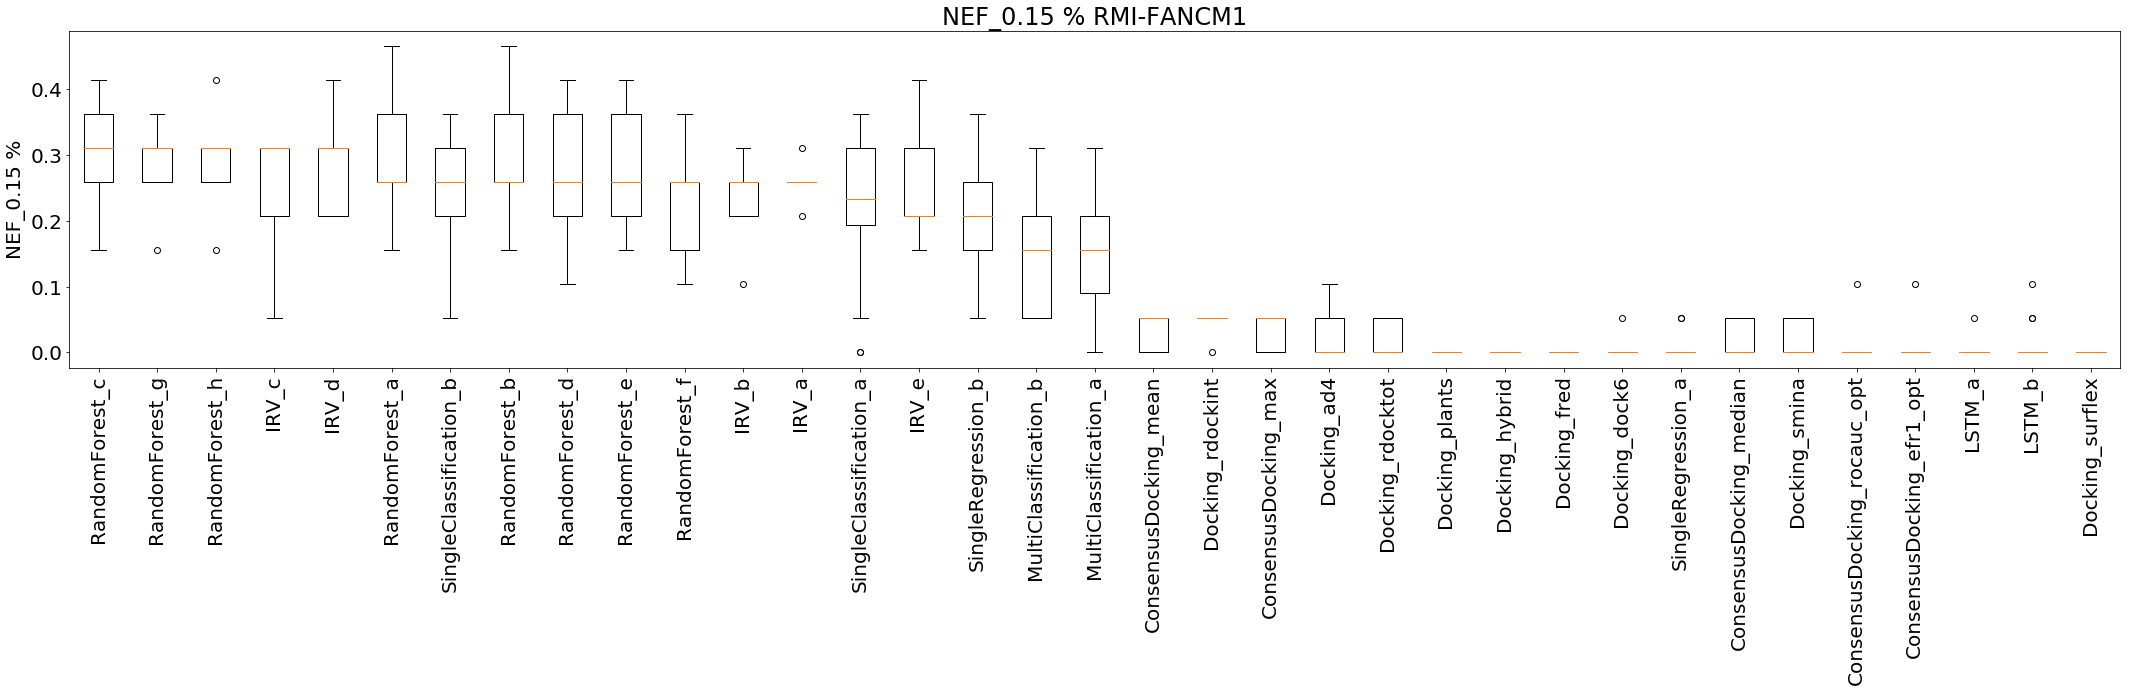

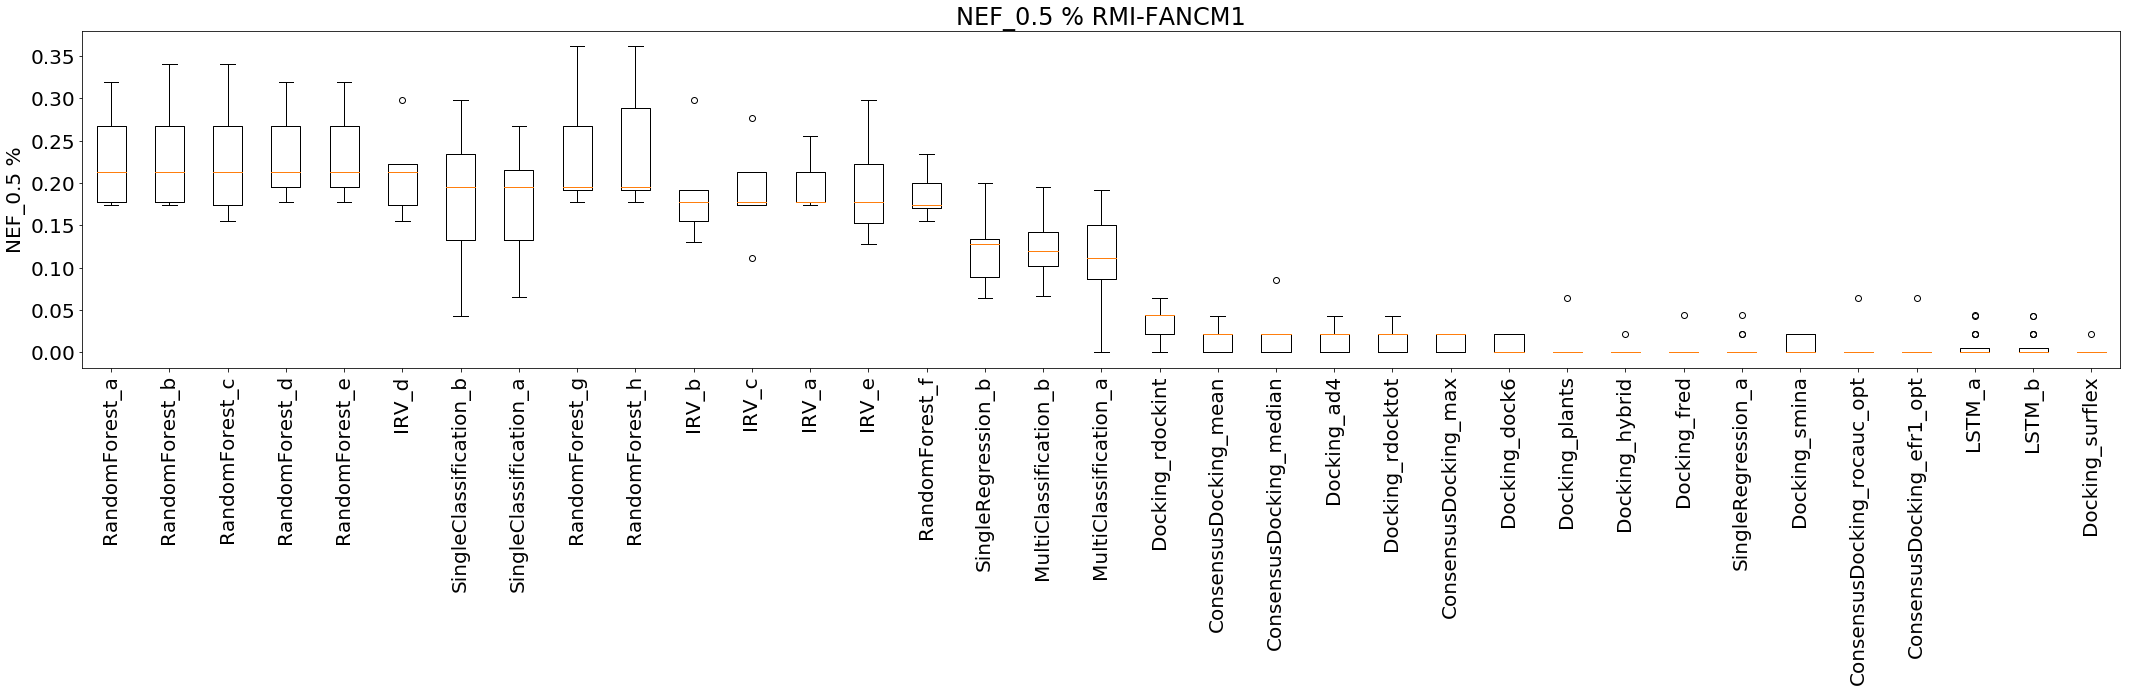

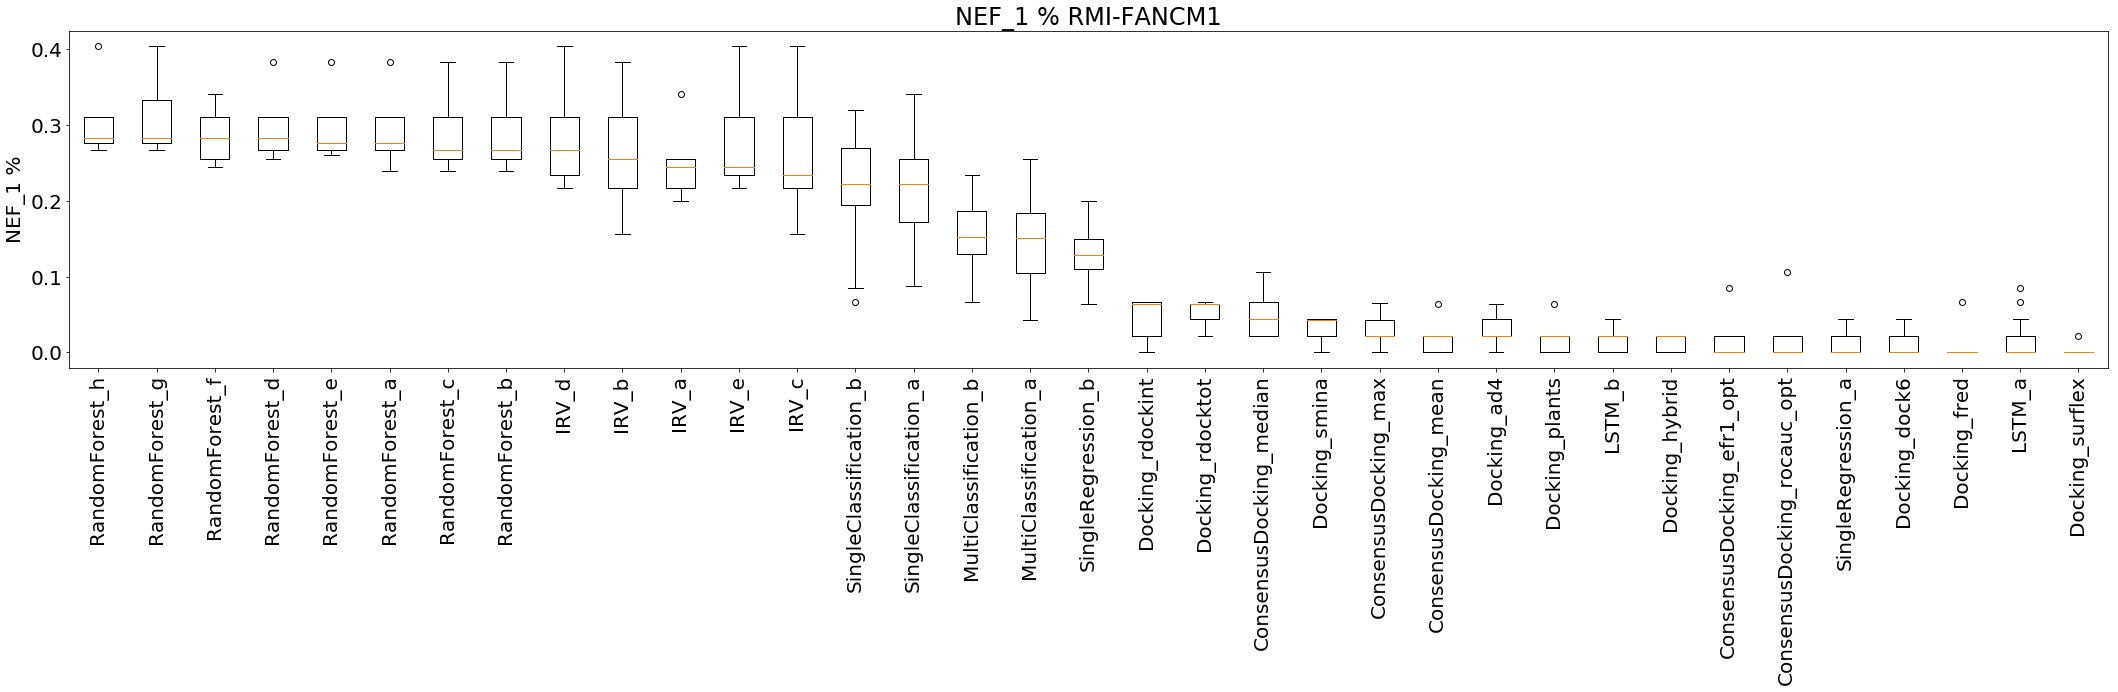

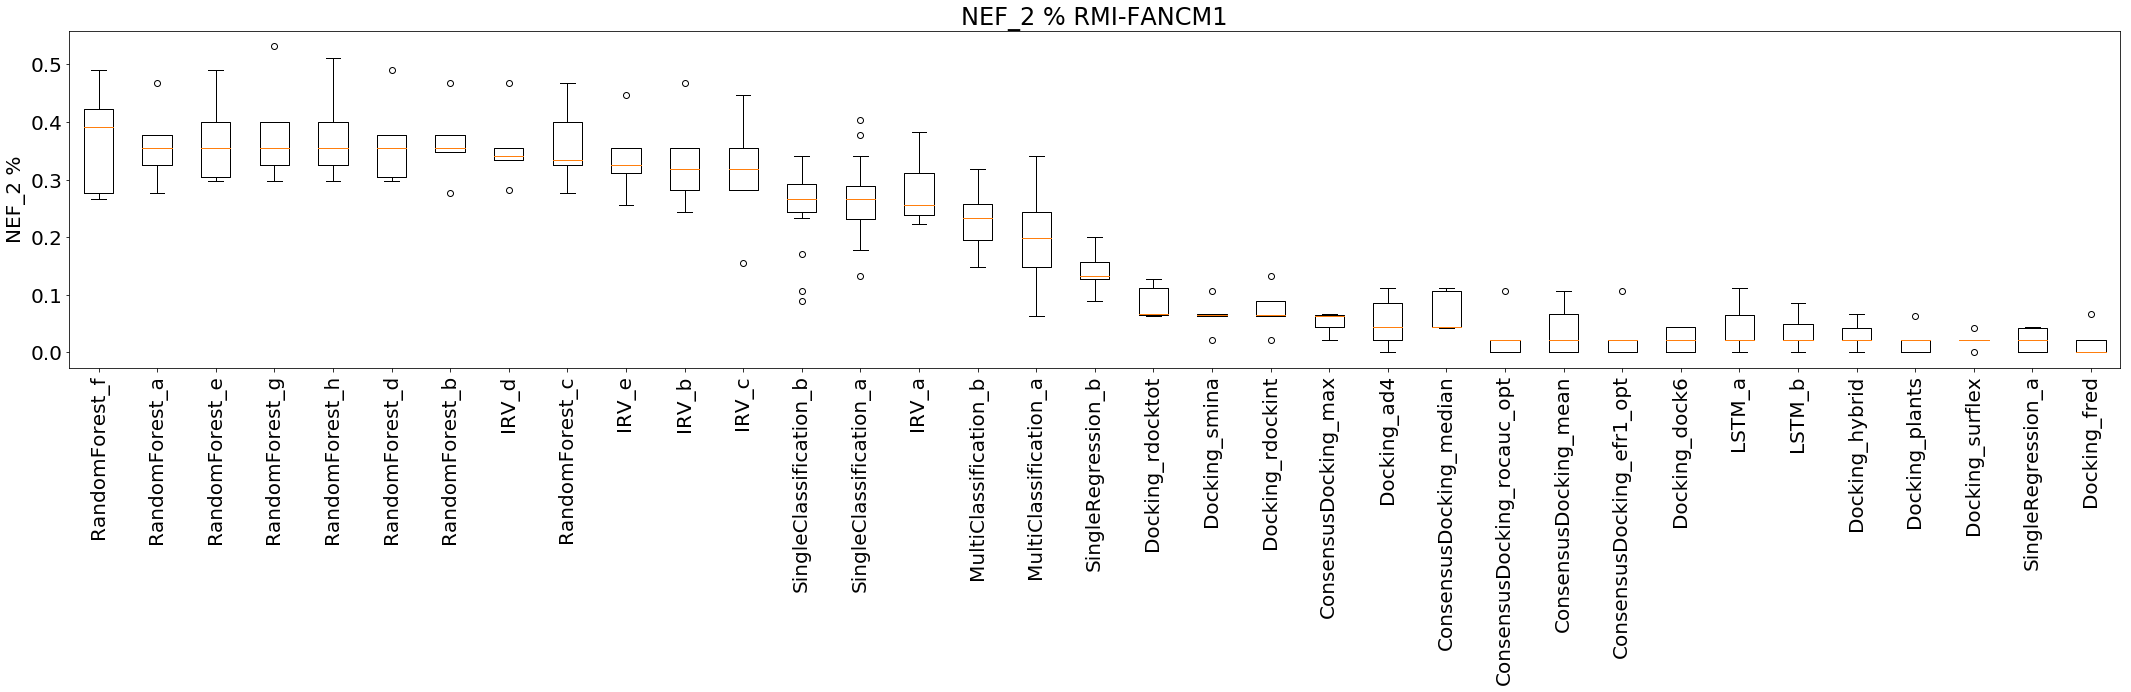

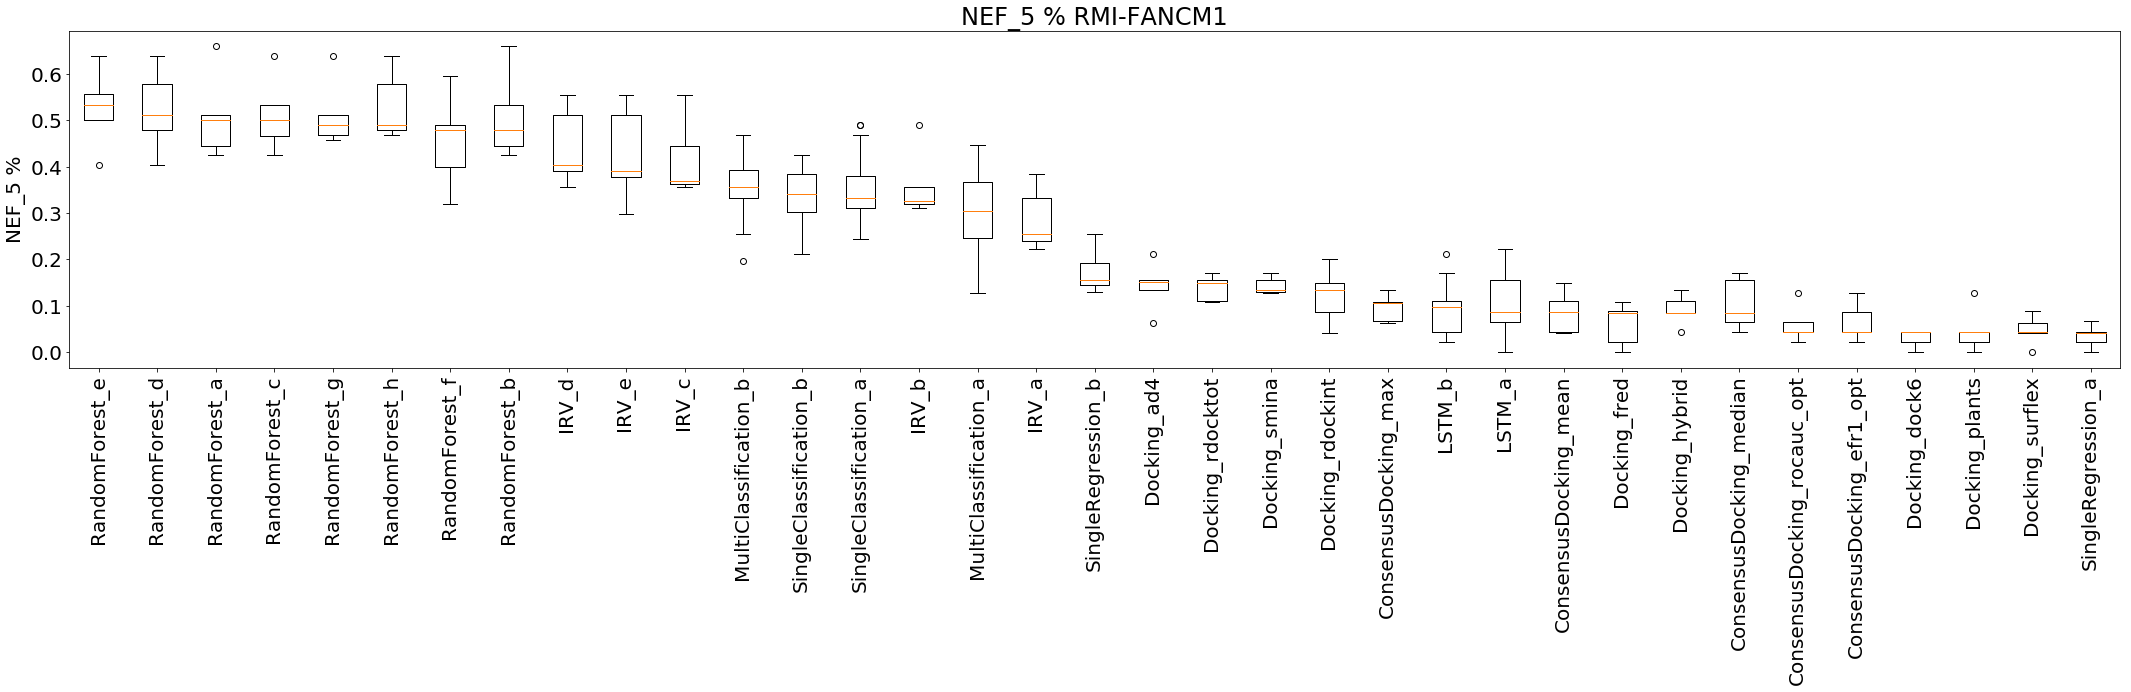

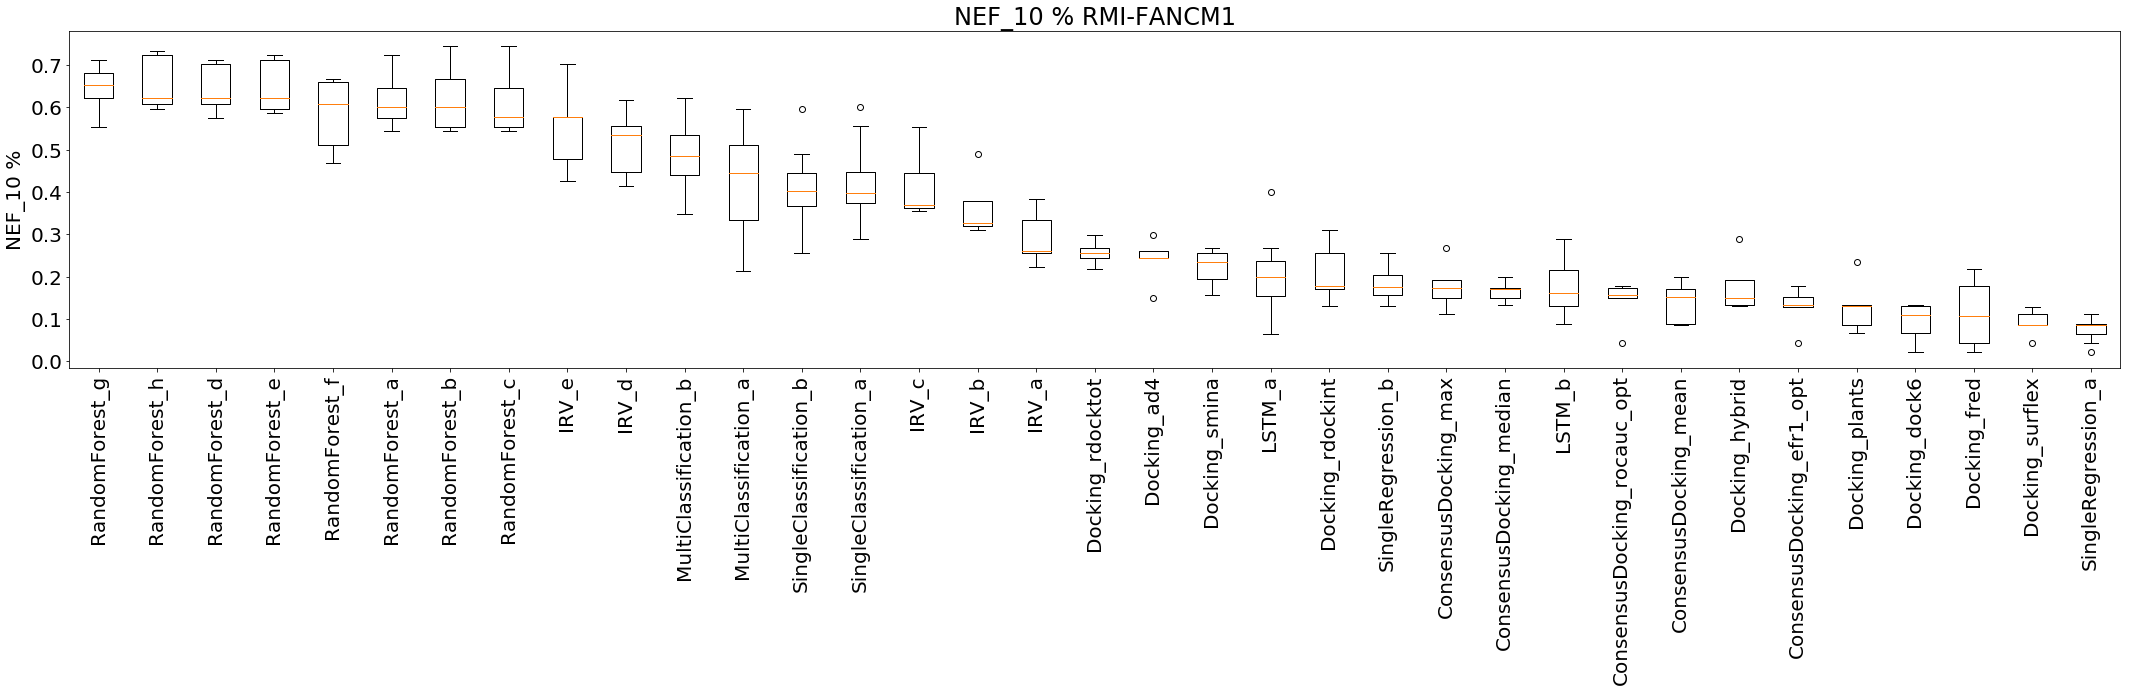

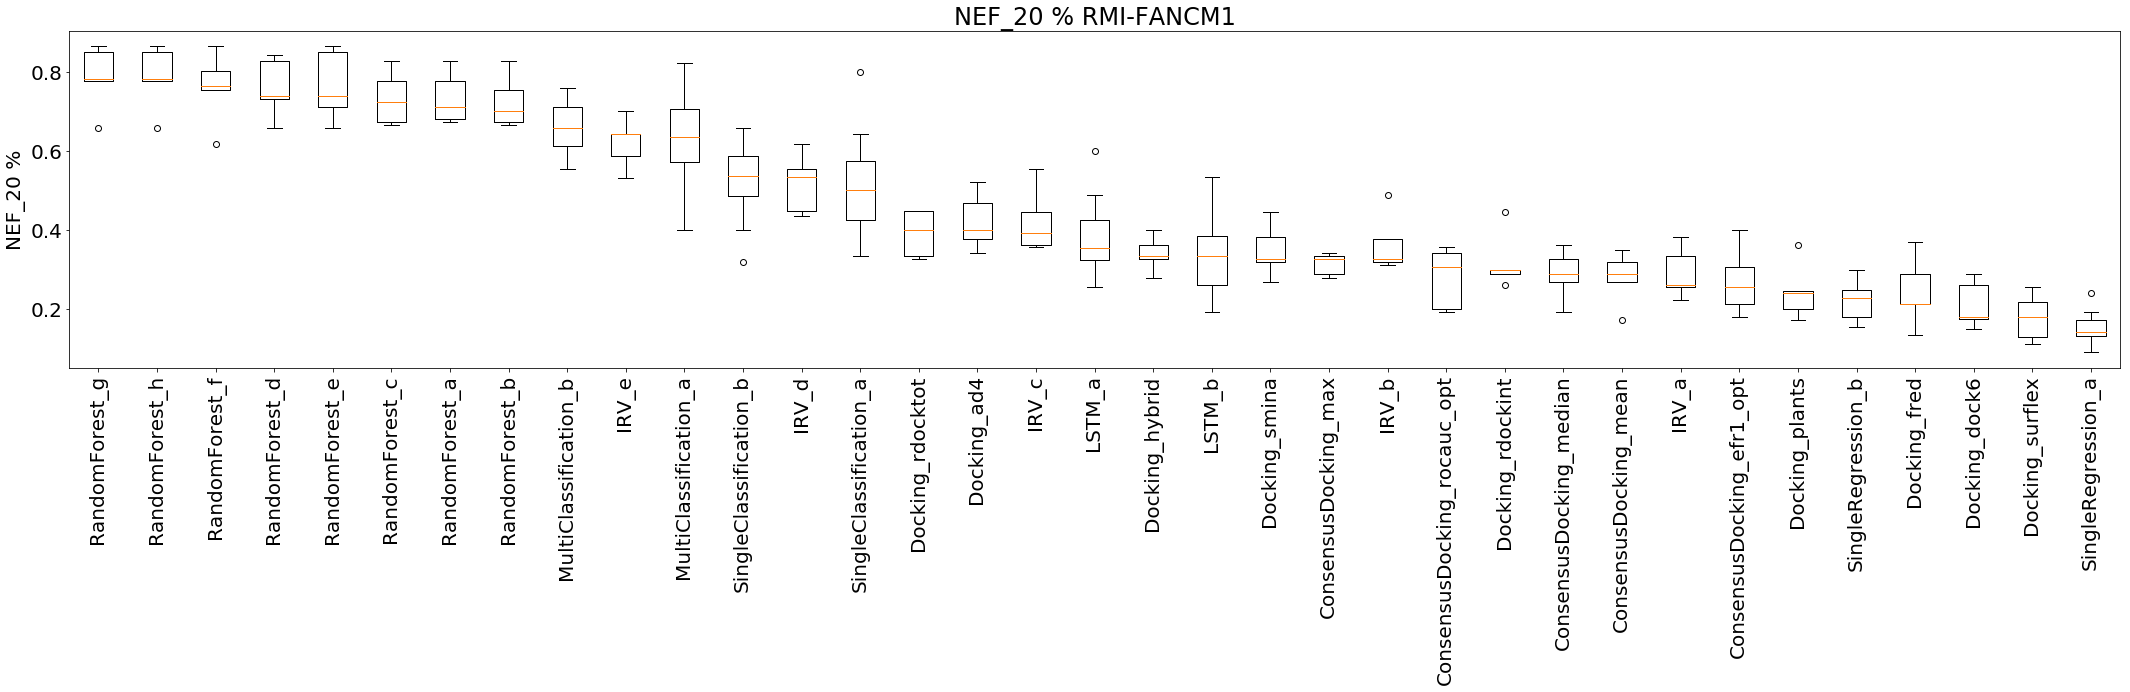

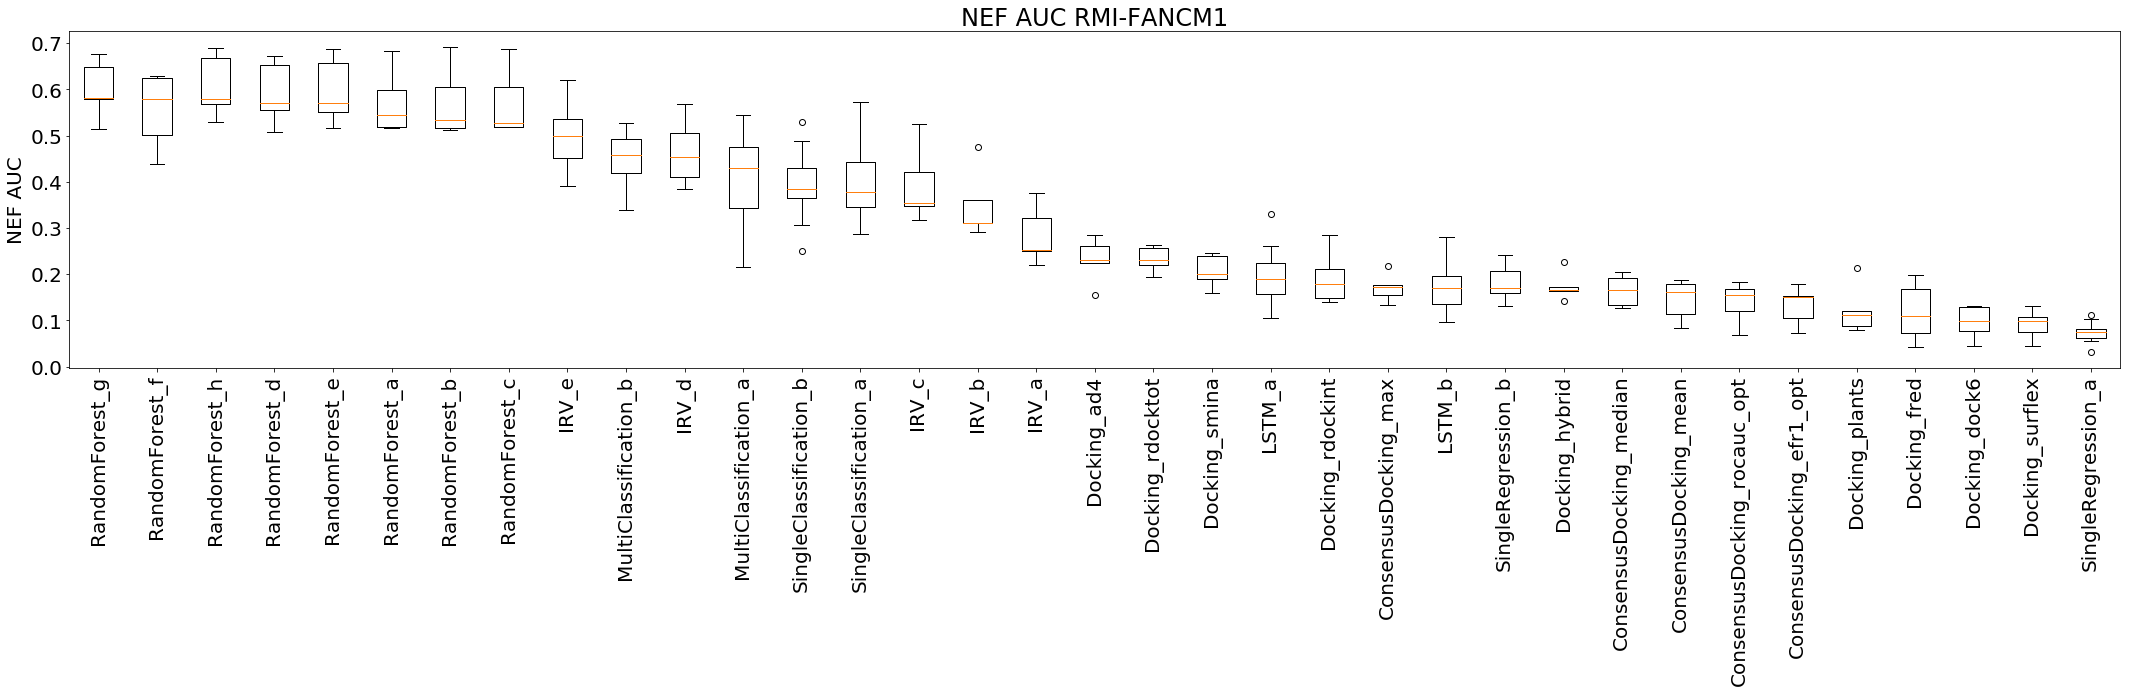

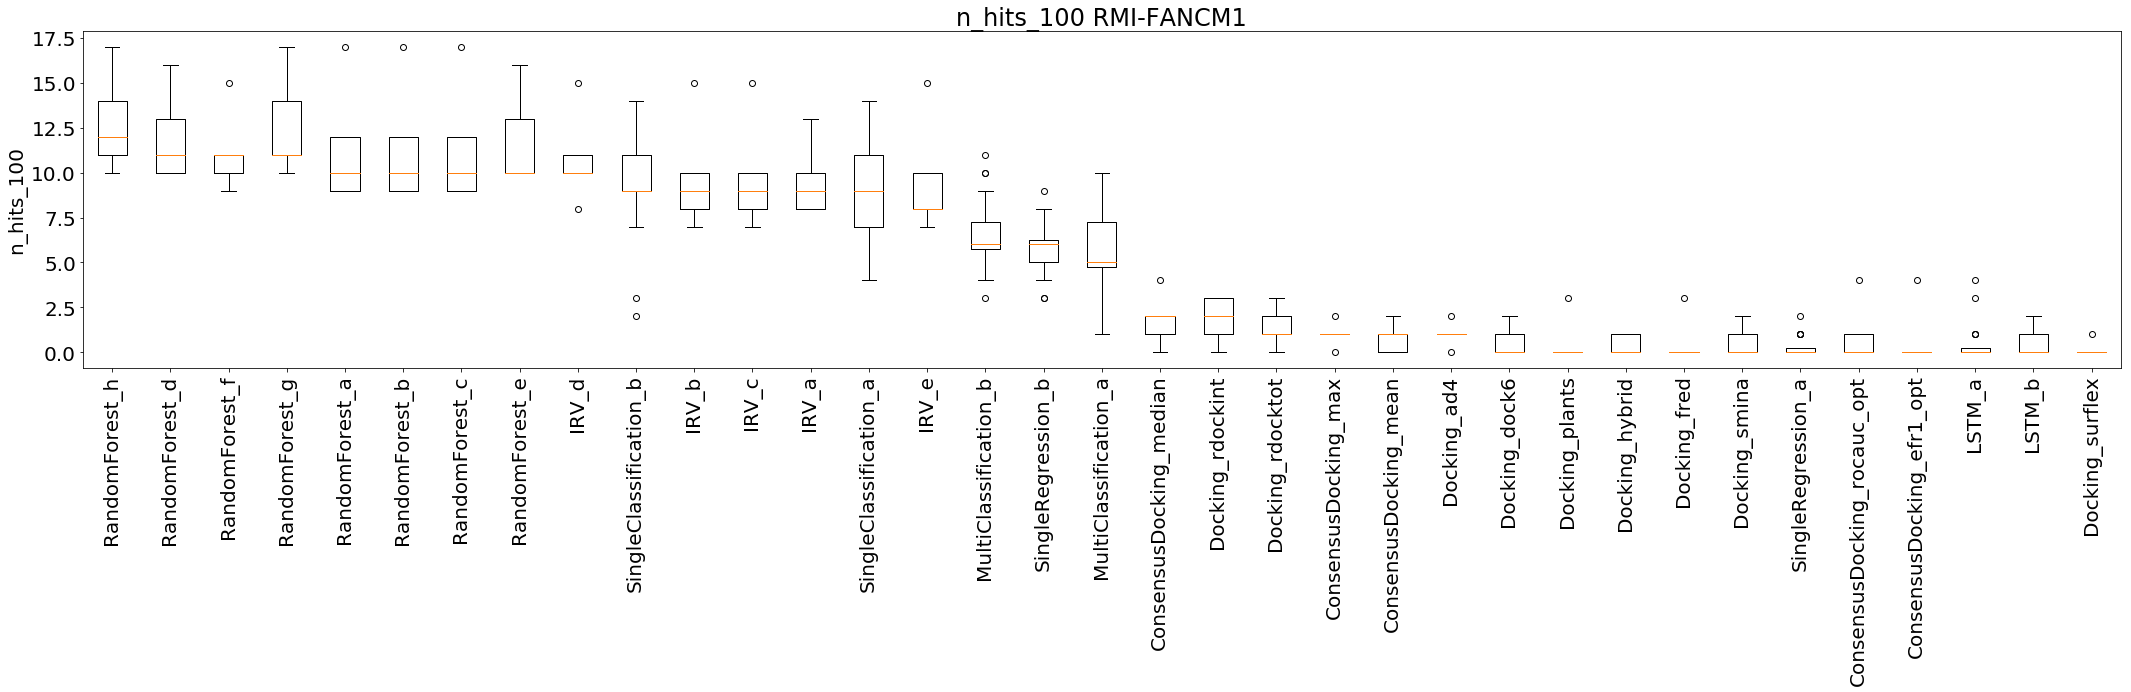

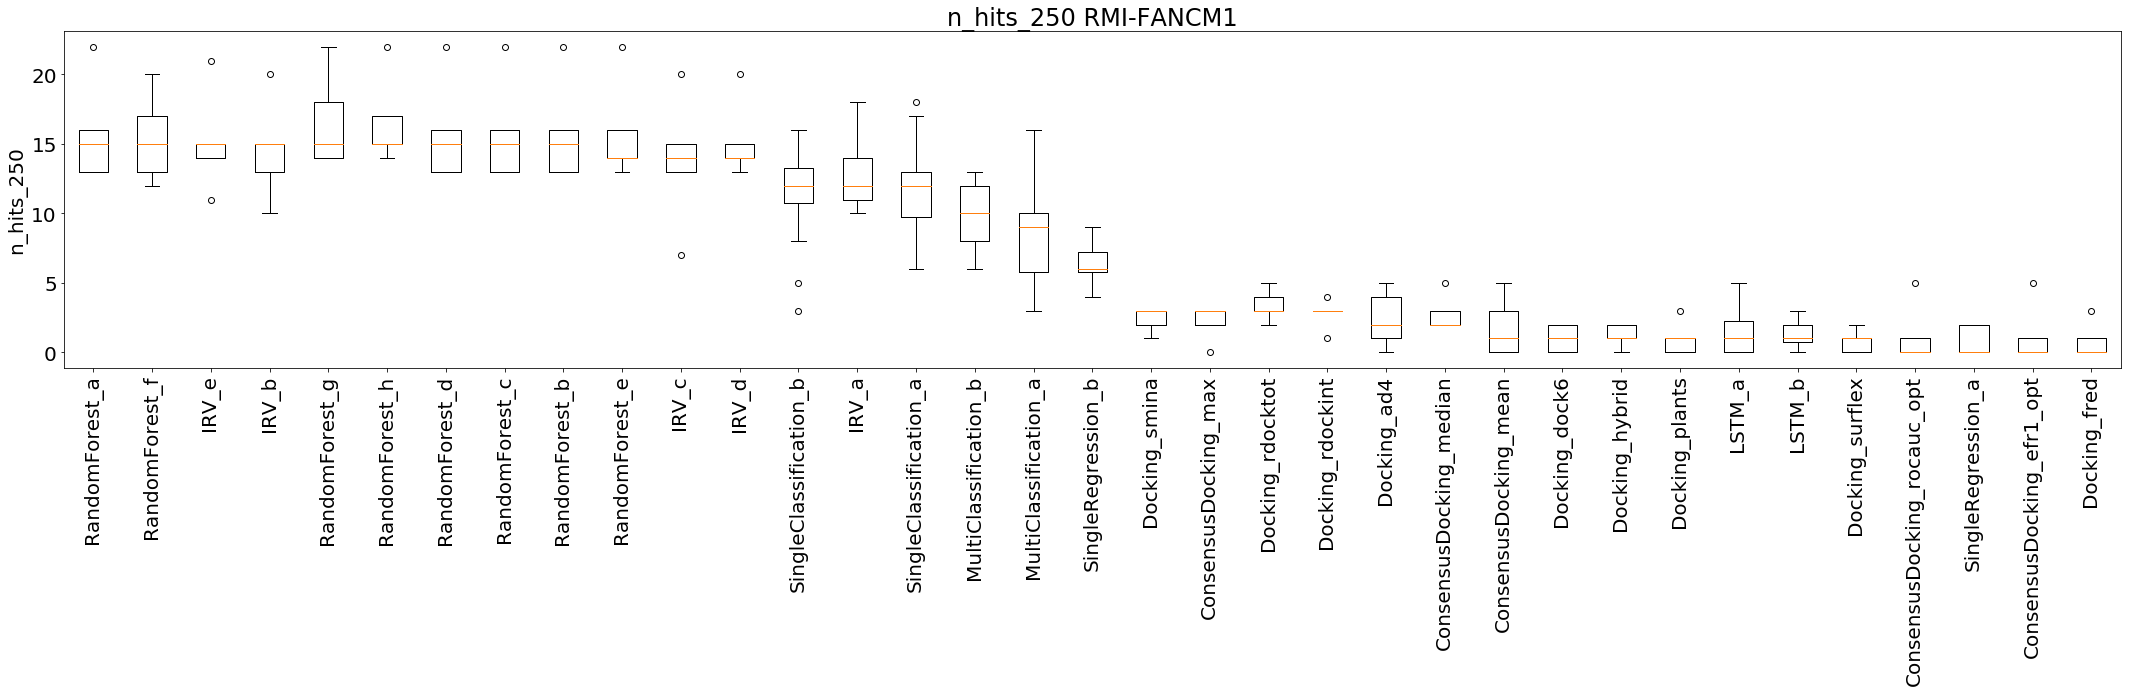

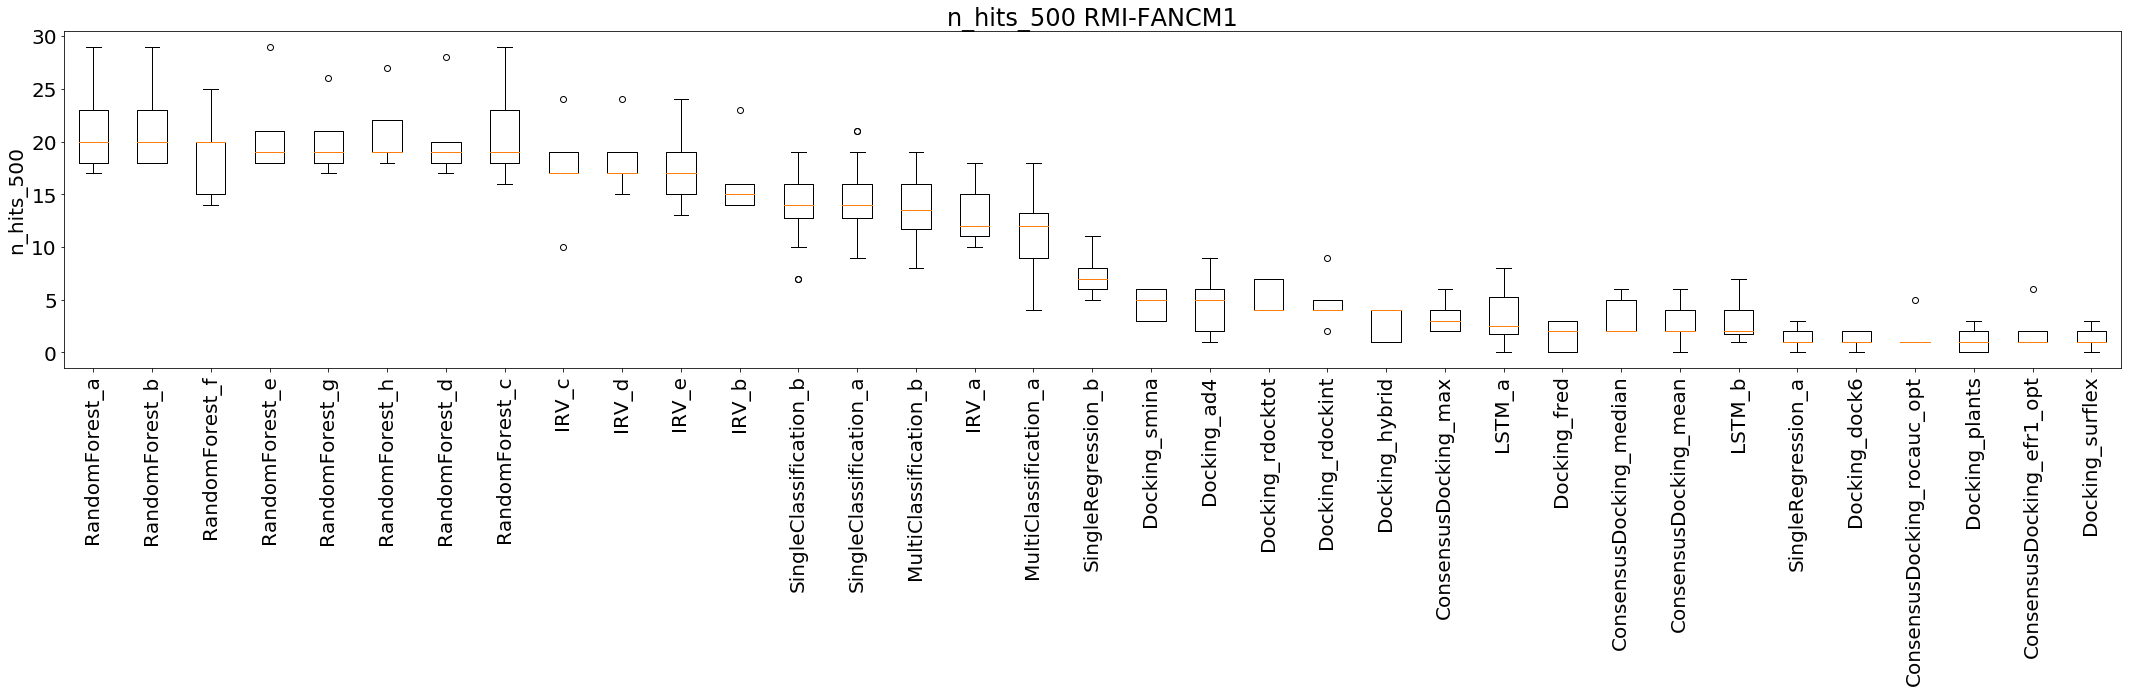

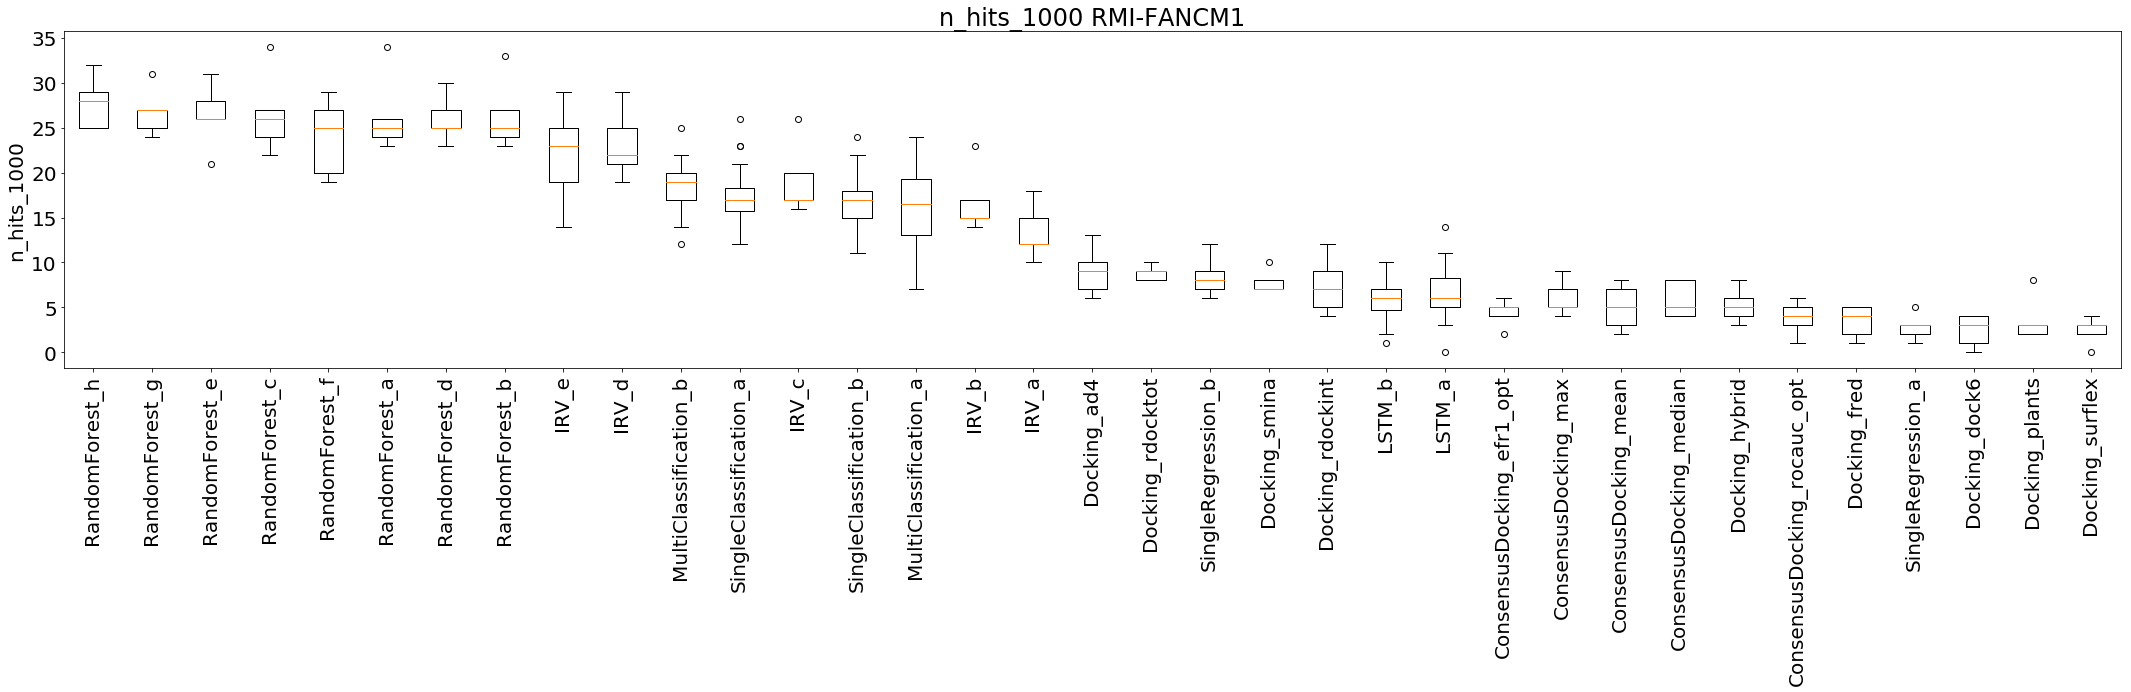

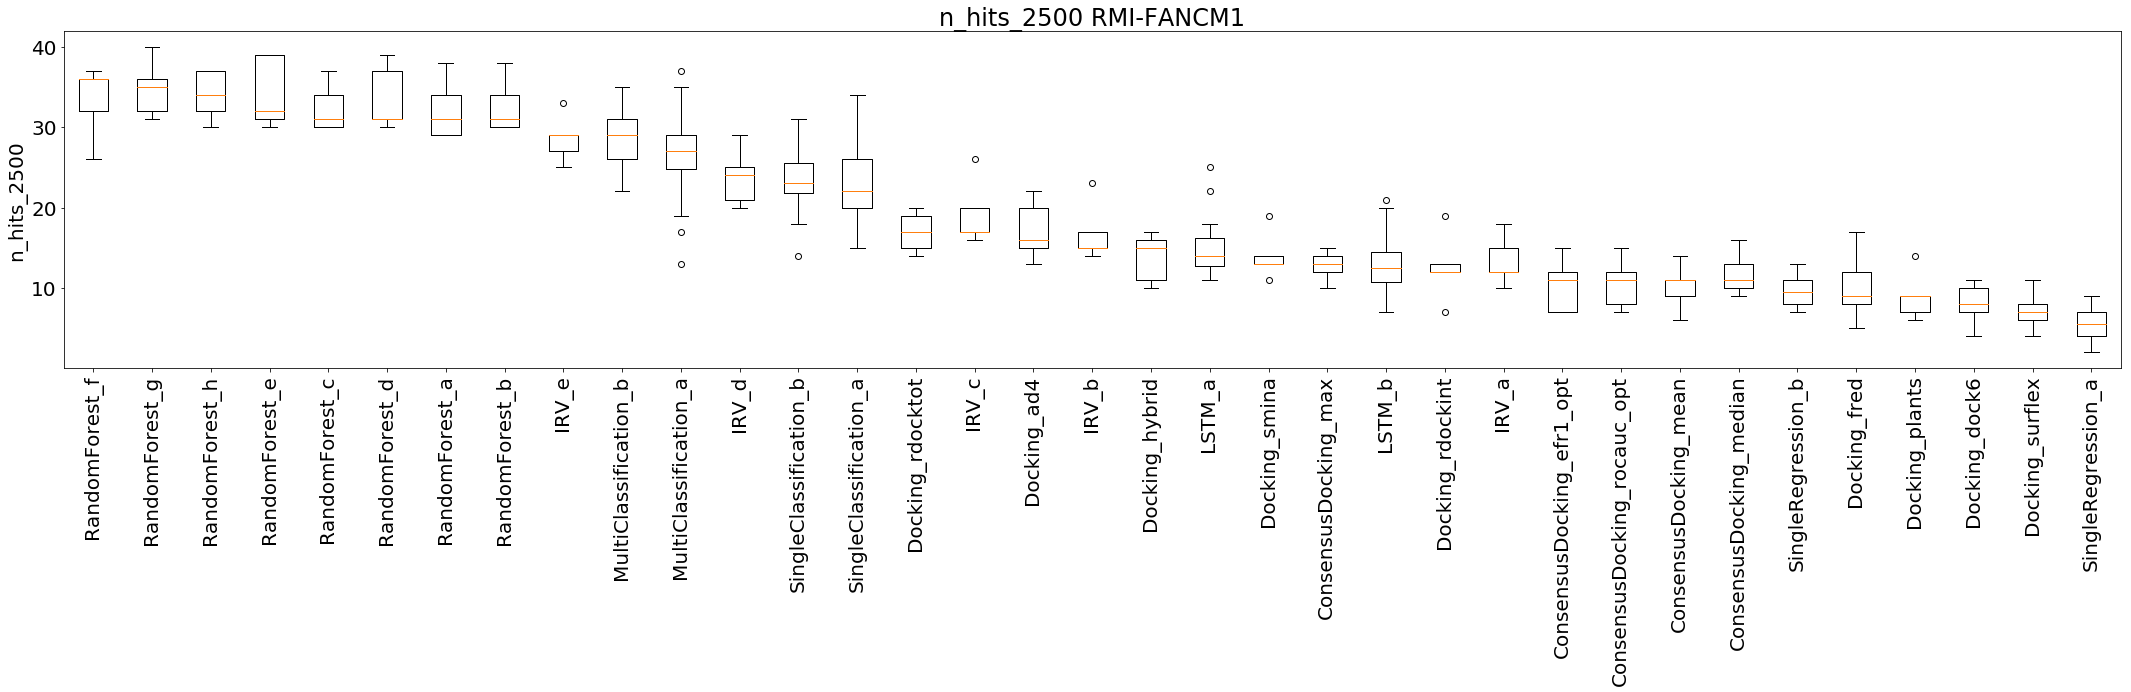

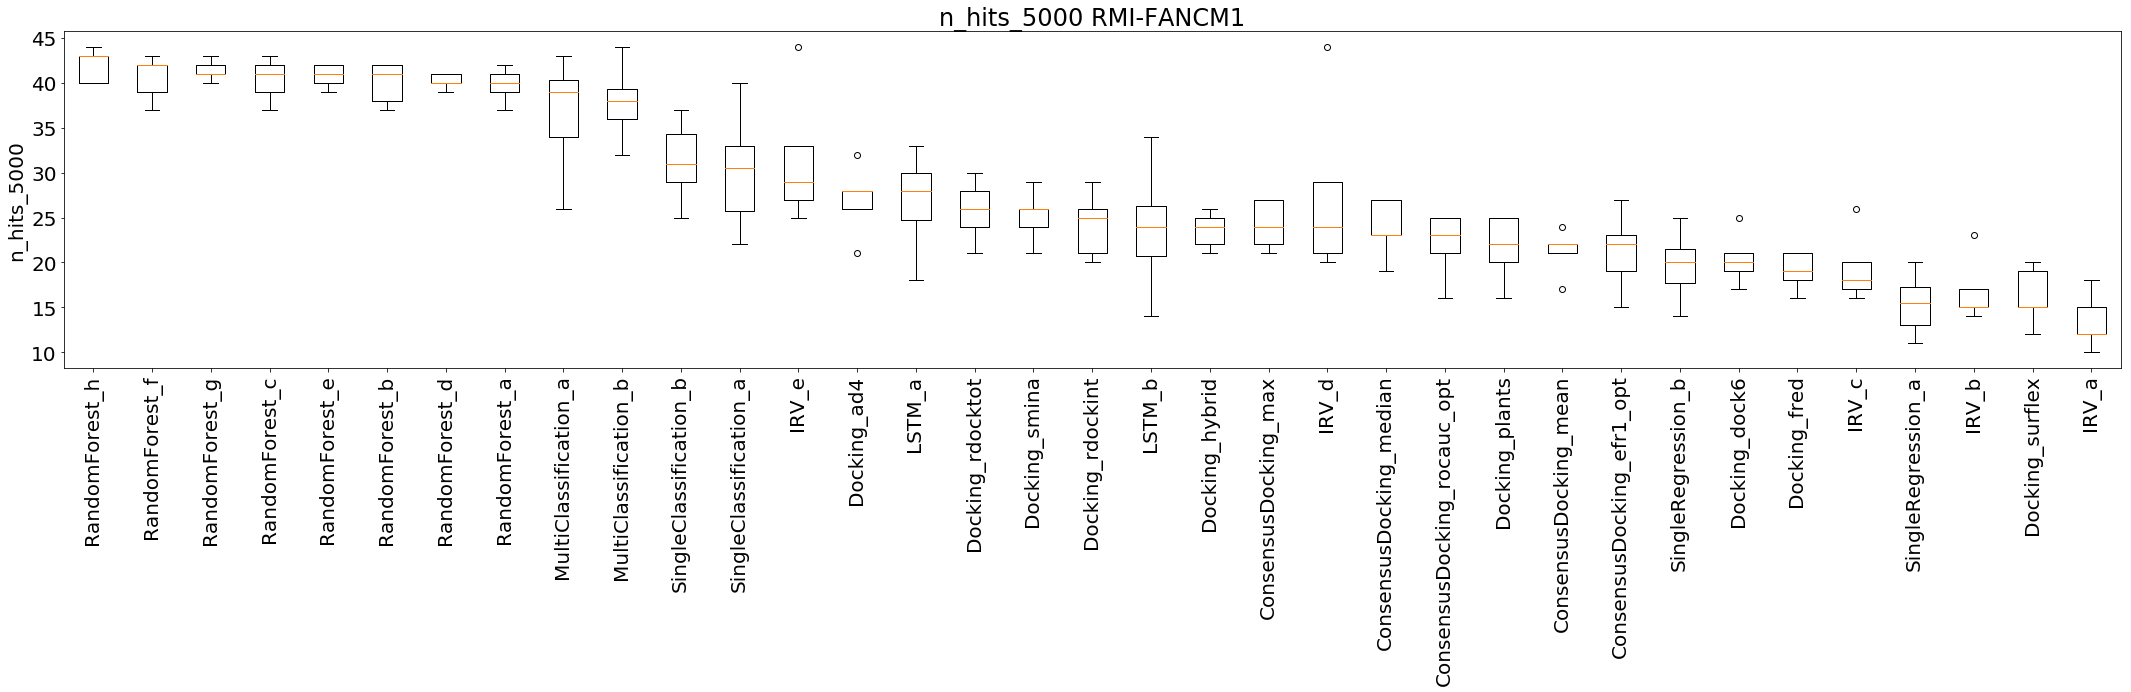

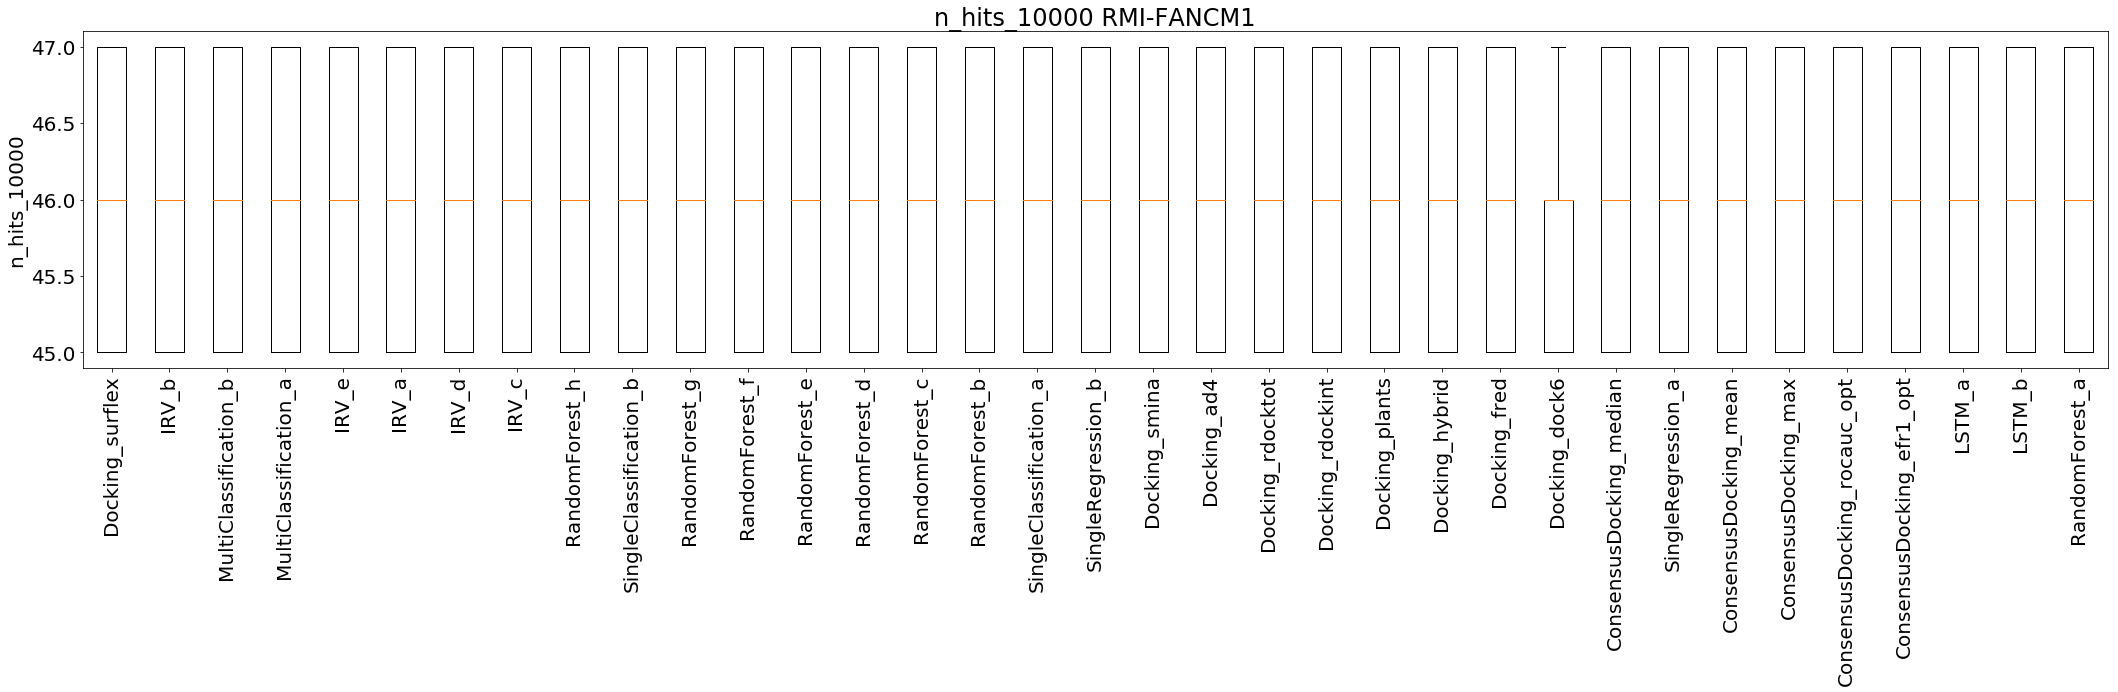

In [11]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/cv_boxplots/'
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)

---
### DTK + Means Tables

In [12]:
agg_comp_dict_dtk_means = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=1, median_w=0, tukey_w=1)
ordered_df = get_model_ordering(agg_comp_dict_dtk_means, metric_names)
ordered_df

ROC AUC PriA-SSB AS                ROC AUC PriA-SSB FP                 ROC AUC RMI-FANCM1             BEDROC AUC PriA-SSB AS             BEDROC AUC PriA-SSB FP              BEDROC AUC RMI-FANCM1        PR auc.integral PriA-SSB AS        PR auc.integral PriA-SSB FP         PR auc.integral RMI-FANCM1              NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP               NEF_0.1 % RMI-FANCM1             NEF_0.15 % PriA-SSB AS             NEF_0.15 % PriA-SSB FP              NEF_0.15 % RMI-FANCM1              NEF_0.5 % PriA-SSB AS              NEF_0.5 % PriA-SSB FP               NEF_0.5 % RMI-FANCM1                NEF_1 % PriA-SSB AS                NEF_1 % PriA-SSB FP                 NEF_1 % RMI-FANCM1                NEF_2 % PriA-SSB AS                NEF_2 % PriA-SSB FP                 NEF_2 % RMI-FANCM1                NEF_5 % PriA-SSB AS                NEF_5 % PriA-SSB FP                 NEF_5 % RMI-FANCM1               NEF_10 % PriA-SSB AS  \
0                 RandomForest_d, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0        SingleClassification_b, 1.0            SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_g, 1.0           SingleRegression_a, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0                         IRV_c, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_e, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0   
1                 RandomForest_e, 2.0            SingleRegression_b, 2.0                RandomForest_g, 2.0                RandomForest_g, 2.0            SingleRegression_a, 2.0                RandomForest_g, 2.0        SingleClassification_a, 2.0            SingleRegression_a, 2.0        SingleClassification_a, 2.0                RandomForest_a, 2.0                        IRV_b, 1.0                RandomForest_c, 2.0                RandomForest_b, 2.0                         IRV_d, 2.0        SingleClassification_b, 2.0                RandomForest_g, 2.0                RandomForest_d, 2.0                RandomForest_d, 1.0                RandomForest_g, 2.0            SingleRegression_a, 2.0                RandomForest_g, 1.0                RandomForest_g, 2.0                         IRV_e, 1.0                RandomForest_e, 2.0                RandomForest_g, 1.0            SingleRegression_b, 2.0                RandomForest_e, 2.0                RandomForest_d, 1.0   
2                 RandomForest_h, 3.0                RandomForest_h, 3.0                RandomForest_e, 3.0                RandomForest_d, 3.0                RandomForest_g, 3.0                RandomForest_e, 3.0         MultiClassification_a, 3.0                RandomForest_g, 3.0                RandomForest_h, 2.0                RandomForest_b, 2.0       SingleClassification_b, 3.0                RandomForest_a, 2.0                RandomForest_c, 2.0                RandomForest_h, 2.0                         IRV_d, 3.0                RandomForest_a, 3.0                RandomForest_h, 2.0                         IRV_a, 3.0                RandomForest_d, 3.0                         IRV_e, 3.0                RandomForest_e, 3.0                RandomForest_d, 3.0            SingleRegression_b, 3.0                RandomForest_g, 3.0                RandomForest_e, 3.0                RandomForest_g, 3.0                RandomForest_d, 3.0                RandomForest_g, 3.0   
3                 RandomForest_g, 4.0                RandomForest_e, 4.0      